In [1]:
#load previously generated data

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [40]:
df_ave = pd.read_pickle(r"\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\Behavior\saved_data\20200410_allbehavior_averaged.pkl")
print(len(df_ave))

3671


In [41]:
df_b = pd.read_pickle(r"\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\Behavior\saved_data\20200413_allbehavior_summary.pkl")
print(len(df_b))

8156


In [42]:
df_id = pd.read_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\good_session_id.pkl")

In [43]:
len(df_id)

3171

In [44]:
#fixing flag column format
flag_list = []
for index in df_b.index:
    try:
        if np.isnan(df_b.iloc[index]['flags']) == True:
            flag_list.append(np.nan)
        elif len(df_b.iloc[index]['flags']) == 0:
            flag_list.append(np.nan)
        else:
            flag_list.append(str(df_b.iloc[index]['flags']))
    except:
        flag_list.append(str(df_b.iloc[index]['flags']))
        
df_b['flags'] = flag_list

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [45]:
df_behavior = df_b
print(len(df_behavior))

8156


In [46]:
#Remove behavior related fails and flags
drop_indices = []
df_behavior = df_behavior.reset_index(drop = True)
df_test = df_behavior.dropna(subset = ['fail_tags'])
for n in df_test.index:
    line = df_test.loc[n]
    if 'wheel_speed_plot' in line['fail_tags'] \
    or 'validate_omitted_flashes_are_omitted' in line['fail_tags'] \
    or 'nb_dropped_visual_stim_events' in line['fail_tags']:
        drop_indices.append(n)
        #print(line['fail_tags'])
df_test = df_behavior.dropna(subset= ['flags'])
for n in df_test.index:
    line = df_test.loc[n]
    if 'mouse_summary_figure' in line['flags'] \
    or 'wheel_traveled_distance_plot' in line['flags'] \
    or 'visual_behavior_daily_figure' in line['flags'] \
    or 'validate_encoder_voltage' in line['flags']:
        drop_indices.append(n)
        #print(line['flags'])

In [47]:
df_behavior = df_behavior.drop(index = drop_indices)
print(len(df_behavior))

8031


In [48]:
#fixing duplicate session id's for multiscope sessions

In [49]:
df_list = []
for n in df_behavior['behavior_session_uuid'].unique():
    dfx = df_behavior[df_behavior['behavior_session_uuid']==n]
    if len(dfx) > 1:
        dfx = pd.DataFrame(dfx.iloc[0]).T
    df_list.append(dfx)
df_m = pd.concat(df_list)
df_m = df_m.reset_index(drop = True)
#df_m = df_m.drop(columns=['qc_status'])
print(len(df_behavior))
print(len(df_m))

8031
6509


In [50]:
#filter out irrelevant early training and passive sessions
print(len(df_m))
stages = ['TRAINING_5_images_G_epilogue',
       'TRAINING_5_images_G_handoff_ready',
       'OPHYS_4_images_H', 'OPHYS_6_images_H',
       'TRAINING_5_images_G_handoff_lapsed','TRAINING_5_images_B_handoff_lapsed','TRAINING_5_images_B_epilogue',
       'TRAINING_5_images_B_handoff_ready',
       'OPHYS_0_images_B_habituation', 'OPHYS_1_images_B',
       'OPHYS_4_images_A','OPHYS_1_images_A', 'TRAINING_5_images_A_handoff_ready',
       'TRAINING_5_images_A_handoff_lapsed',
       'TRAINING_5_images_A_epilogue',
       'OPHYS_6_images_A', 'OPHYS_0_images_E_habituation',
       'OPHYS_0_images_G_habituation', 'OPHYS_1_images_G',
       'OPHYS_1_images_E', 'OPHYS_3_images_G', 'OPHYS_3_images_E',
          'OPHYS_3_images_B','OPHYS_0_images_A_habituation','OPHYS_3_images_A',
       'OPHYS_4_images_B', 'OPHYS_6_images_B']
df_m = df_m[df_m['stage'].isin(stages)].reset_index(drop = True)
print(len(df_m))

6509
3060


In [52]:
#put it all together
df_pre = pd.merge(df_ave, df_m, on = 'behavior_session_uuid').reset_index(drop = True)
print(len(df_pre))

3027


In [53]:
df_pre = df_pre[df_pre['behavior_session_uuid'].isin(df_id.values)]
print(len(df_pre))

2908


In [54]:
df_pre.stage.unique()

array(['OPHYS_0_images_A_habituation', 'OPHYS_1_images_A',
       'OPHYS_3_images_A', 'OPHYS_4_images_B', 'OPHYS_6_images_B',
       'TRAINING_5_images_A_handoff_ready',
       'TRAINING_5_images_A_handoff_lapsed',
       'TRAINING_5_images_A_epilogue', 'OPHYS_0_images_G_habituation',
       'OPHYS_0_images_E_habituation', 'TRAINING_5_images_B_epilogue',
       'TRAINING_5_images_B_handoff_ready', 'OPHYS_1_images_G',
       'OPHYS_1_images_E', 'OPHYS_3_images_G',
       'OPHYS_0_images_B_habituation', 'OPHYS_3_images_E',
       'OPHYS_1_images_B', 'OPHYS_3_images_B', 'OPHYS_4_images_A',
       'OPHYS_6_images_A', 'TRAINING_5_images_B_handoff_lapsed',
       'TRAINING_5_images_G_epilogue',
       'TRAINING_5_images_G_handoff_ready', 'OPHYS_4_images_H',
       'OPHYS_6_images_H', 'TRAINING_5_images_G_handoff_lapsed'],
      dtype=object)

In [43]:
#For combination analysis only
test = df_pre[df_pre['project'].isin(['VisualBehavior', 'VisualBehaviorTask1B'])]
len(test)
test = test[~test['stage'].isin(['TRAINING_5_images_B_handoff_lapsed',
                         'TRAINING_5_images_B_epilogue',
                         'TRAINING_5_images_B_handoff_ready',
                         'TRAINING_5_images_A_handoff_ready',
                         'TRAINING_5_images_A_handoff_lapsed',
                         'TRAINING_5_images_A_epilogue'])]
len(test)
test = test[test['qc_status']=='passed']
len(test)
df_combo = pd.read_csv(r"\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\flashwise_metric_summary_2020.04.14.csv")
df_pre = test.reset_index(drop = True)
df_pre = df_pre[df_pre['behavior_session'].isin(df_combo.behavior_session_id.unique())].reset_index(drop = True)
len(df_pre)

121

In [23]:
#For individual Project Analysis
df_1a = df_pre[df_pre['project'].isin(['VisualBehavior'])].reset_index(drop = True)
df_1am = df_pre[df_pre['project'].isin(['VisualBehaviorMultiscope'])].reset_index(drop = True)
df_1b = df_pre[df_pre['project'].isin(['VisualBehaviorTask1B'])].reset_index(drop = True)
df_2a = df_pre[df_pre['project'].isin(['VisualBehaviorMultiscope4areasx2d'])].reset_index(drop = True)

In [24]:
df_pre = df_2a

In [22]:
df_pre = df_pre.reset_index(drop = True)

In [55]:
#Normalize the 3 timeseries variables
#This depends on how many timepoints are in the timeseries
print(len(df_pre))
ids = df_pre['behavior_session_uuid']
df2 = df_pre.loc[:, list(range(225))]
a = df2.loc[:, list(range(75))]
b = df2.loc[:, list(range(75, 150))]
c = df2.loc[:, list(range(150, 225))]
b.columns = list(range(75))
c.columns = list(range(75))

#normalize by variable
a = pd.DataFrame(normalize(a))
b = pd.DataFrame(normalize(b))
c = pd.DataFrame(normalize(c))

x = a.append(b)
x = x.append(c)

#normalize by experiment
#normed = pd.DataFrame(normalize(x))
normed = x


#combine normalized variables back into one df
#This depends on how many samples are in the data
y = len(df_pre)
a = normed[:y]
b = normed[y:y*2].reset_index(drop = True)
c = normed[y*2:y*3].reset_index(drop = True)
b.columns = list(range(75, 150))
c.columns = list(range(150, 225))
a = a.T
b = b.T
c = c.T
x = a.append(b.append(c)).T
x['behavior_session_uuid'] = ids
#merge the qualitative data in
#df = pd.merge(x, df_m, on = 'behavior_session_uuid')
print(len(x))

2908
2908


In [56]:
df = pd.merge(x, df_m, on = 'behavior_session_uuid')
print(len(df))

2849


In [25]:
df.to_pickle(r'C:\Users\sams\Documents\Independant Study\UMAP\performance_metrics\normalized_allfour_final.pkl')

In [2]:
#df = pd.read_pickle(r'C:\Users\sams\Documents\Independant Study\UMAP\performance_metrics\normalized_allfour_final.pkl')

In [44]:
#Calculate best UMAP/GMM

In [39]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.model_selection import KFold
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

# 2D BIC Scoring

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


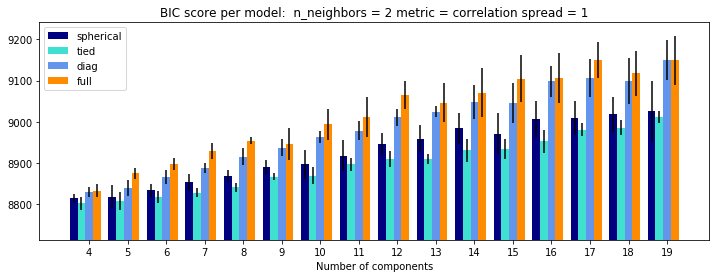

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


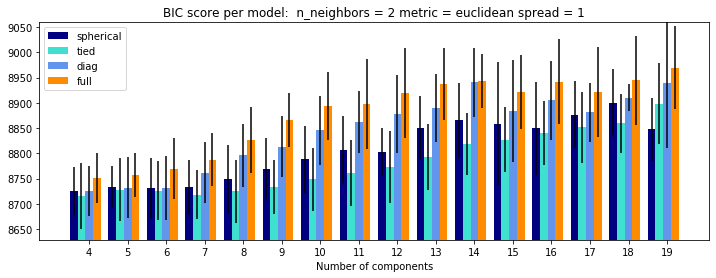

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


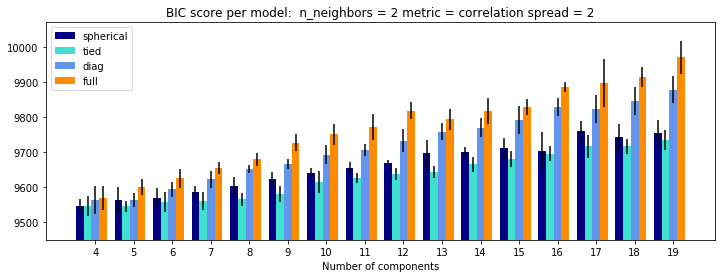

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


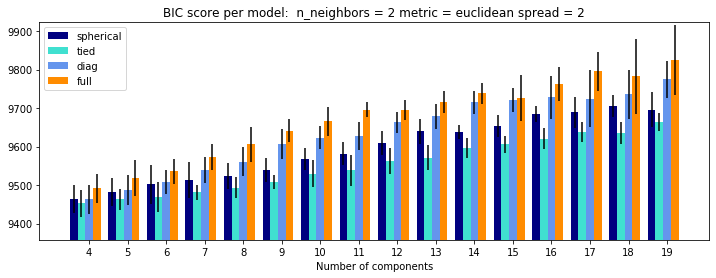

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


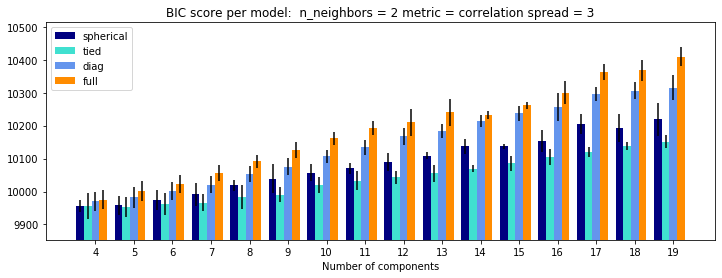

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


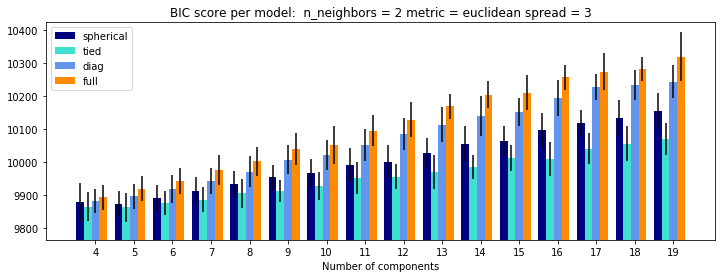

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


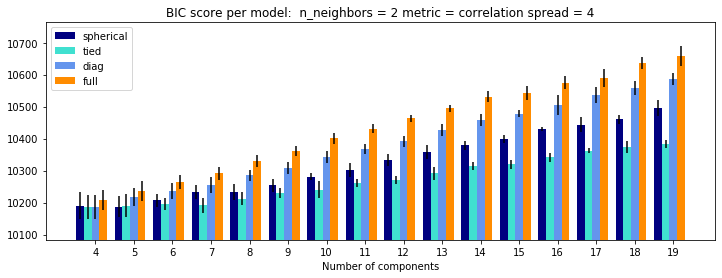

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


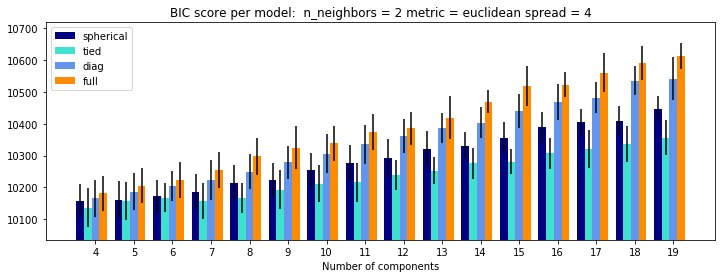

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


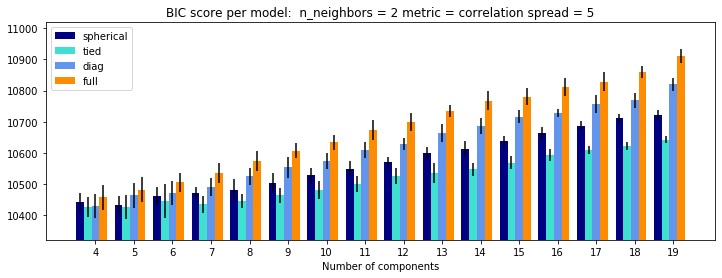

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


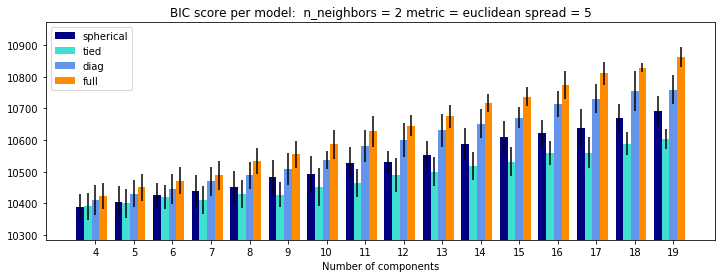

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


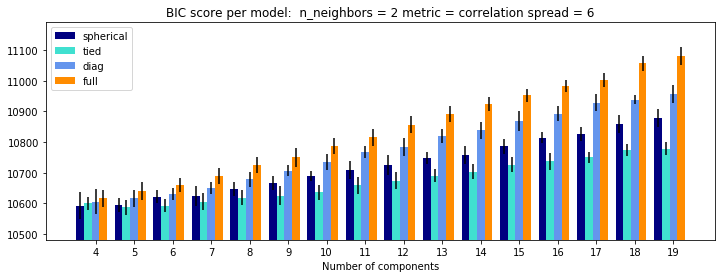

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


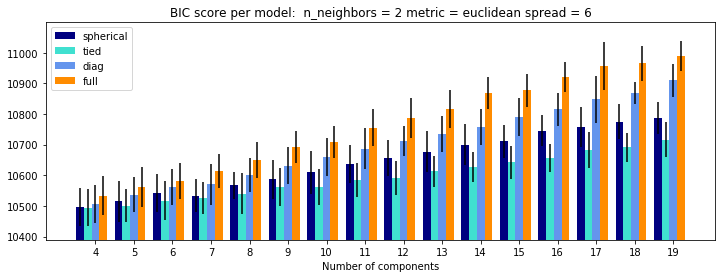

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


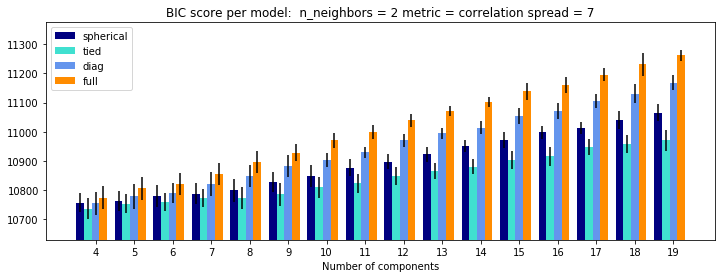

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


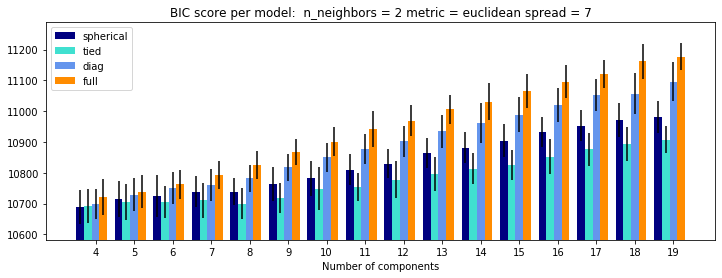

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


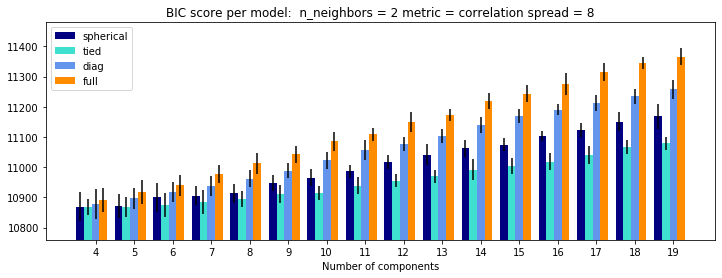

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


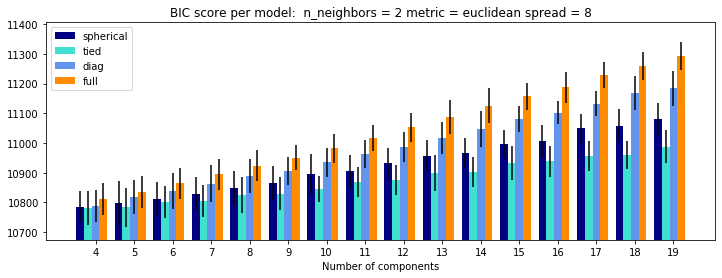

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 299 separate connected components using meta-embedding (experimental)
  n_components


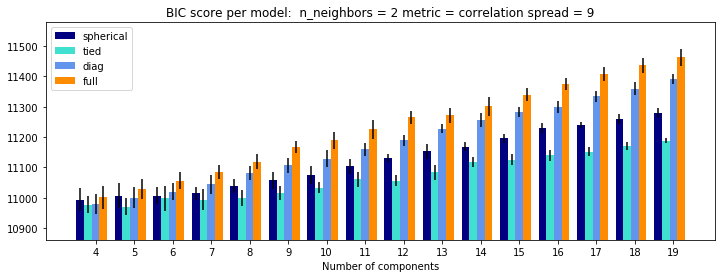

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 200 separate connected components using meta-embedding (experimental)
  n_components


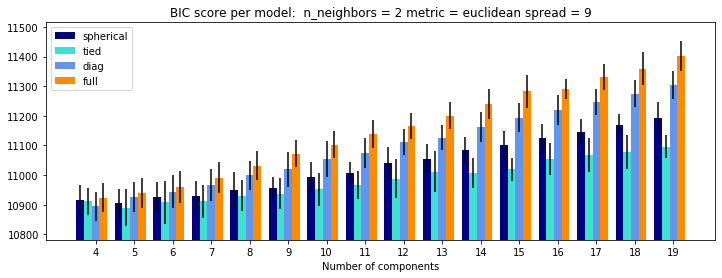

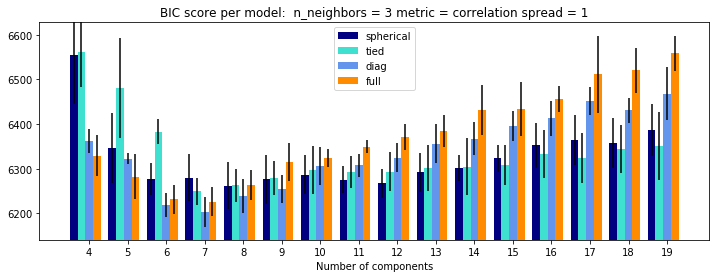

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


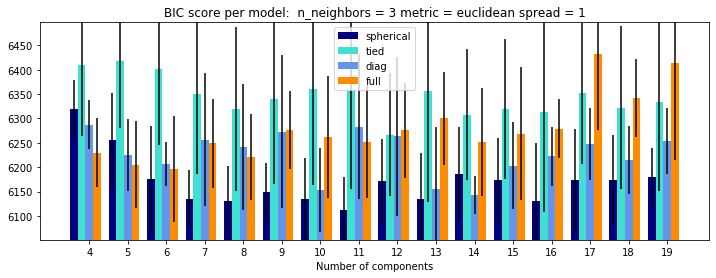

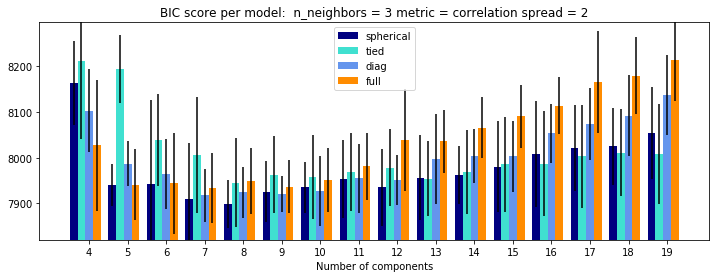

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


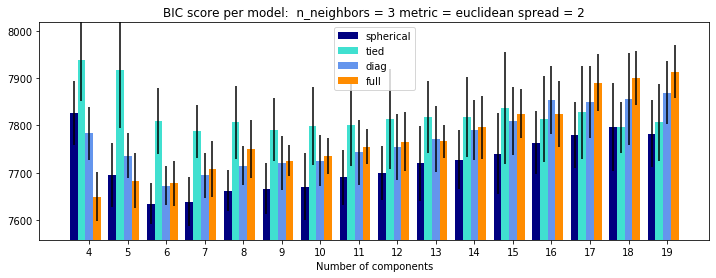

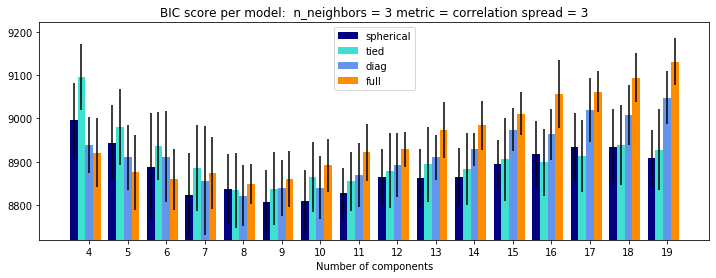

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


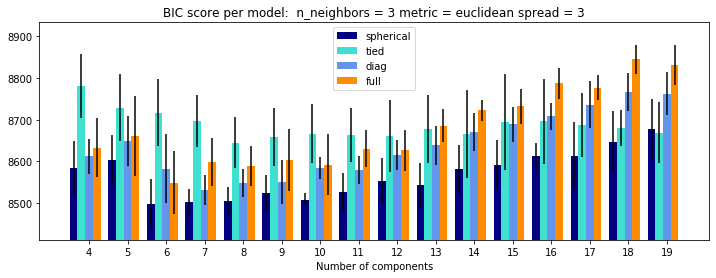

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


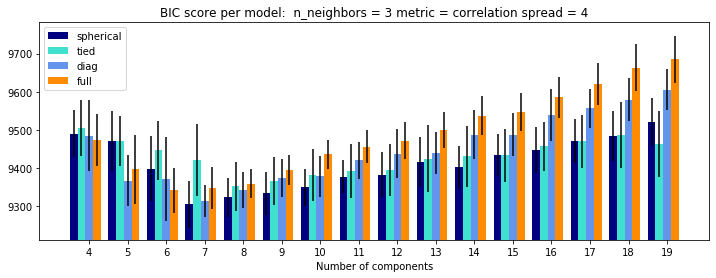

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


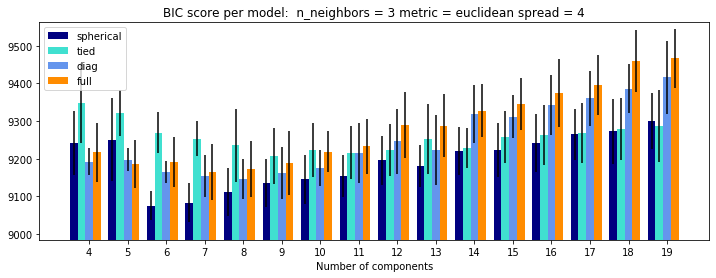

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


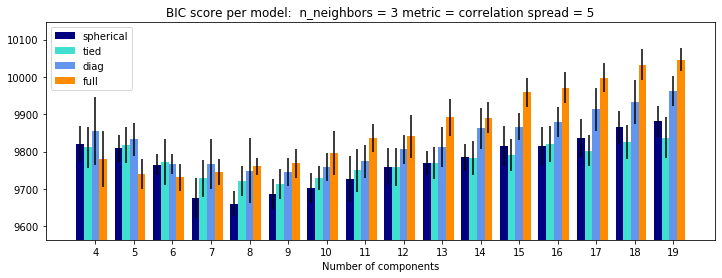

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


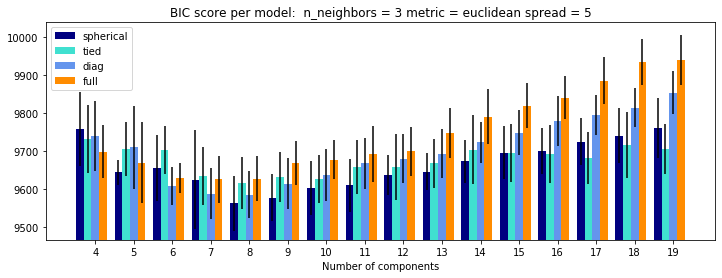

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


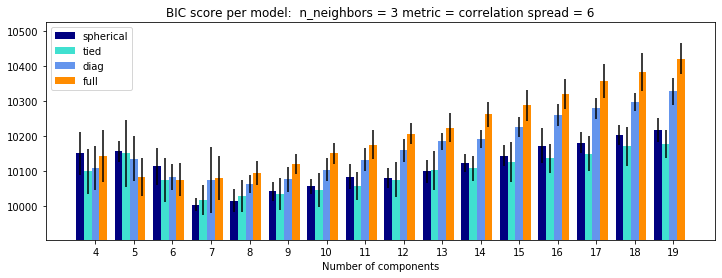

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


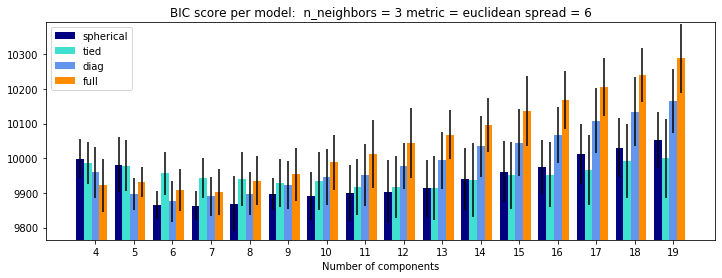

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


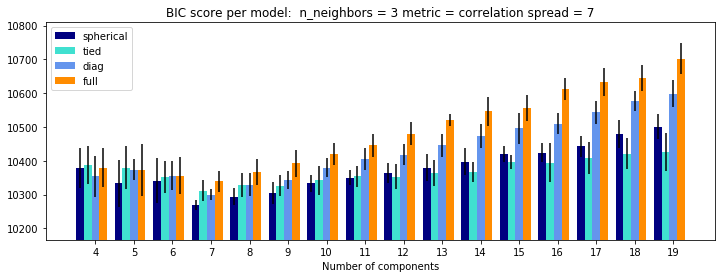

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


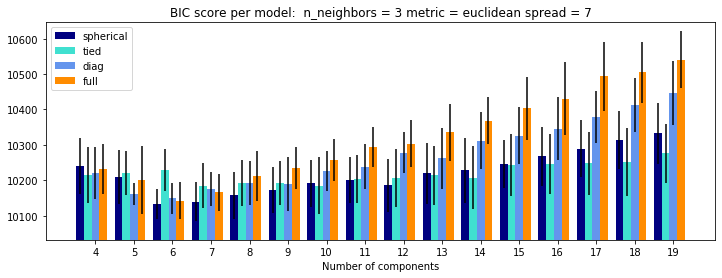

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


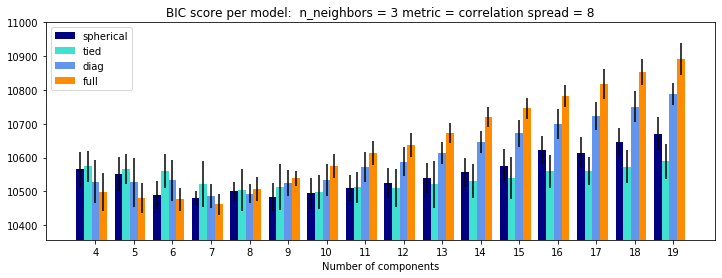

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


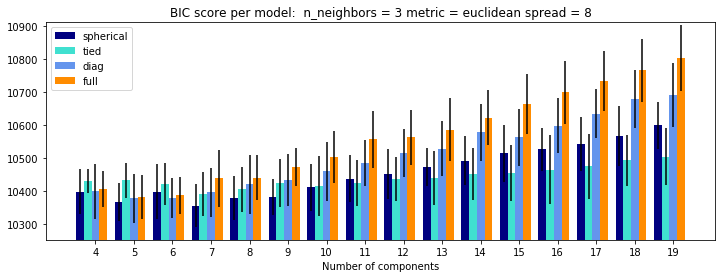

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


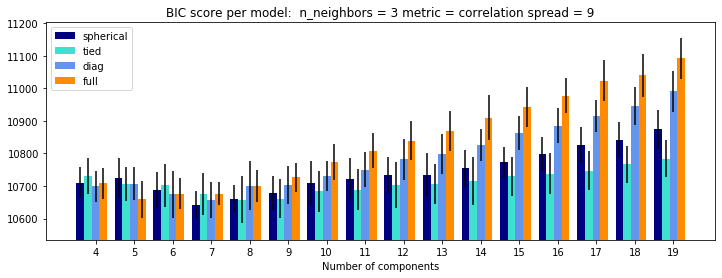

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


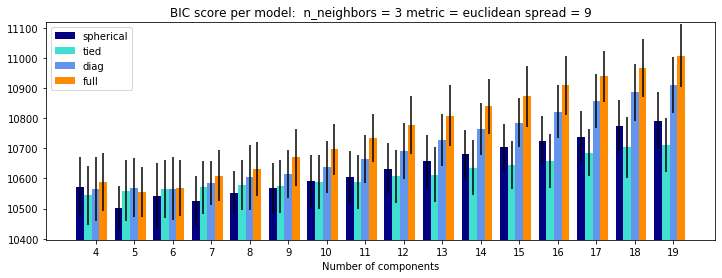

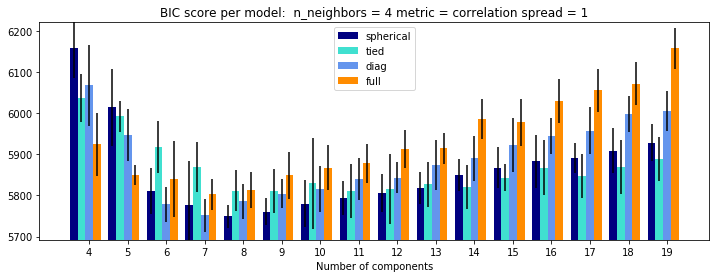

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


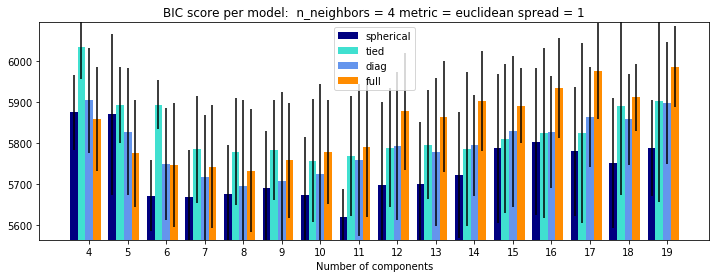

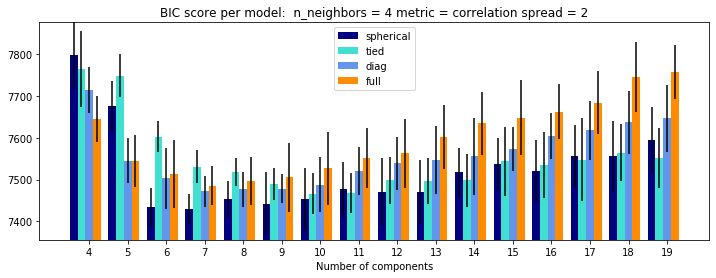

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


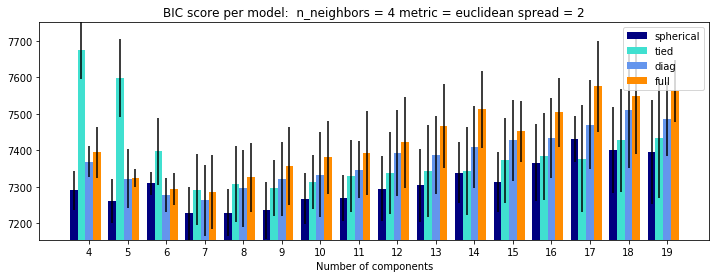

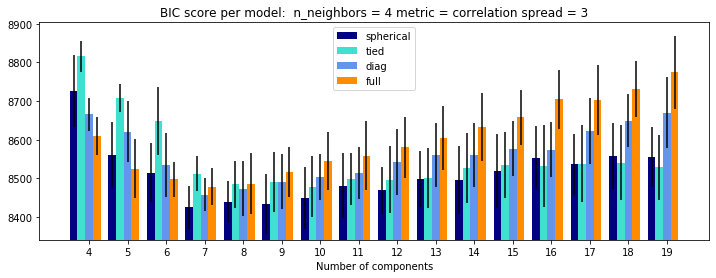

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


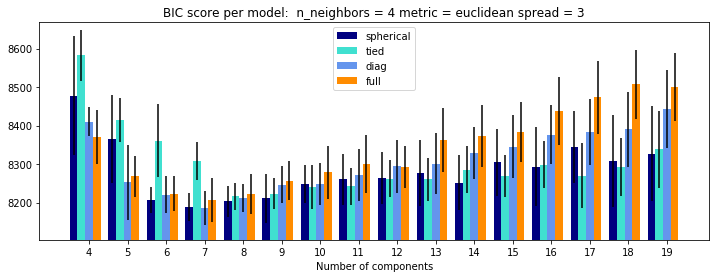

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


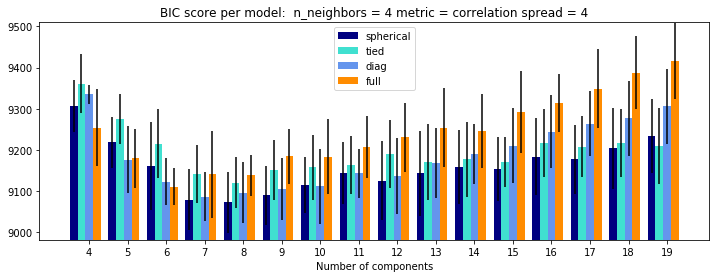

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


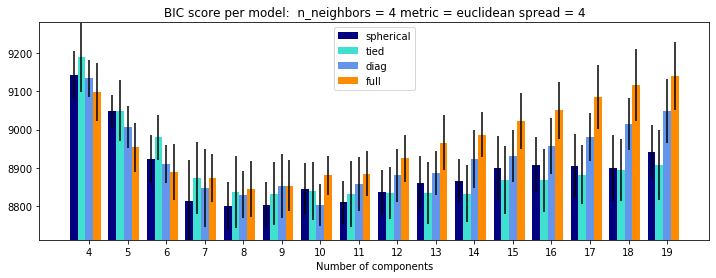

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


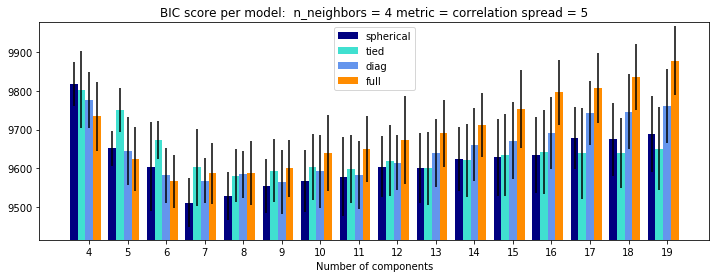

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


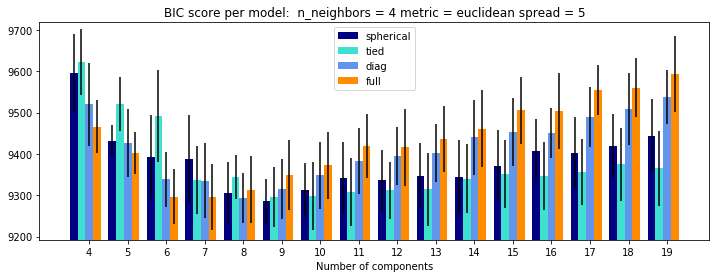

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


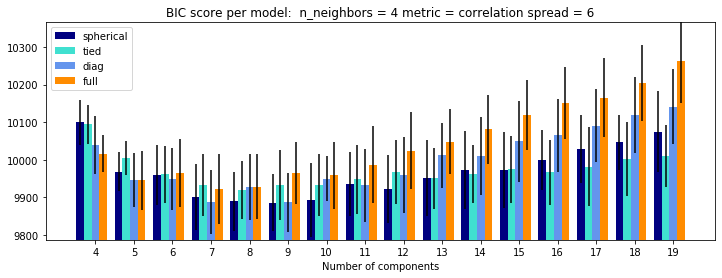

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


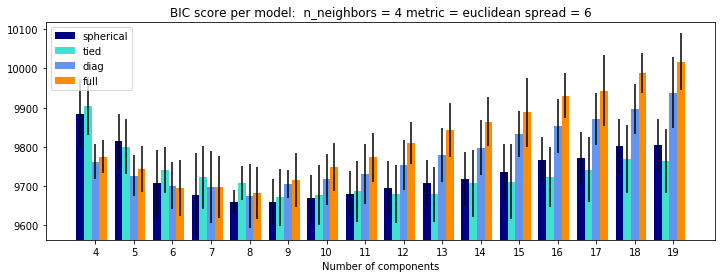

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


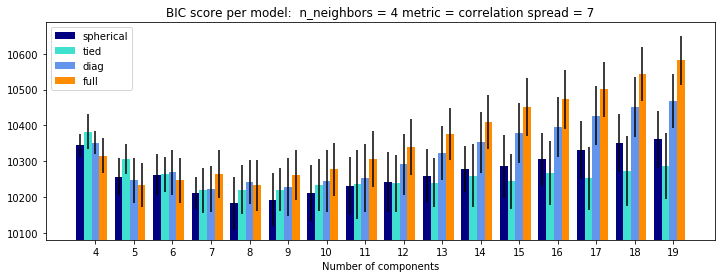

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


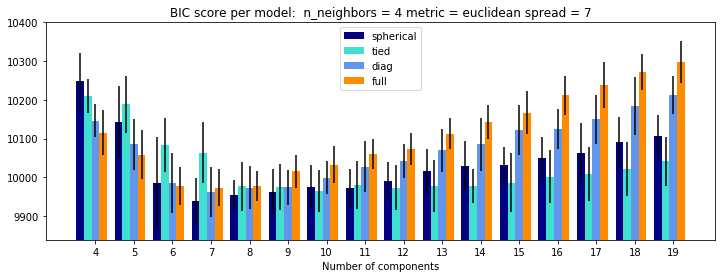

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


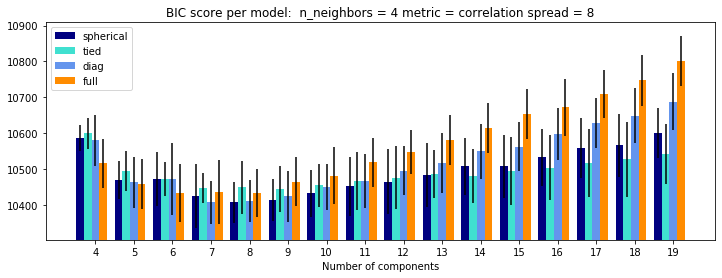

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


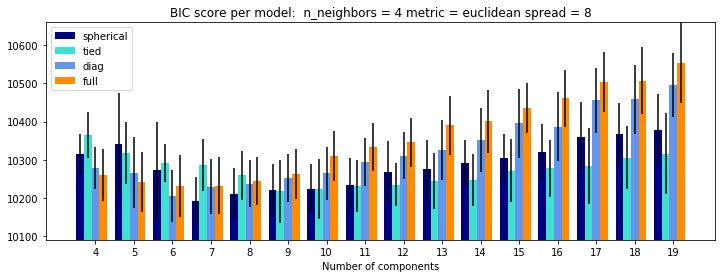

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


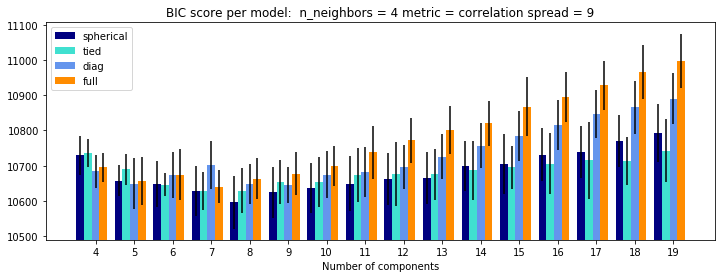

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


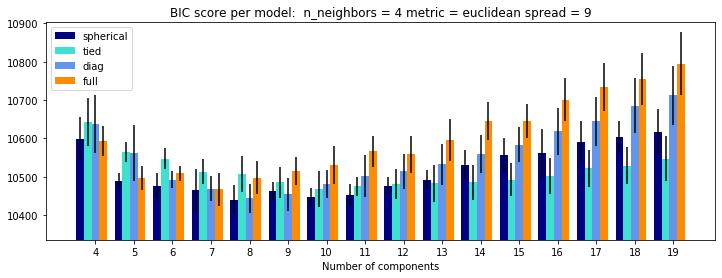

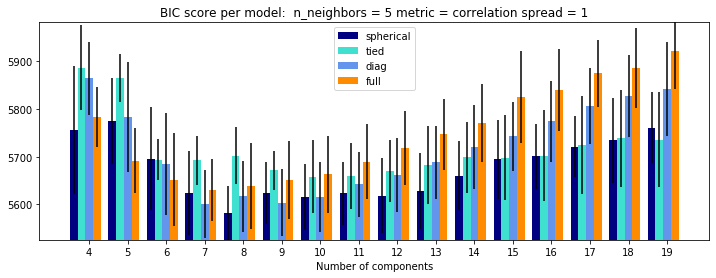

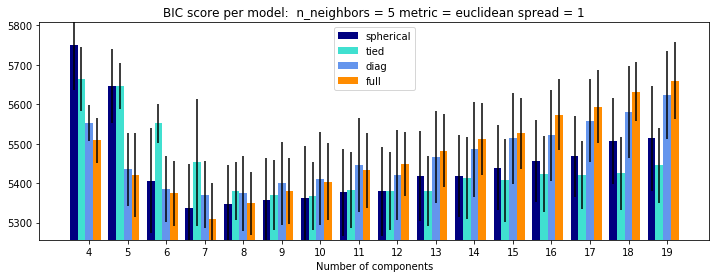

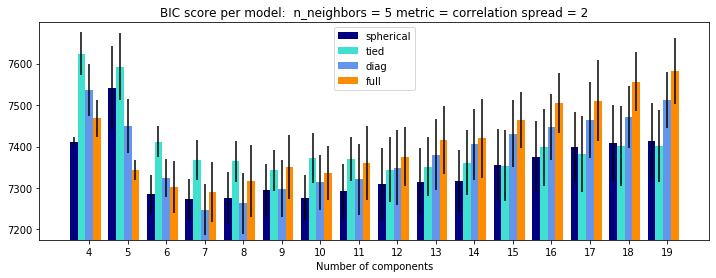

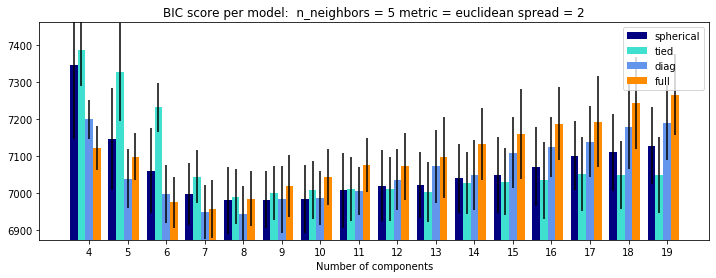

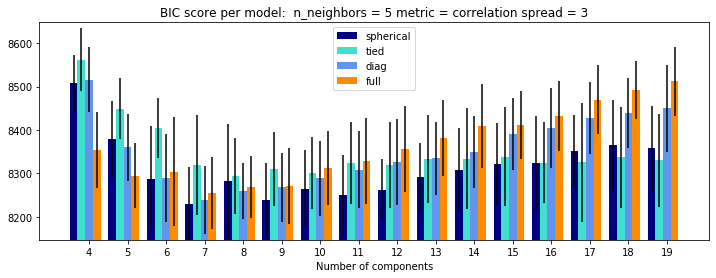

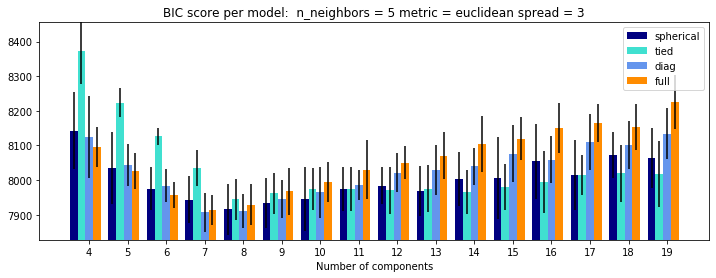

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


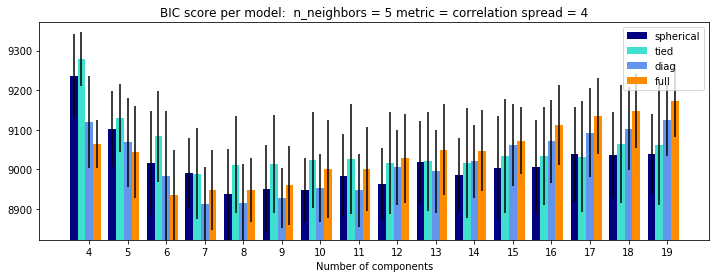

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


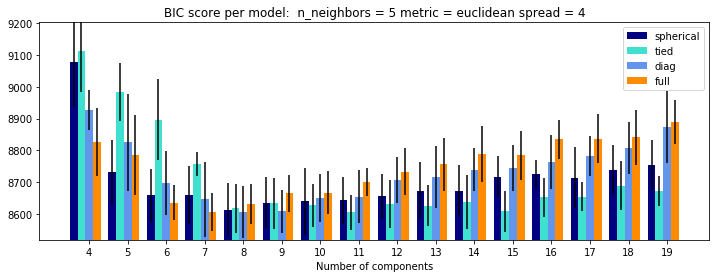

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


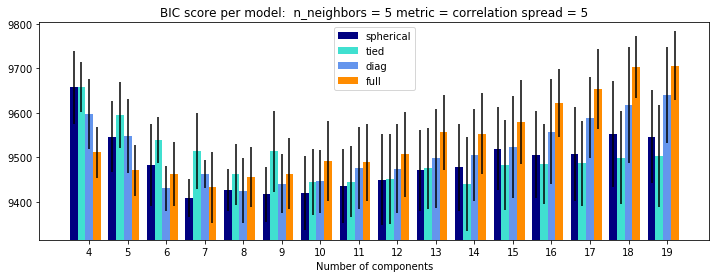

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


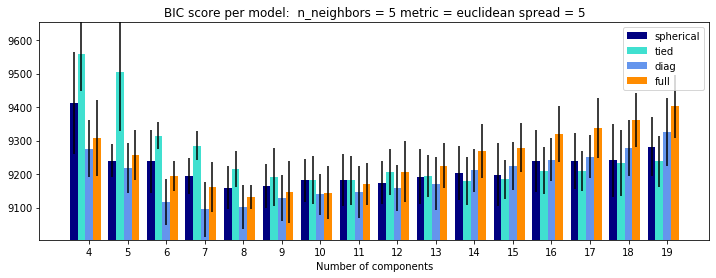

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


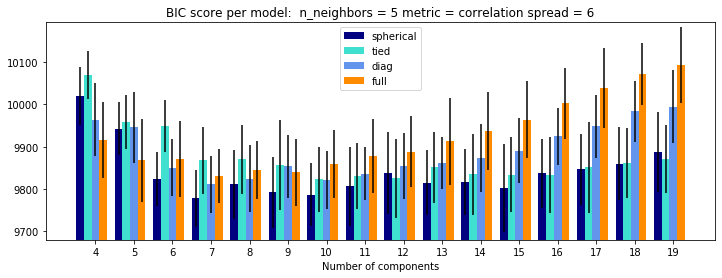

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


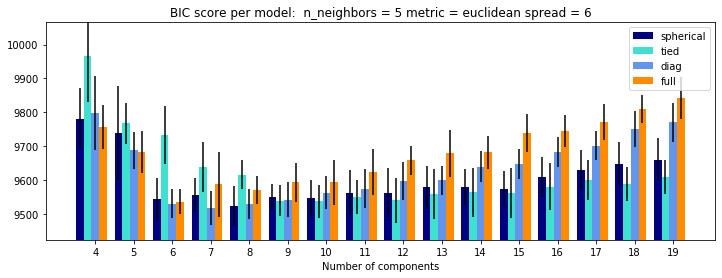

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


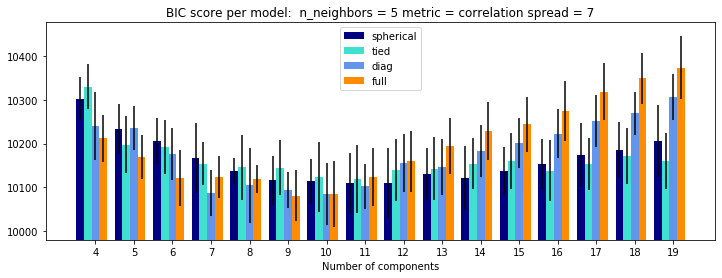

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


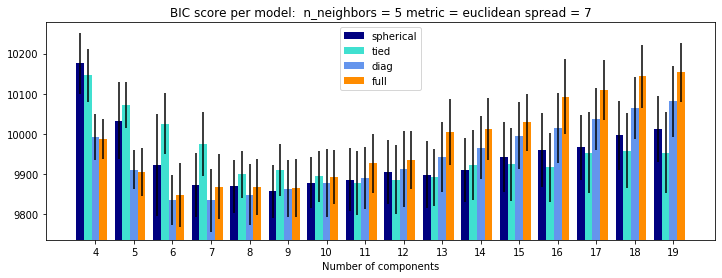

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


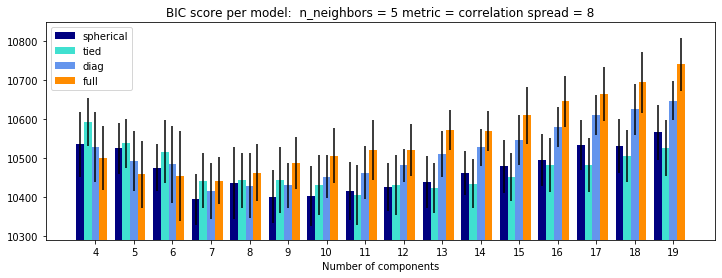

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


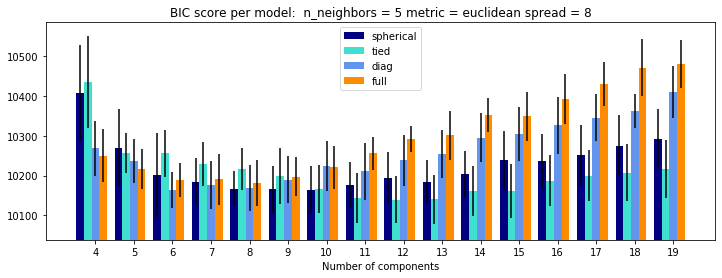

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


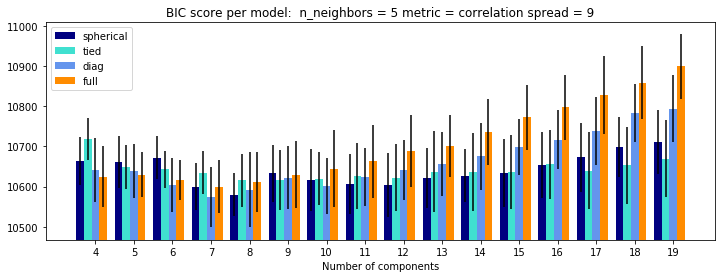

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


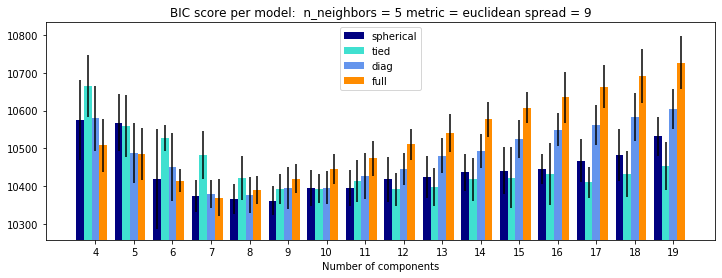

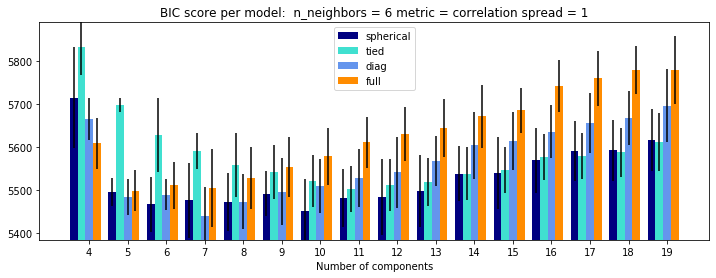

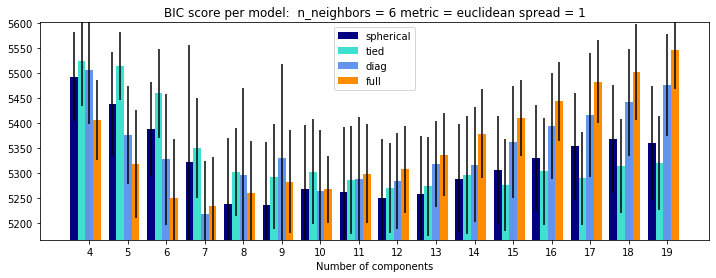

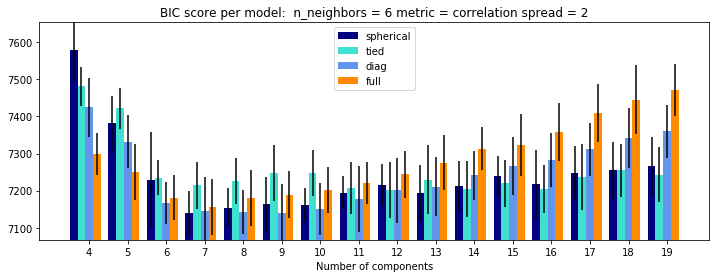

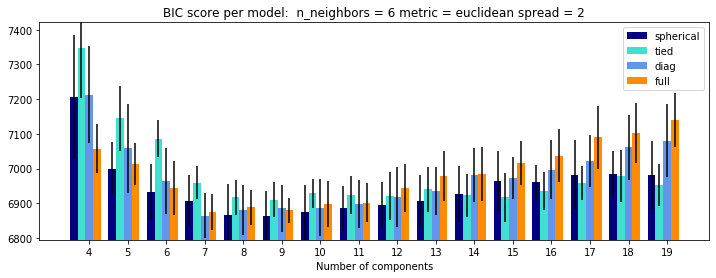

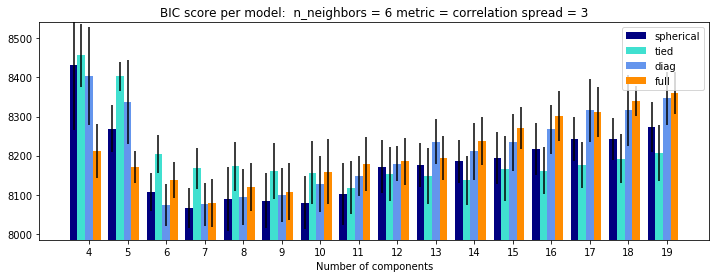

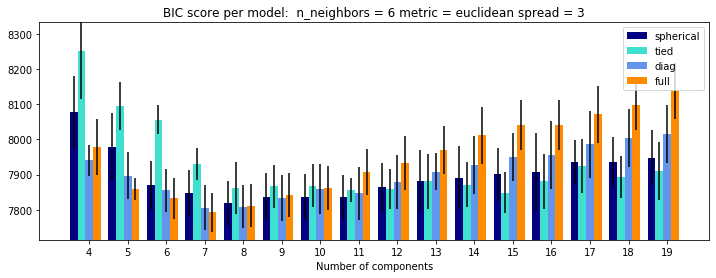

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


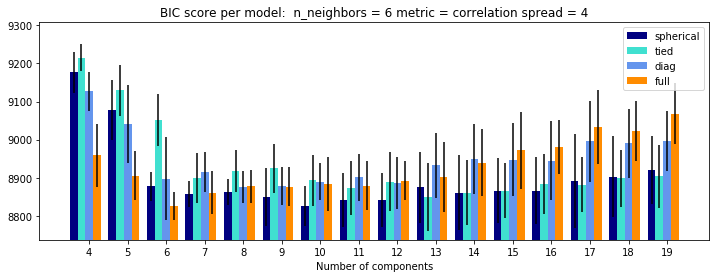

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


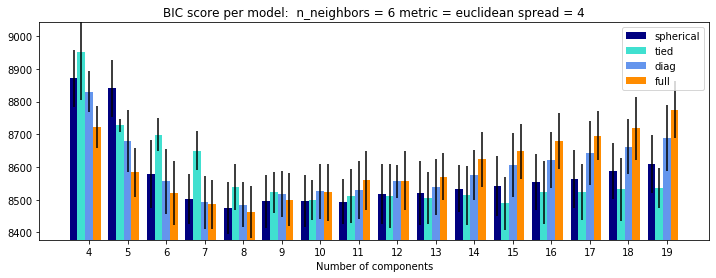

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


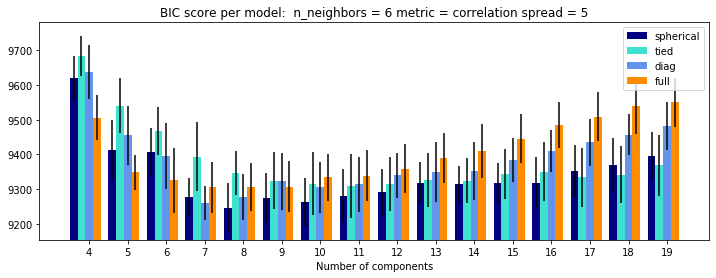

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


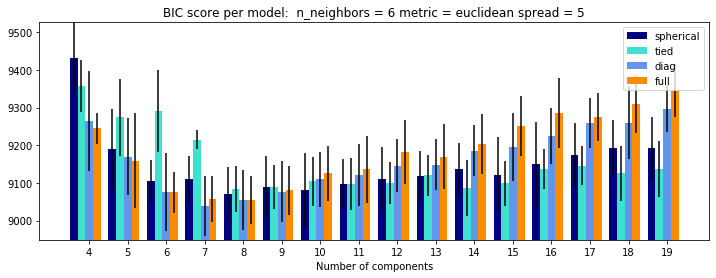

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


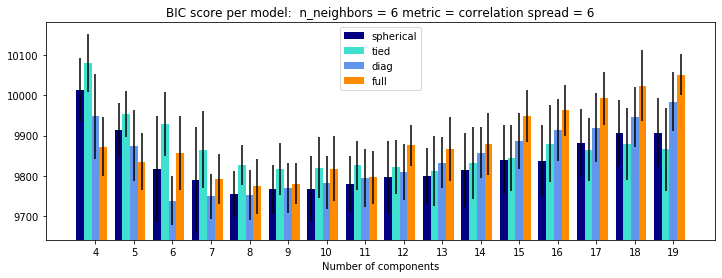

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


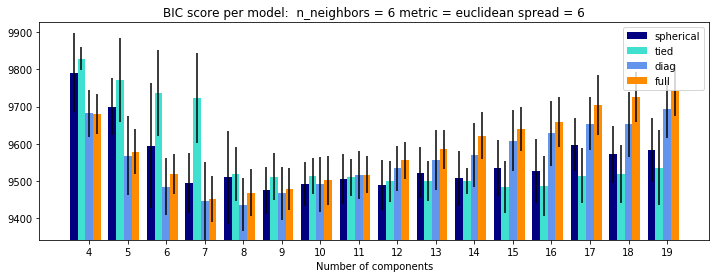

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


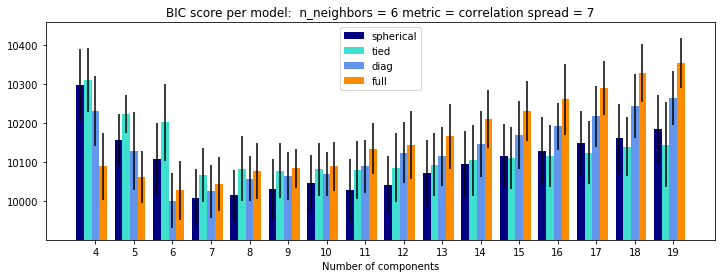

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


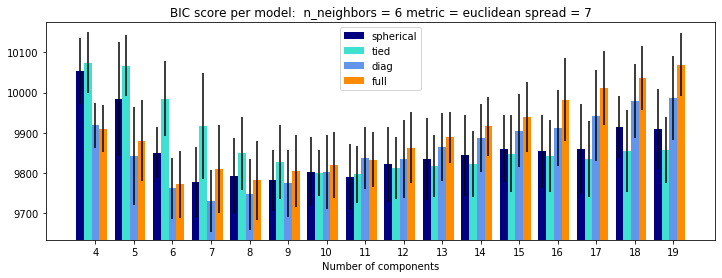

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


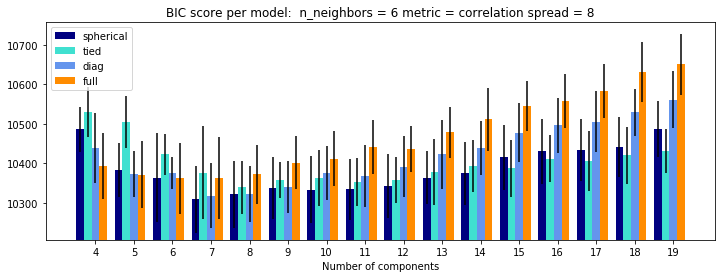

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


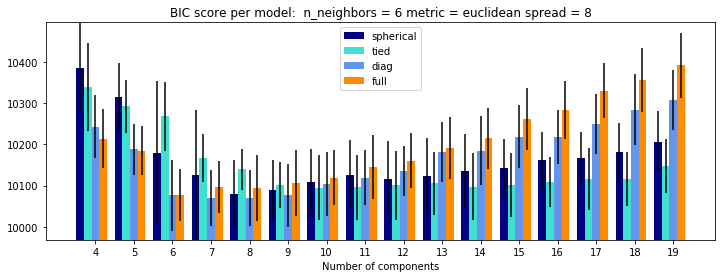

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


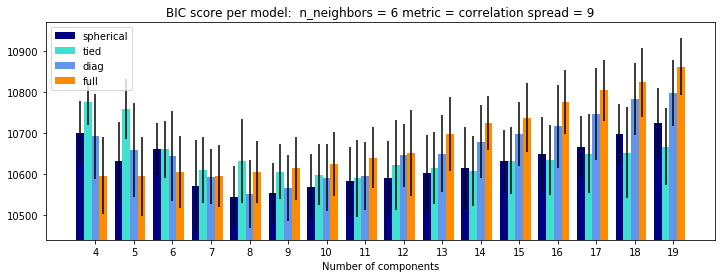

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


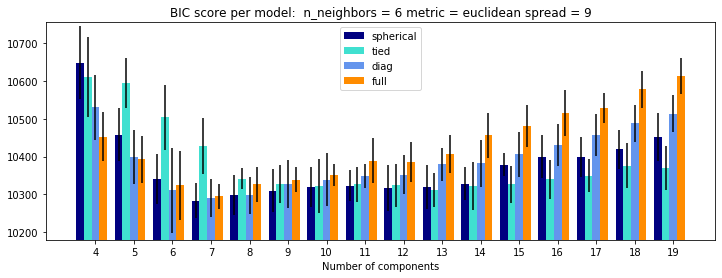

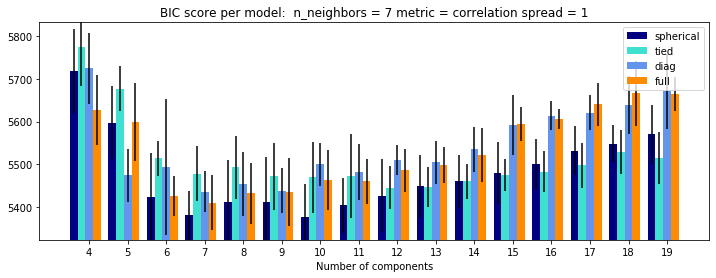

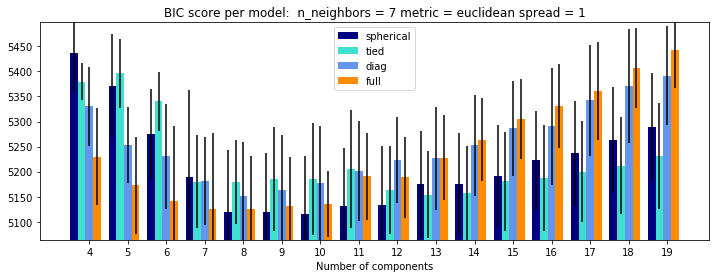

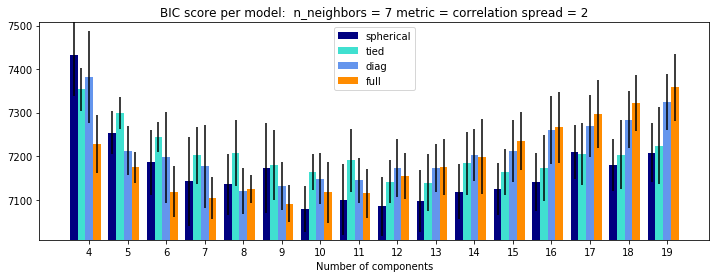

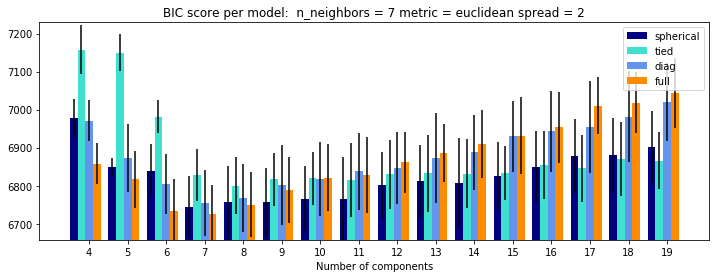

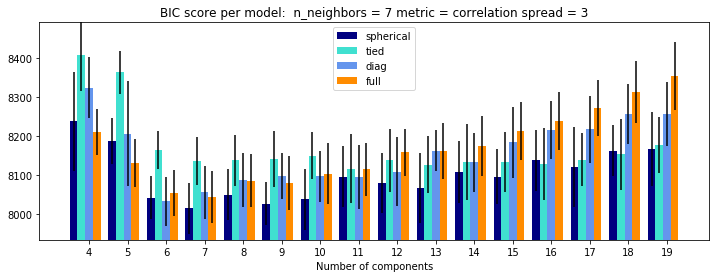

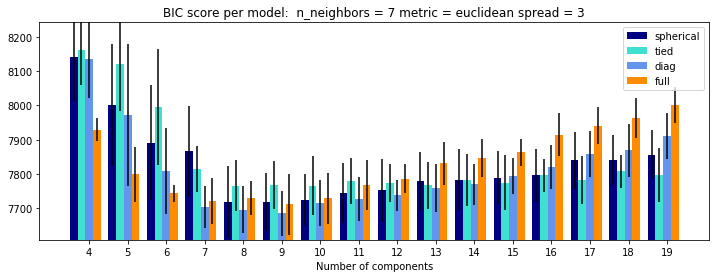

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


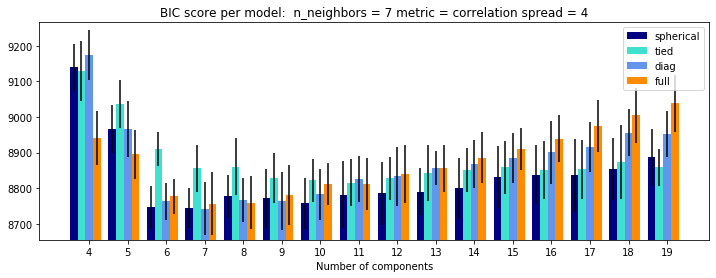

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


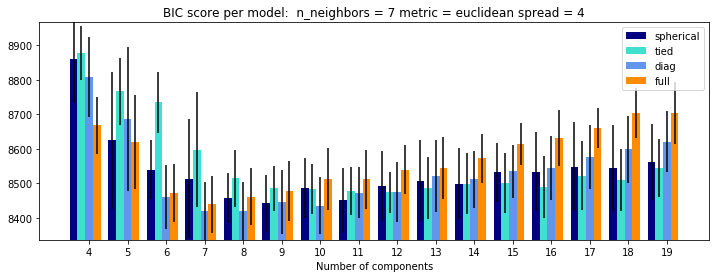

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


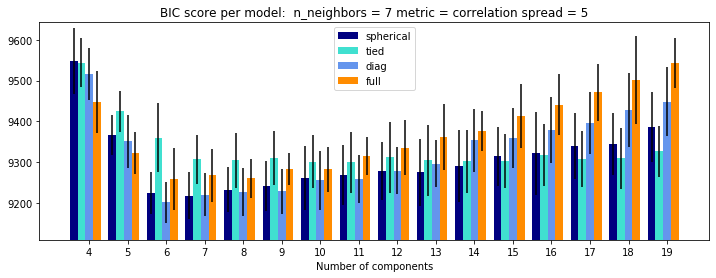

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


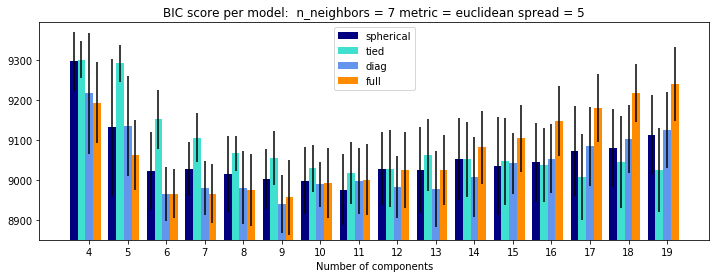

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


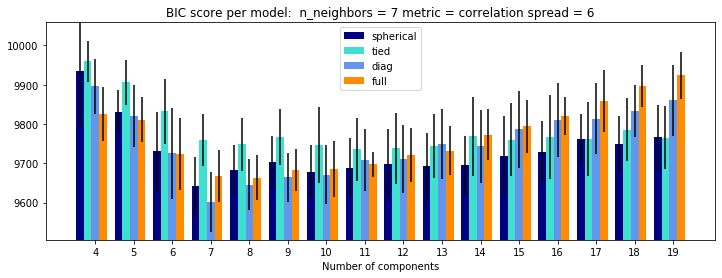

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


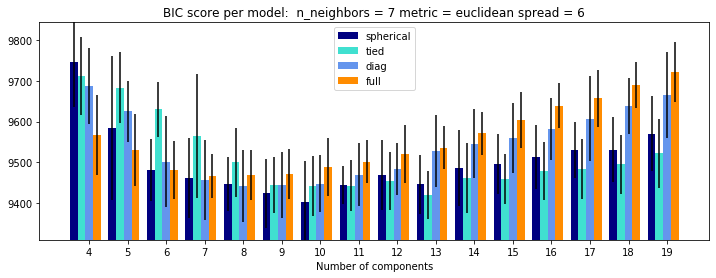

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


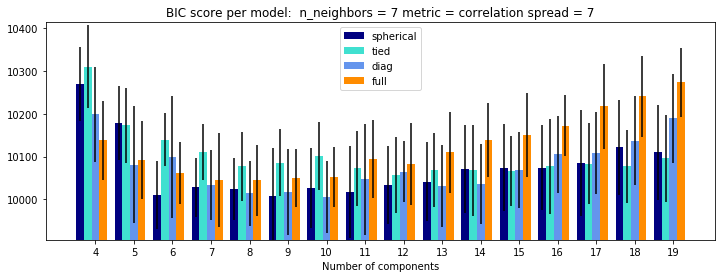

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


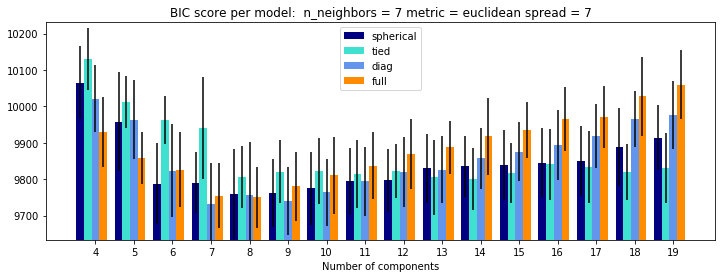

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


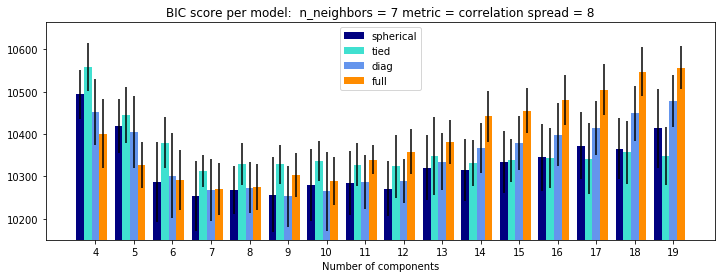

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


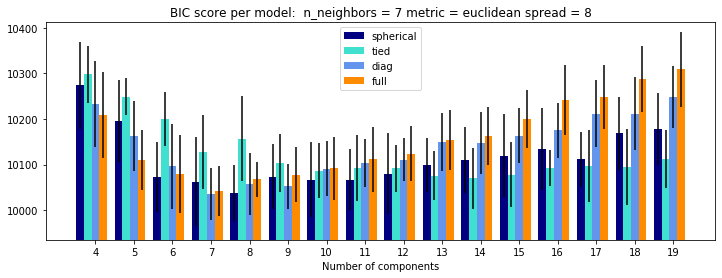

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


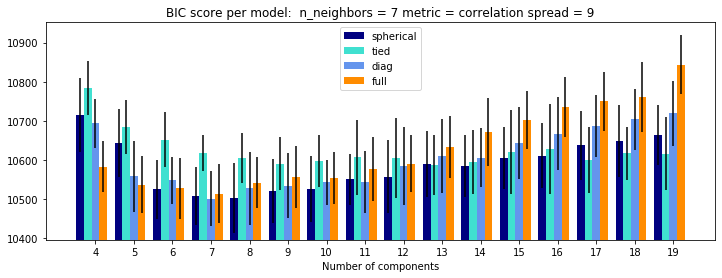

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


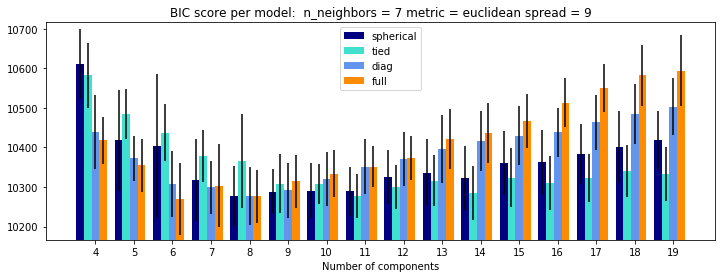

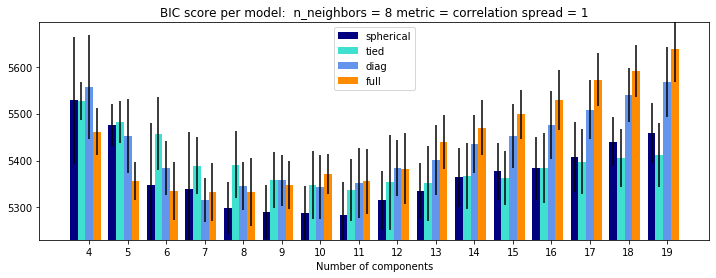

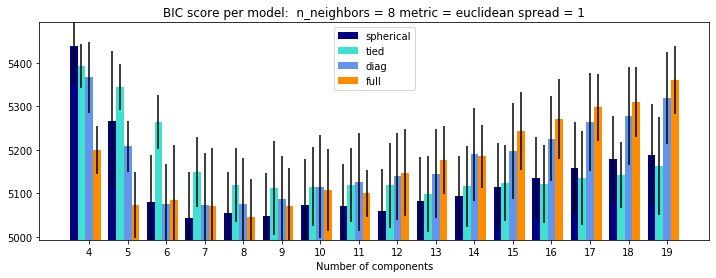

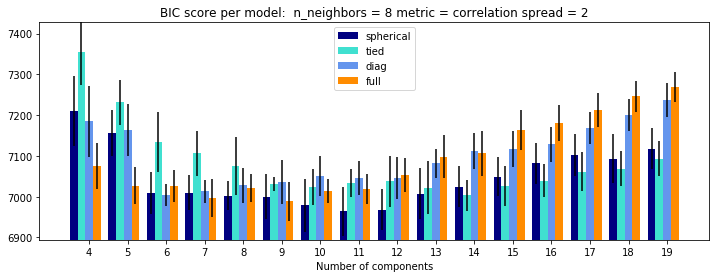

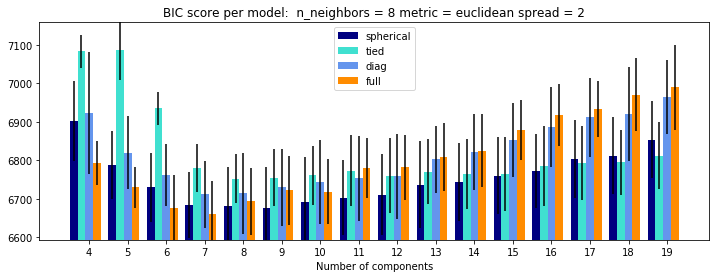

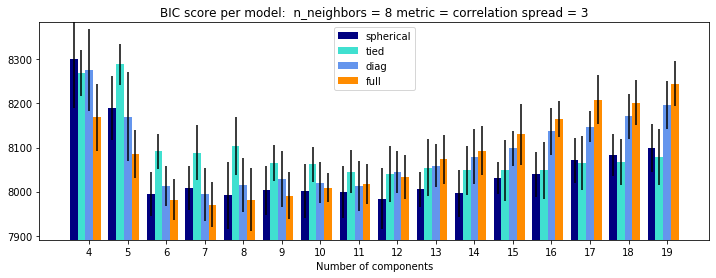

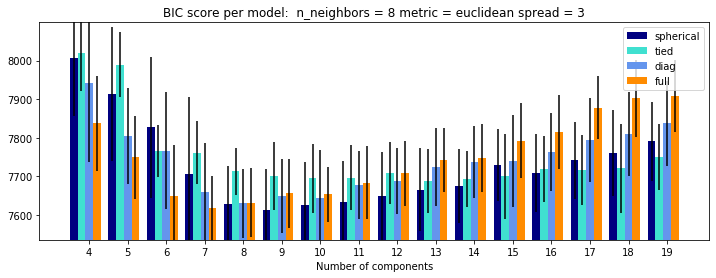

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


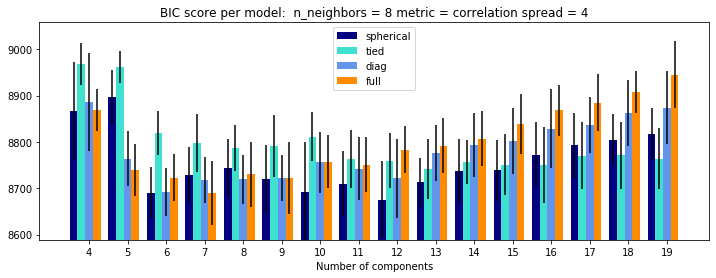

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


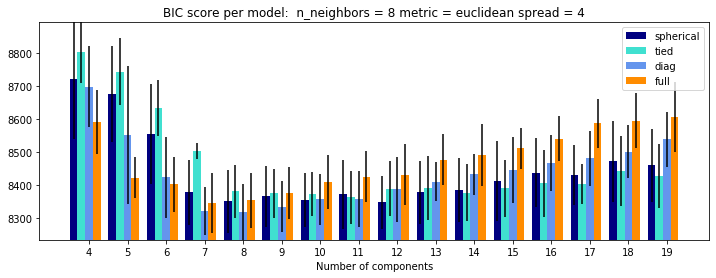

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


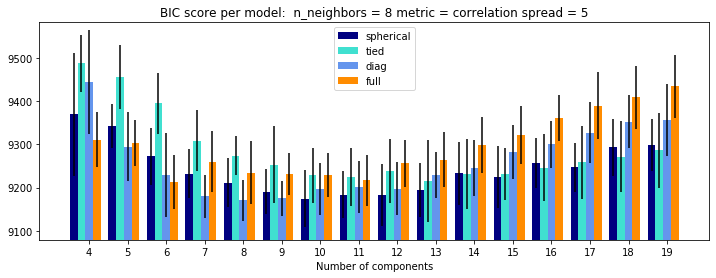

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


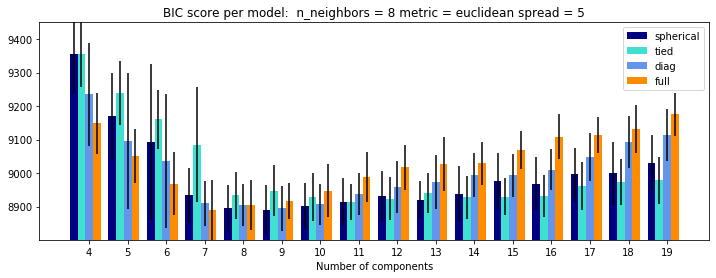

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


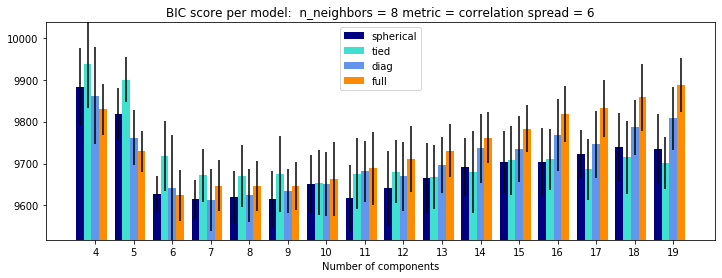

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


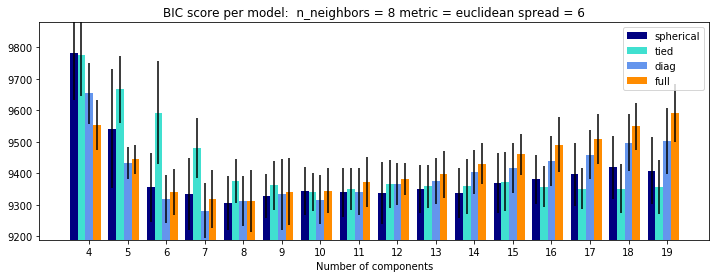

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


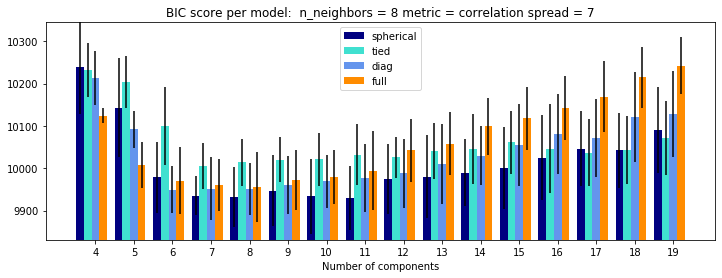

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


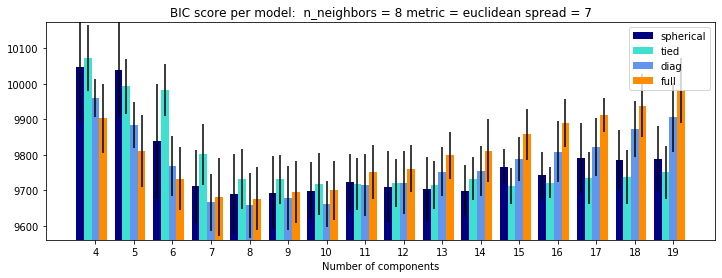

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


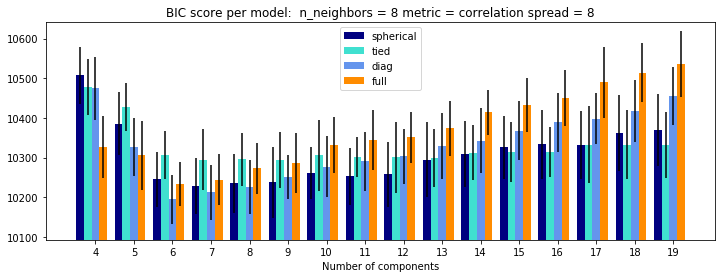

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


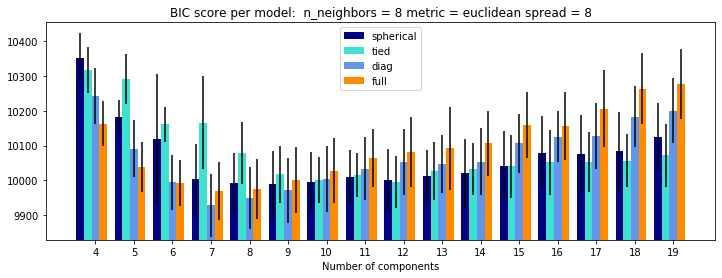

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


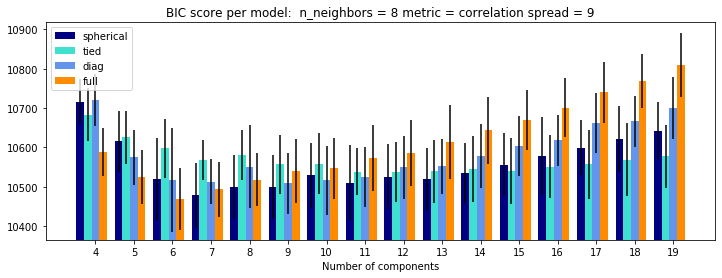

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


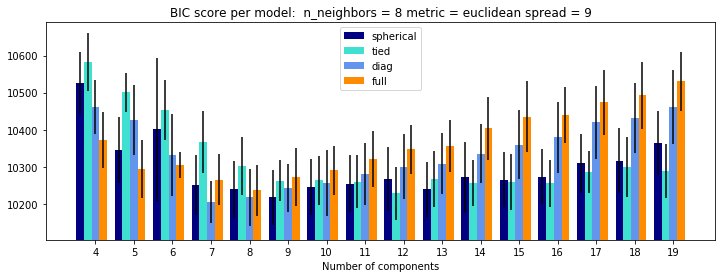

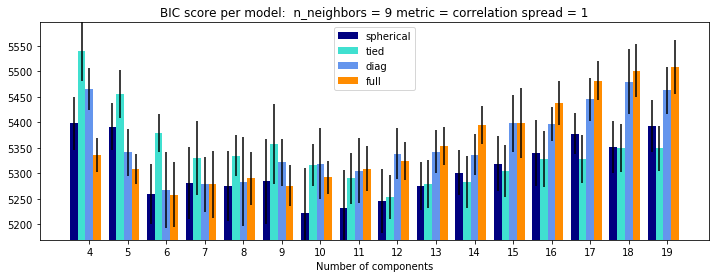

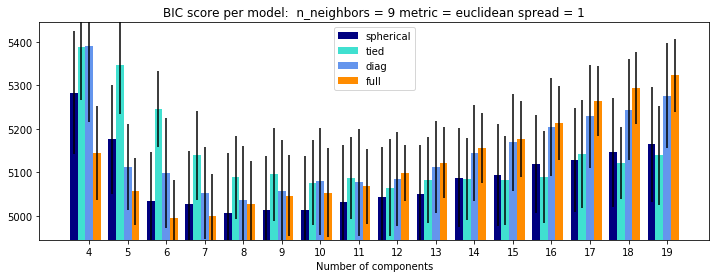

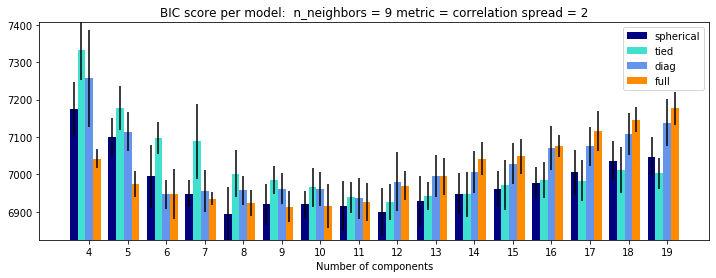

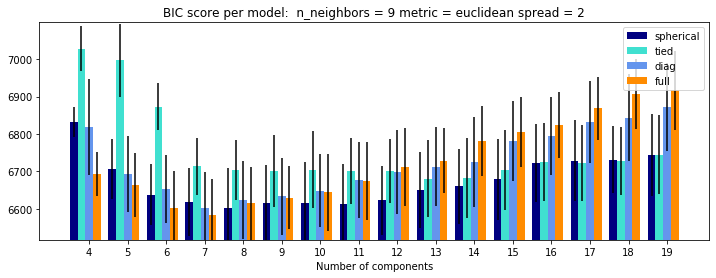

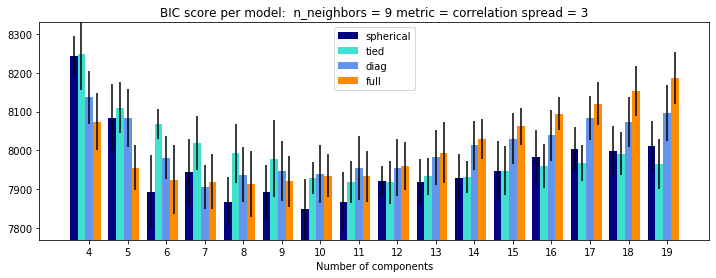

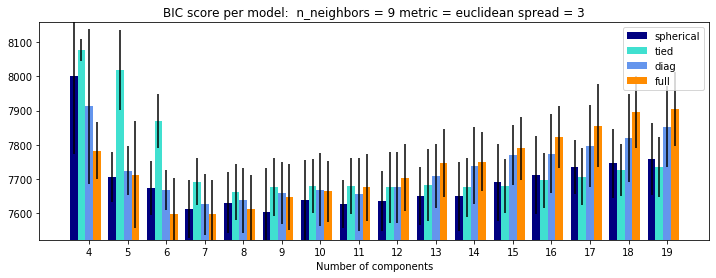

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


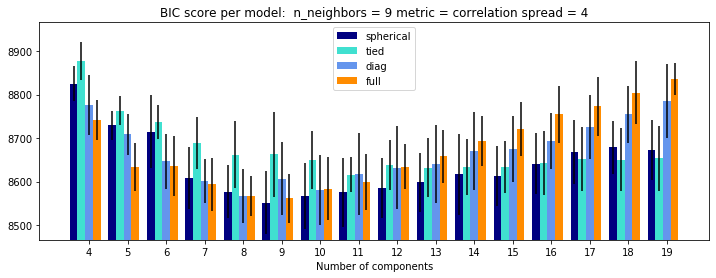

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


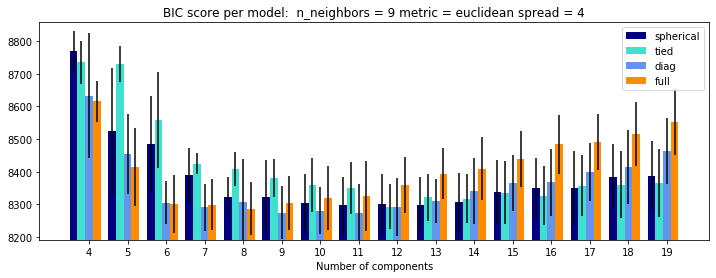

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


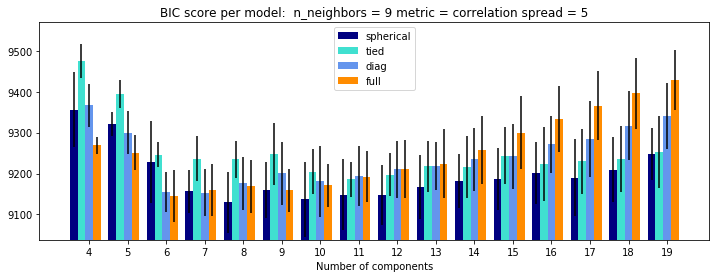

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


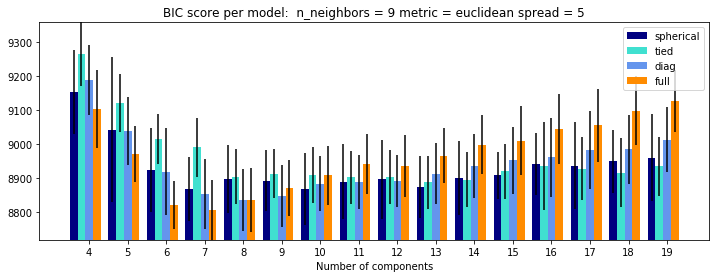

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


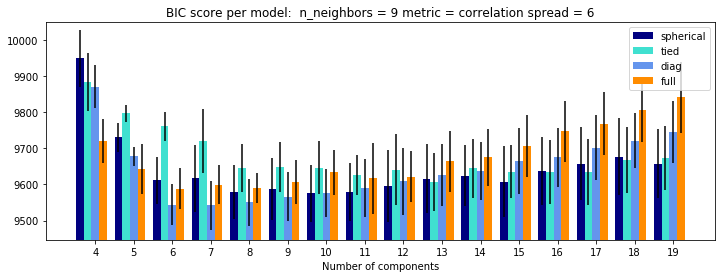

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


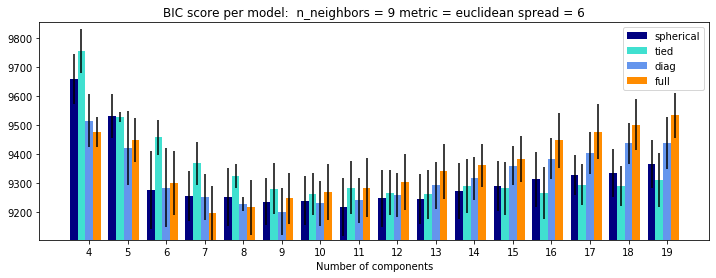

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


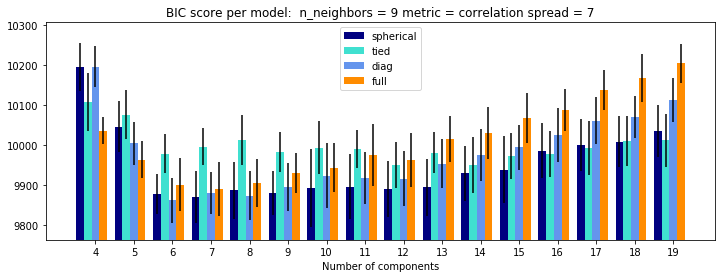

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


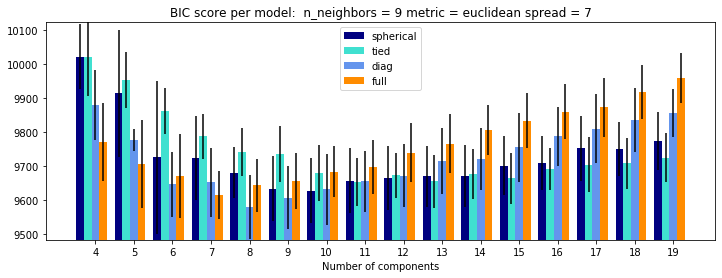

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


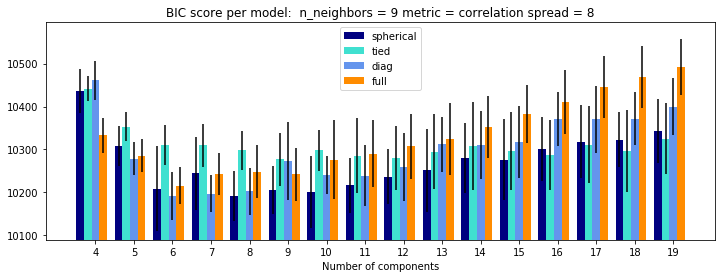

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


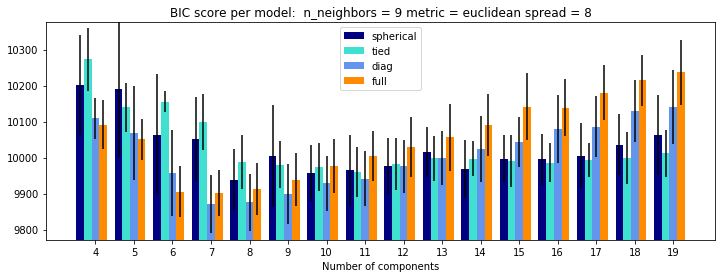

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


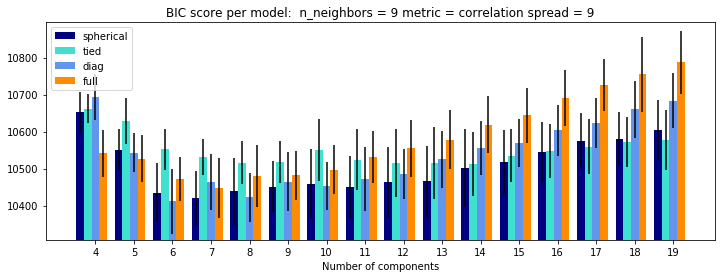

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


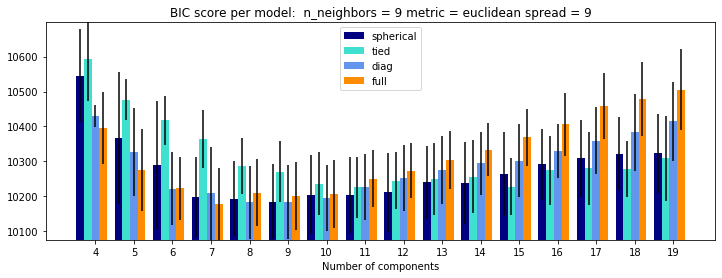

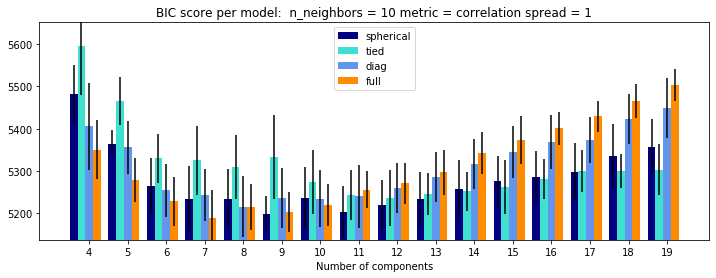

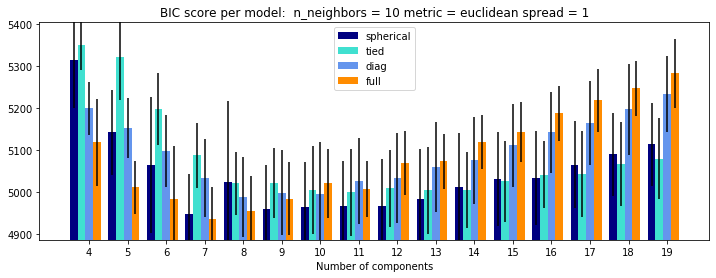

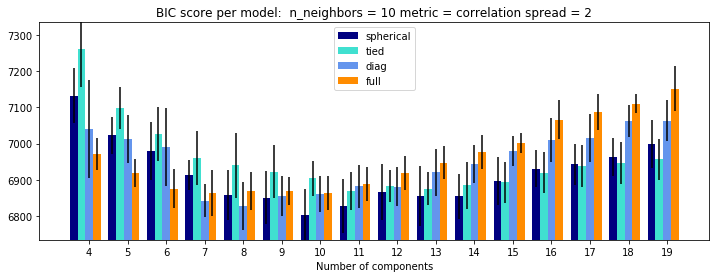

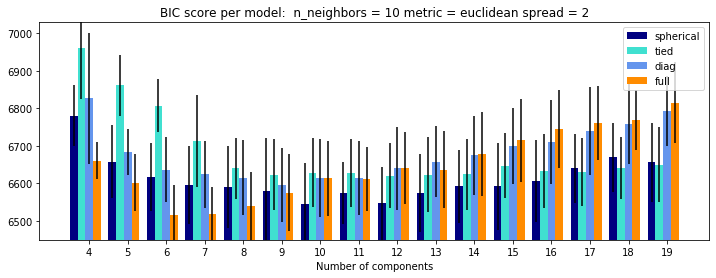

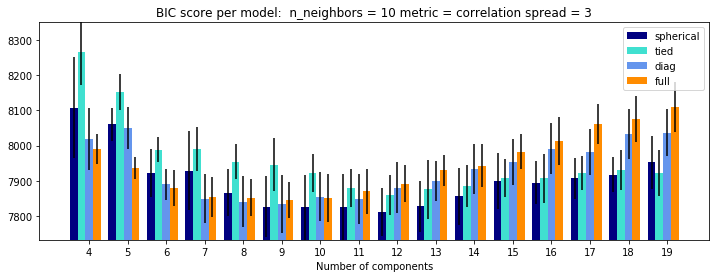

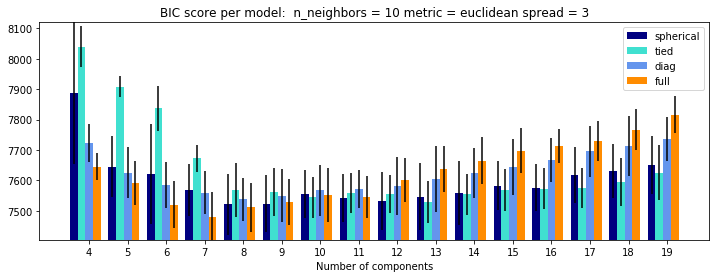

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


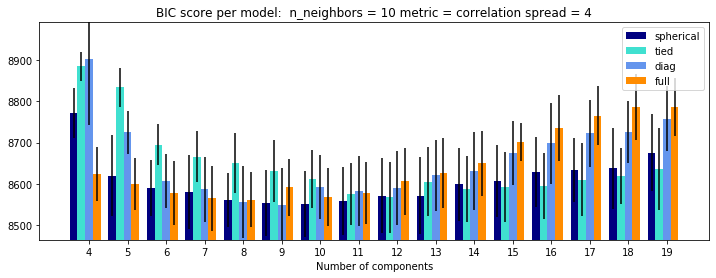

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


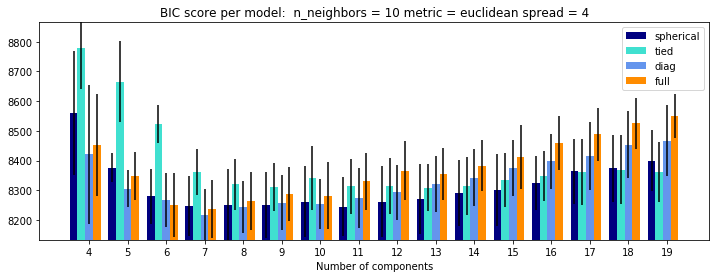

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


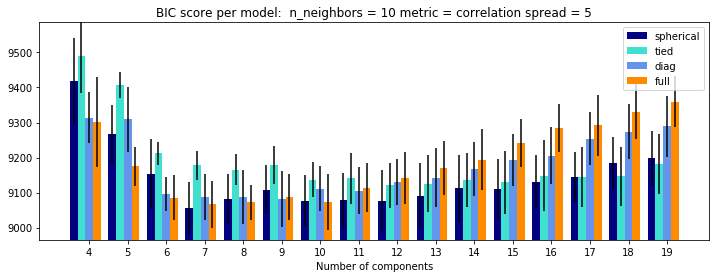

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


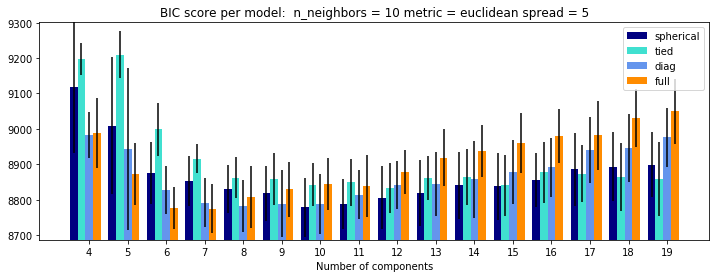

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


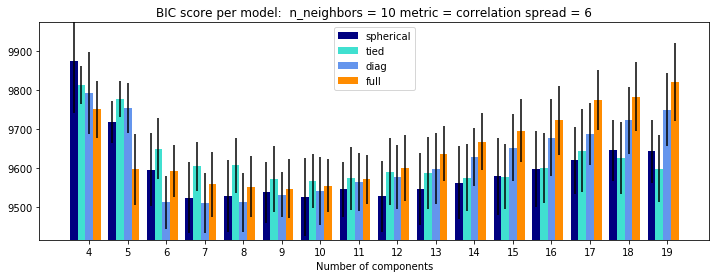

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


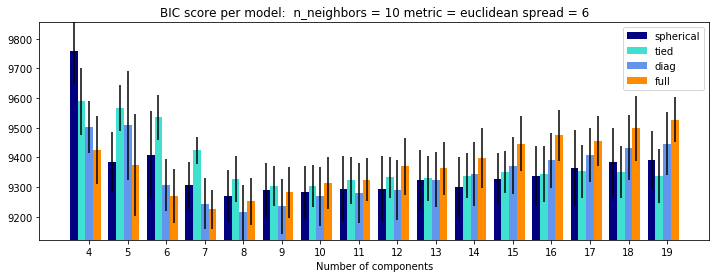

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


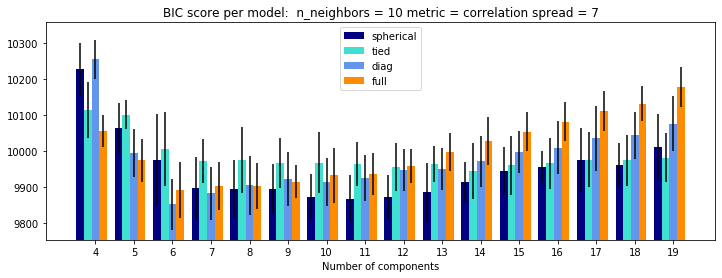

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


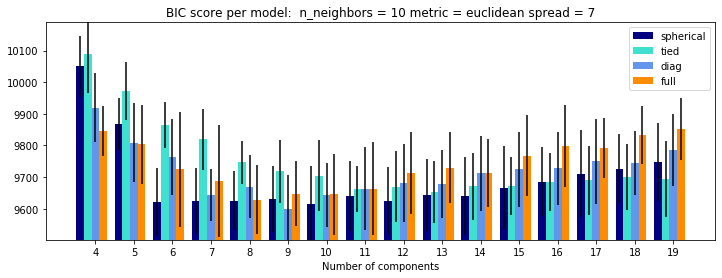

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


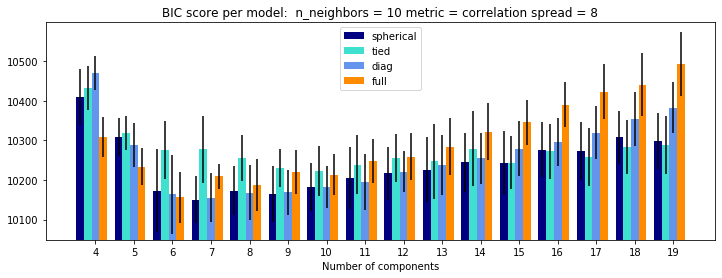

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


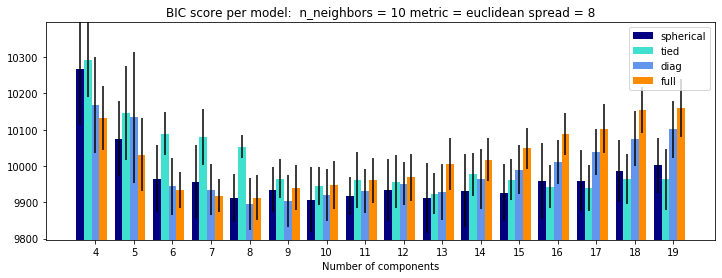

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


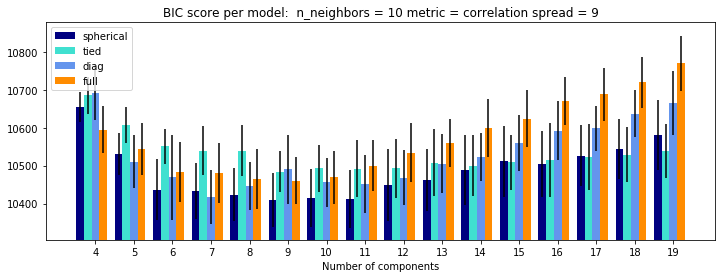

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


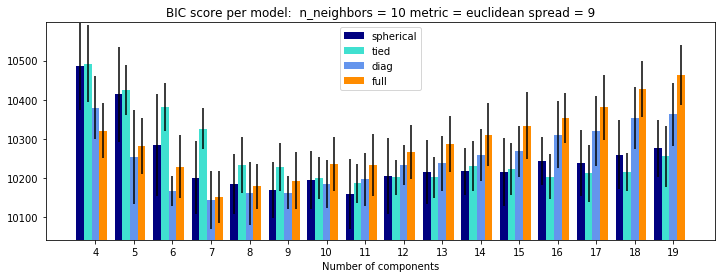

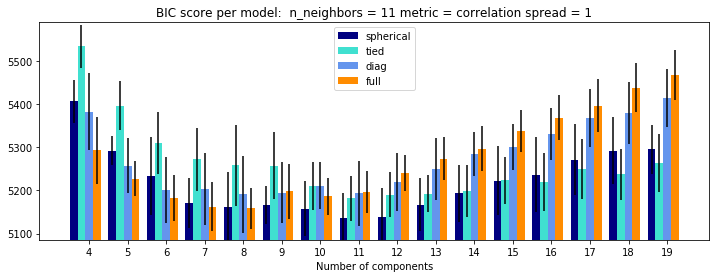

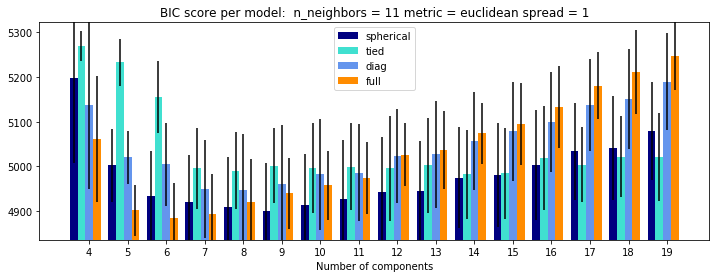

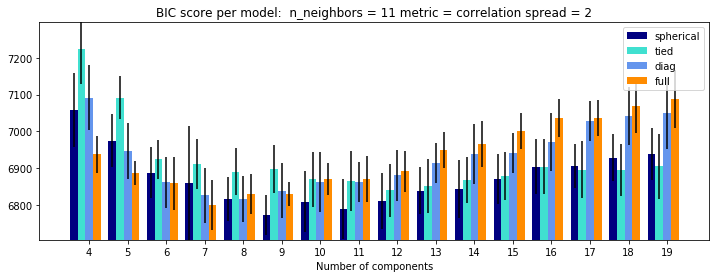

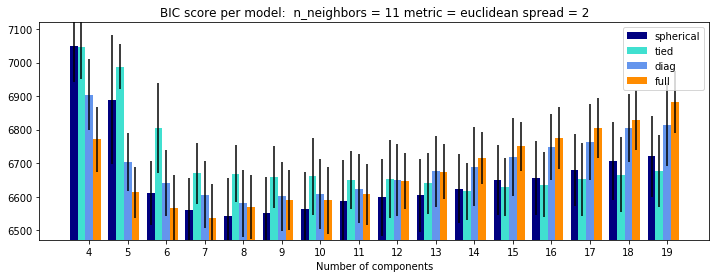

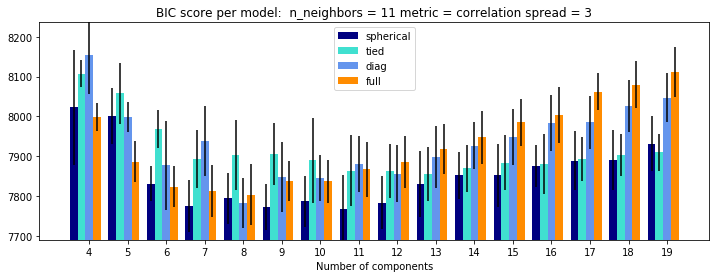

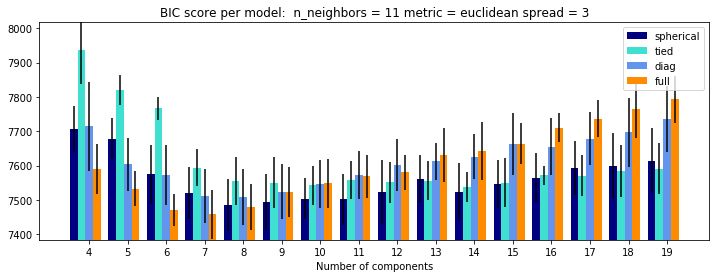

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


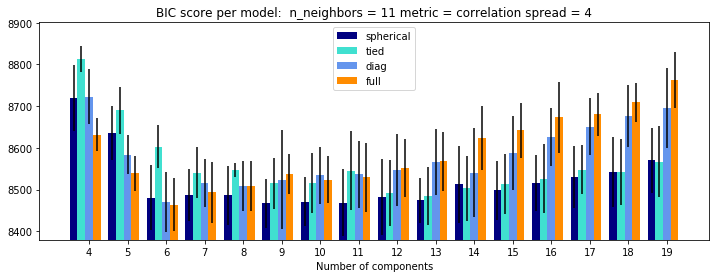

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


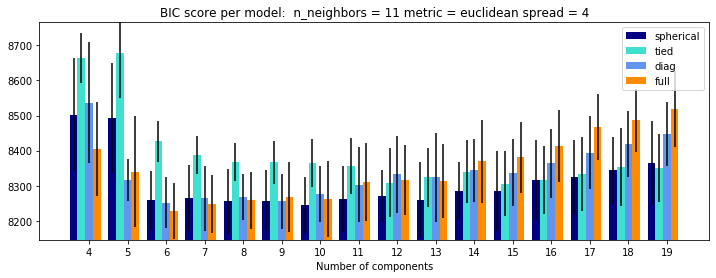

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


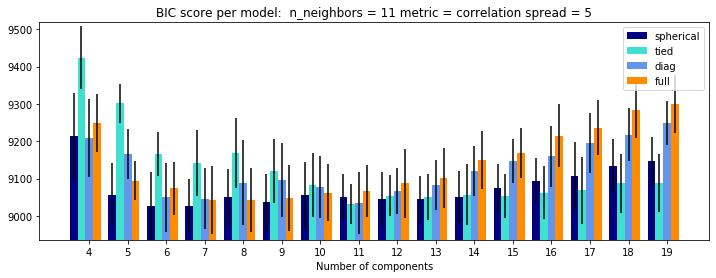

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


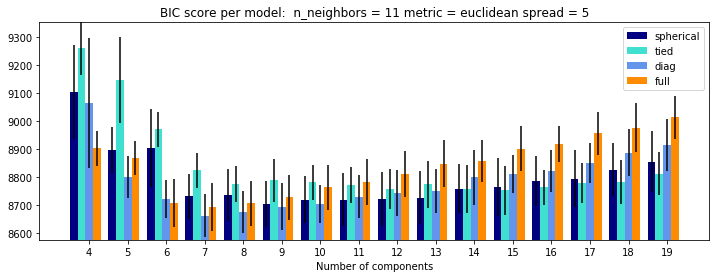

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


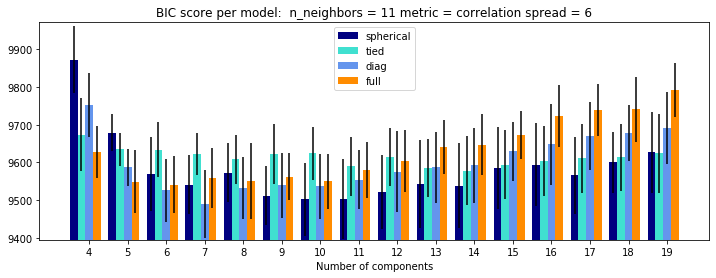

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


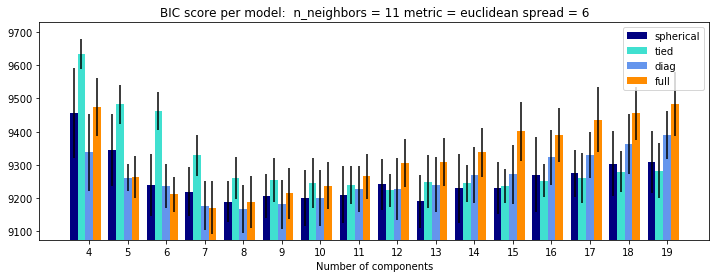

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


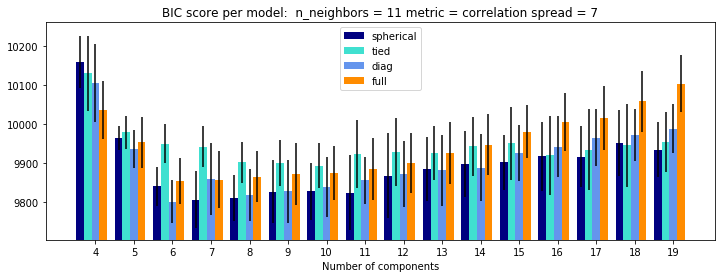

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


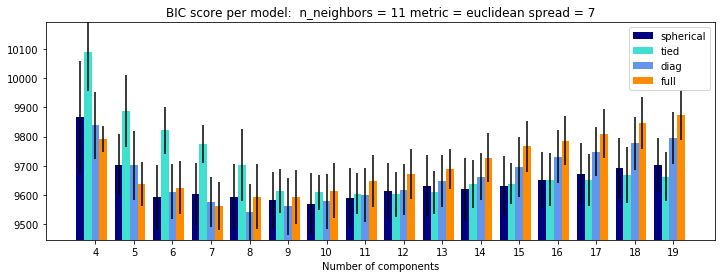

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


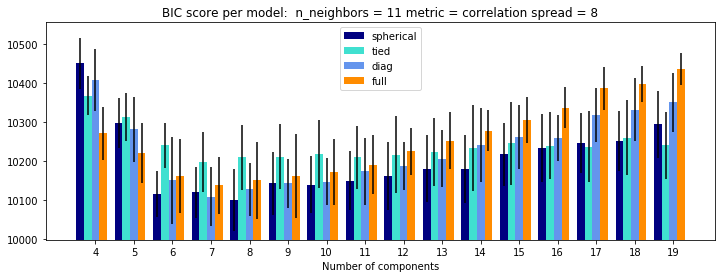

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


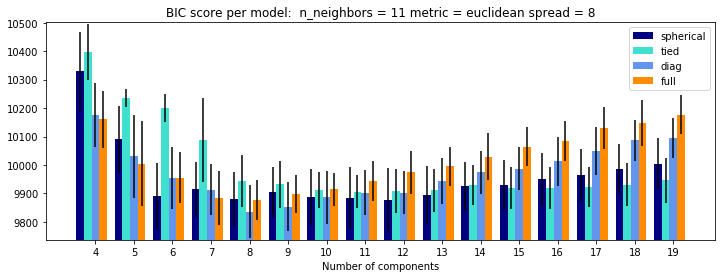

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


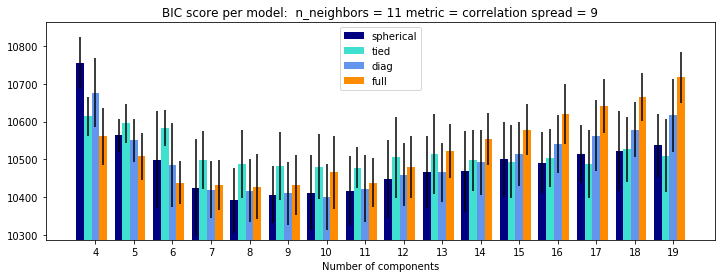

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


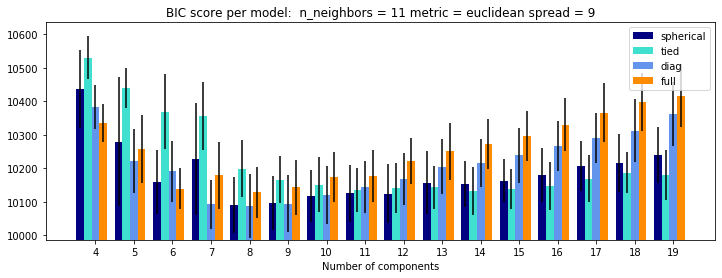

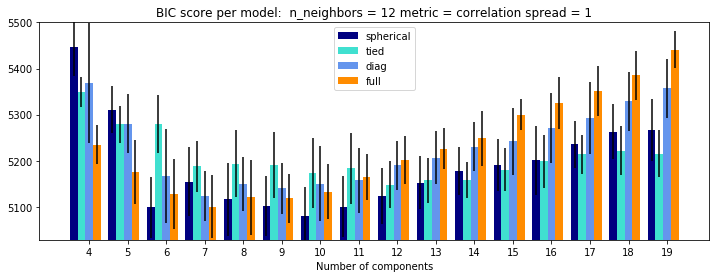

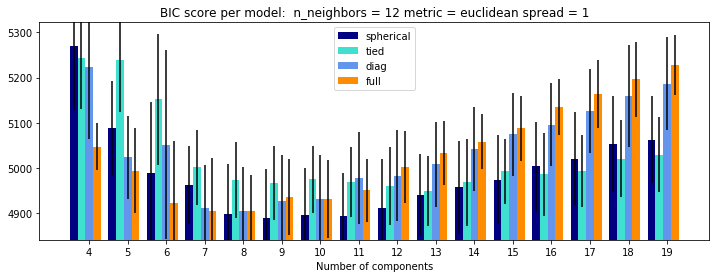

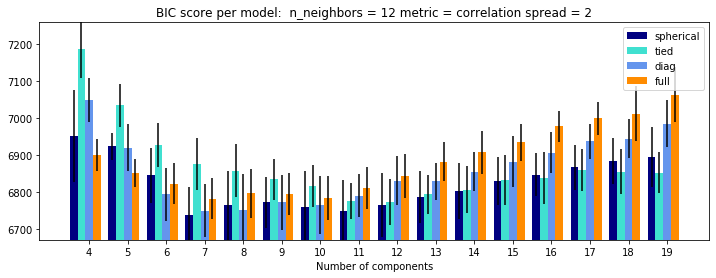

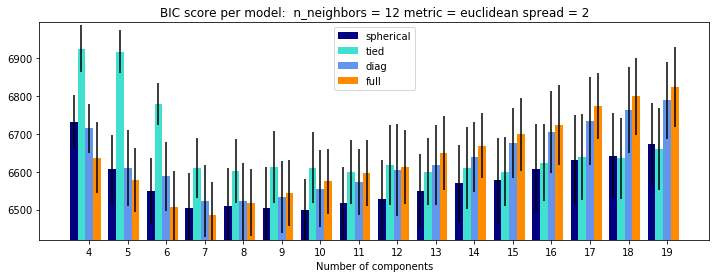

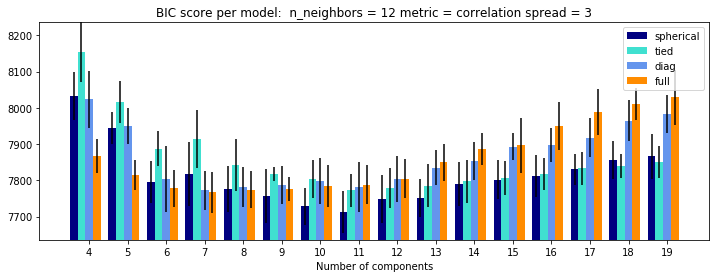

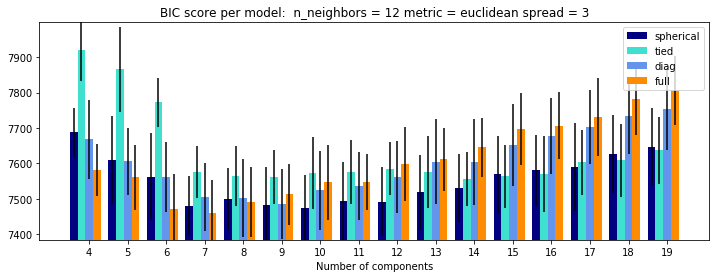

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


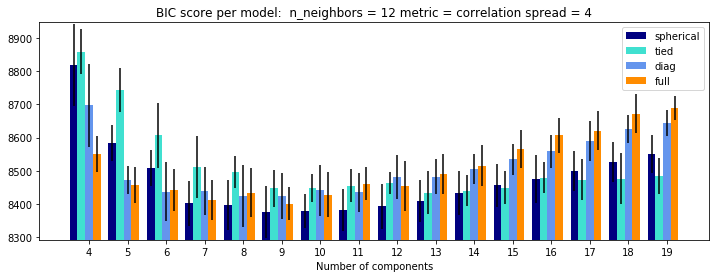

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


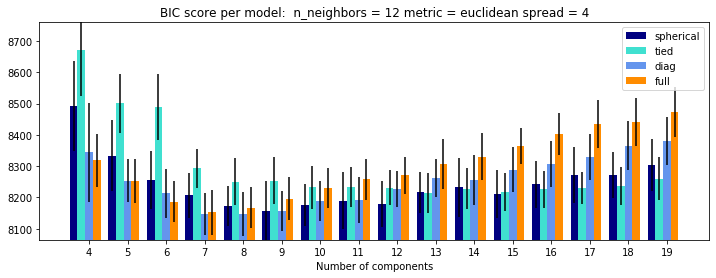

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


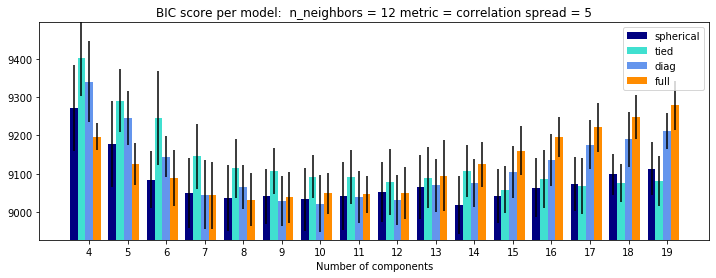

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


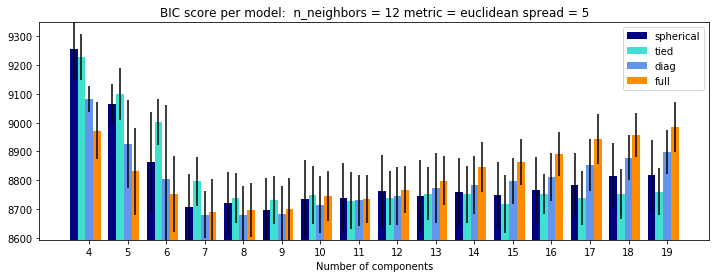

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


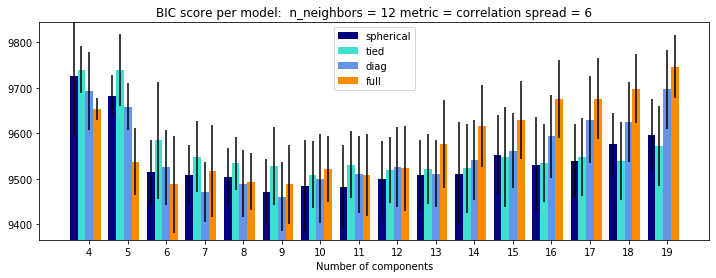

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


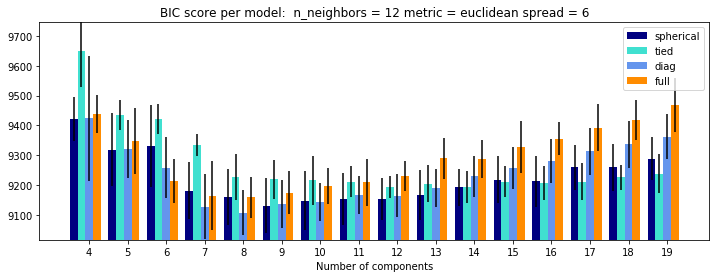

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


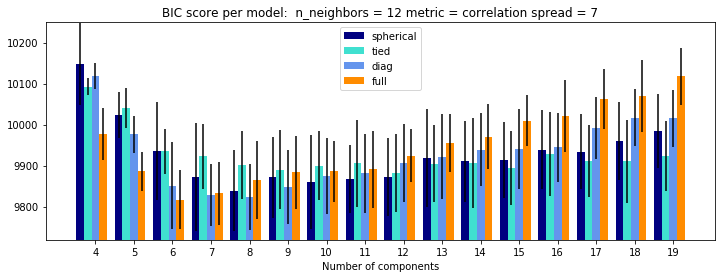

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


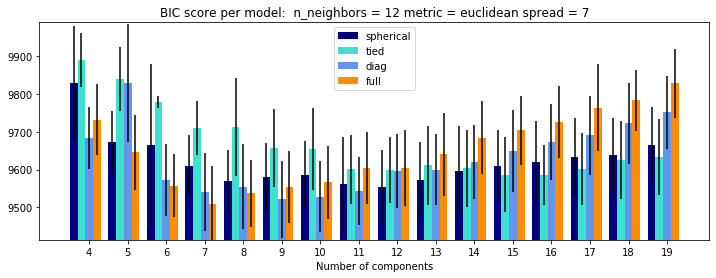

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


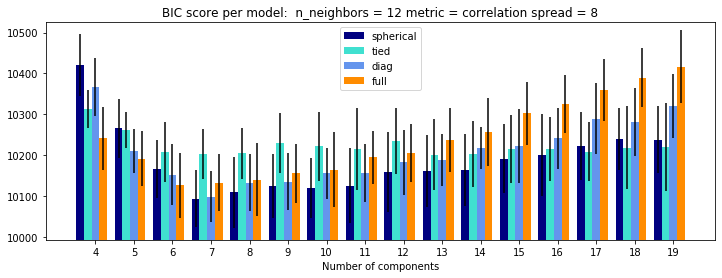

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


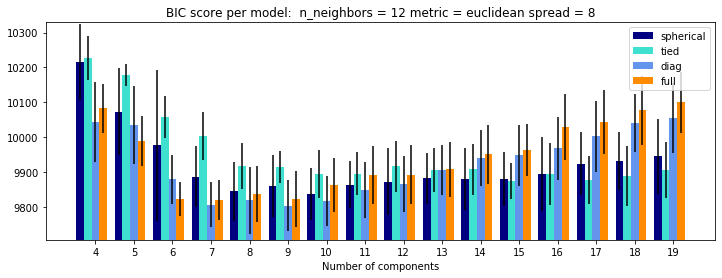

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


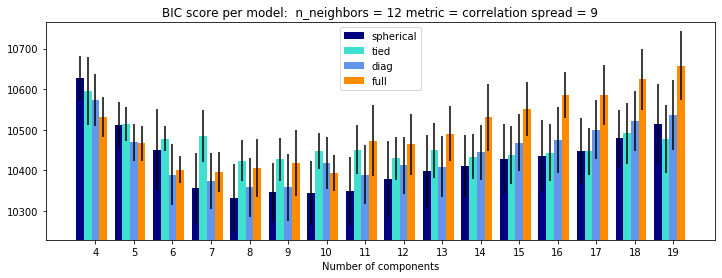

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


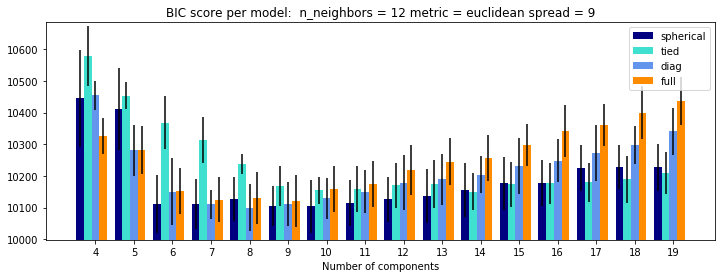

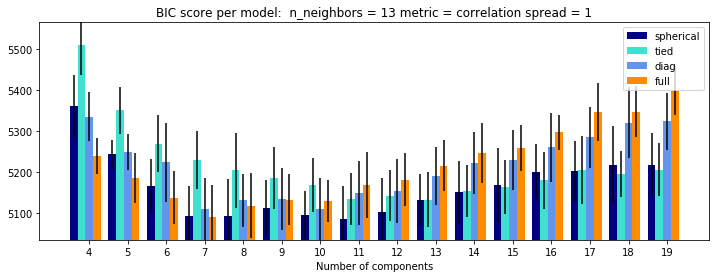

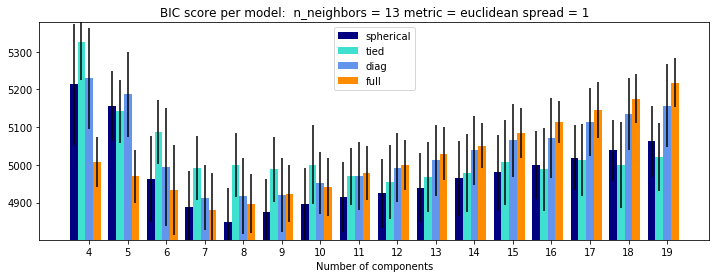

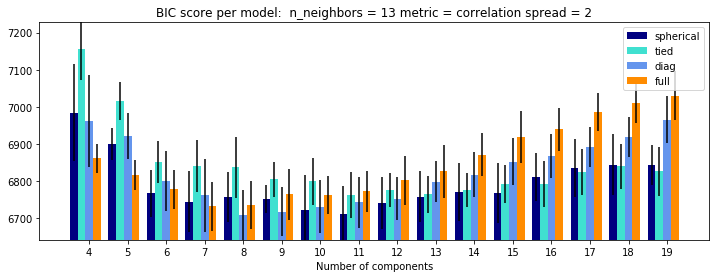

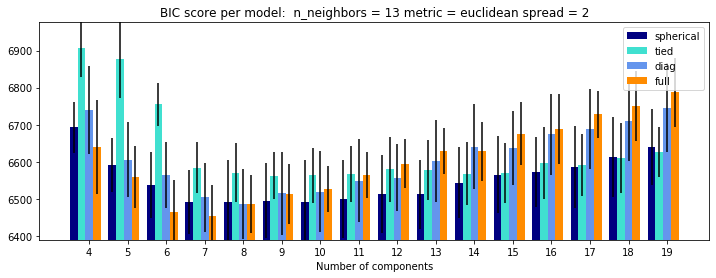

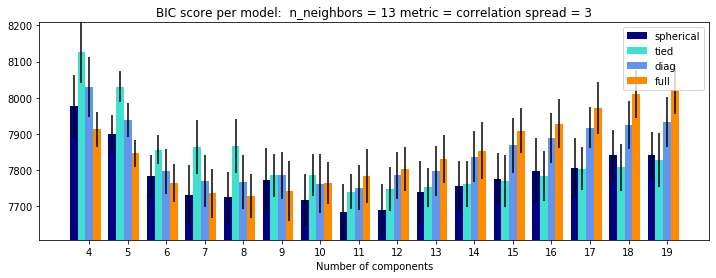

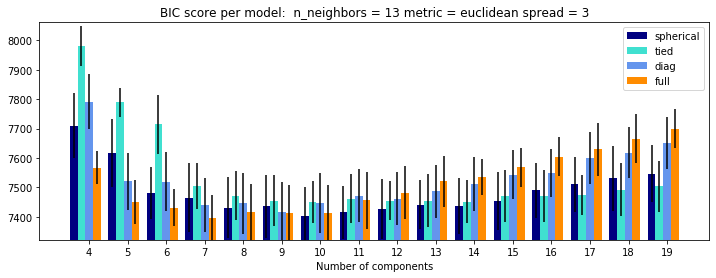

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


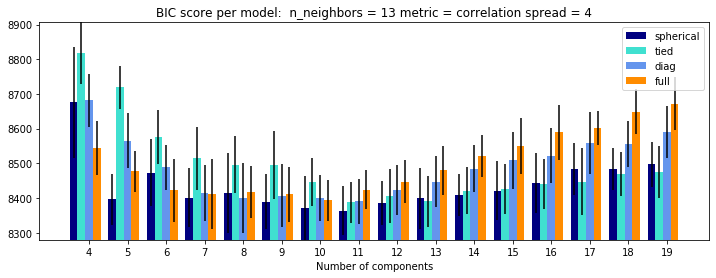

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


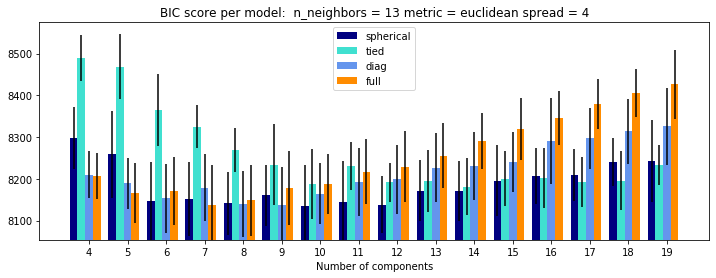

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


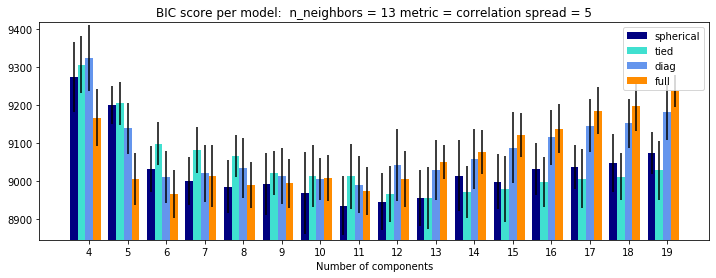

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


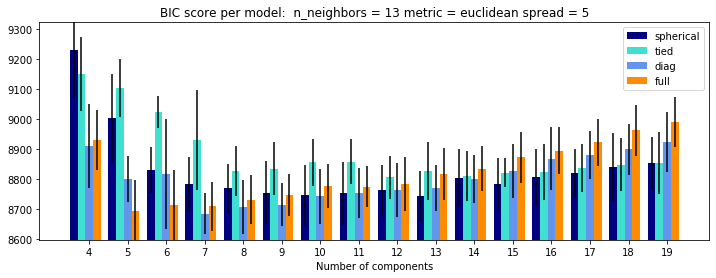

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


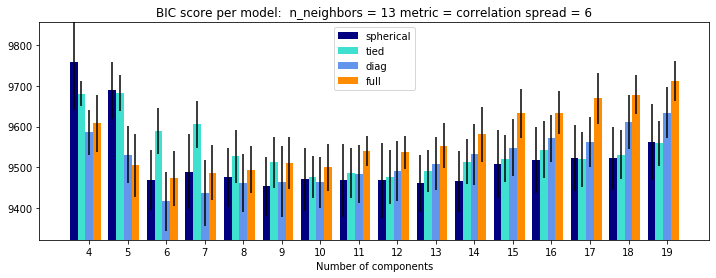

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


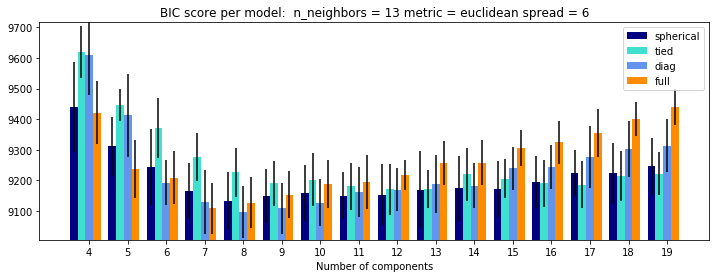

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


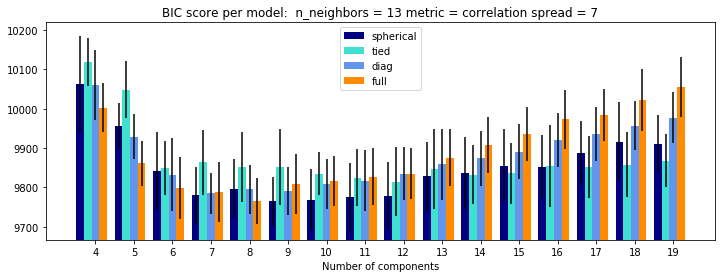

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


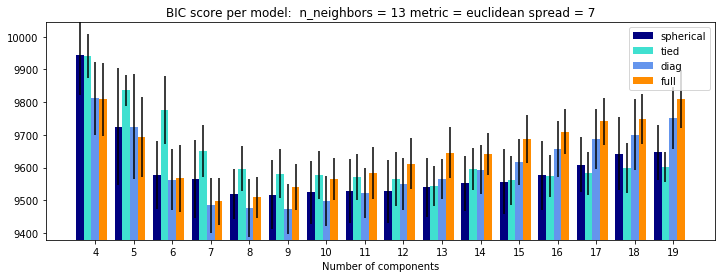

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


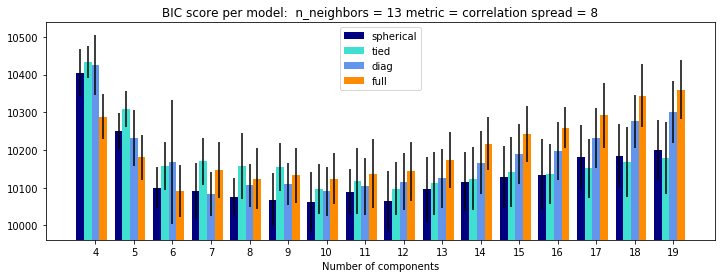

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


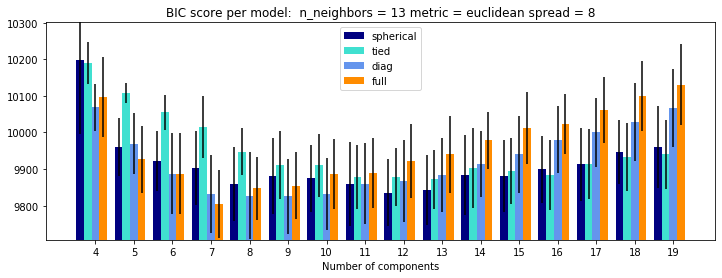

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


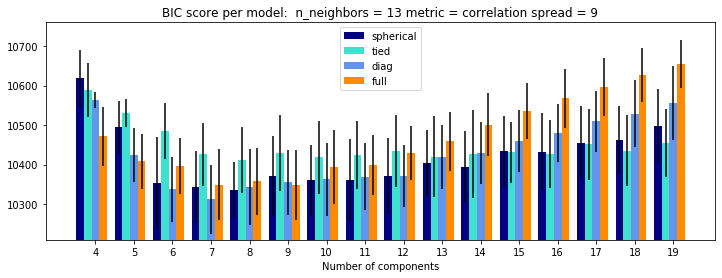

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


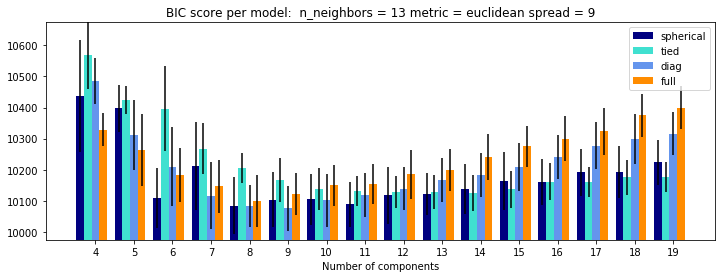

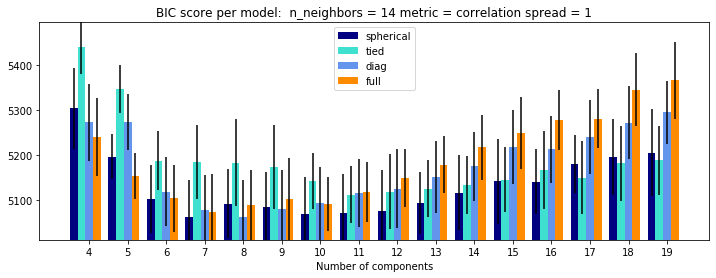

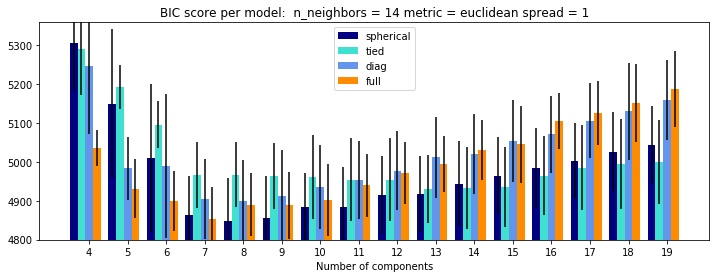

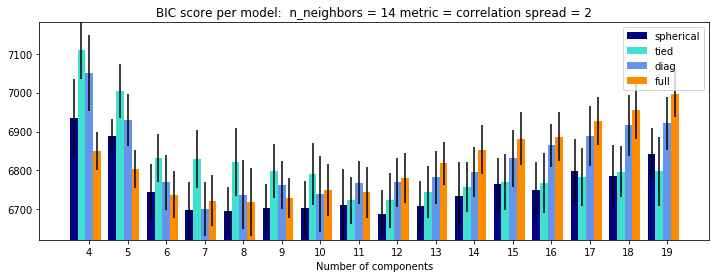

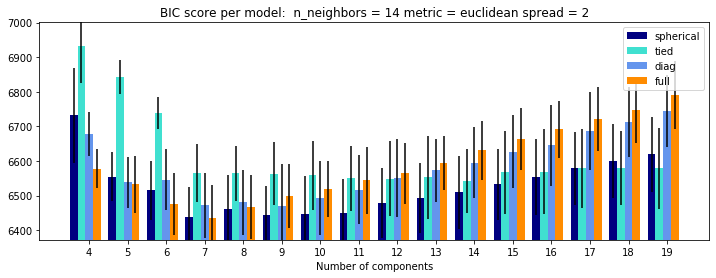

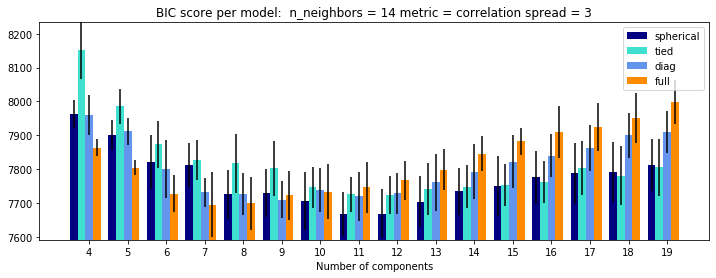

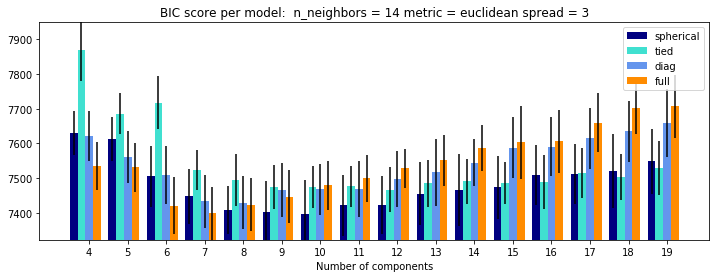

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


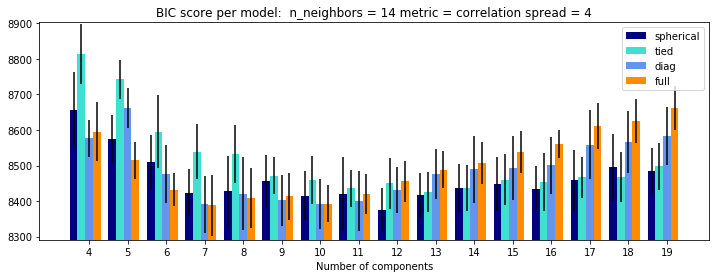

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


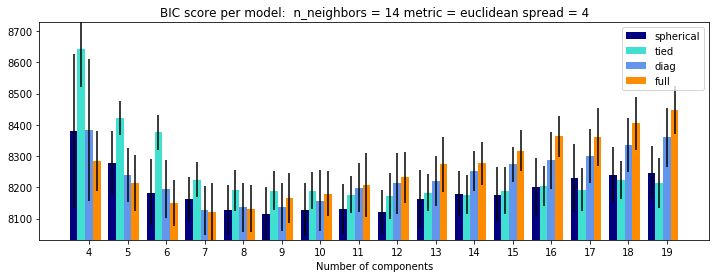

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


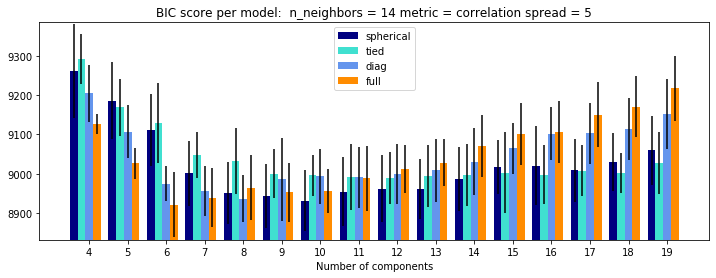

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


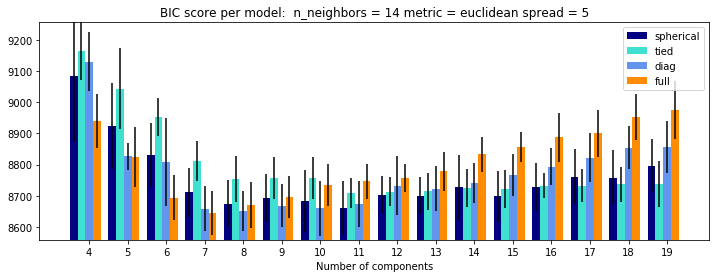

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


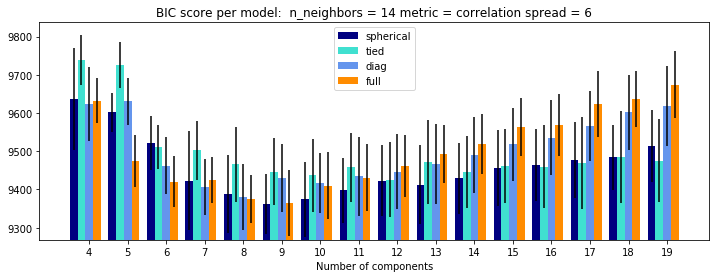

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


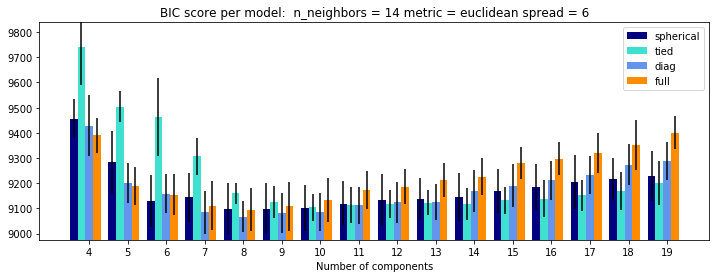

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


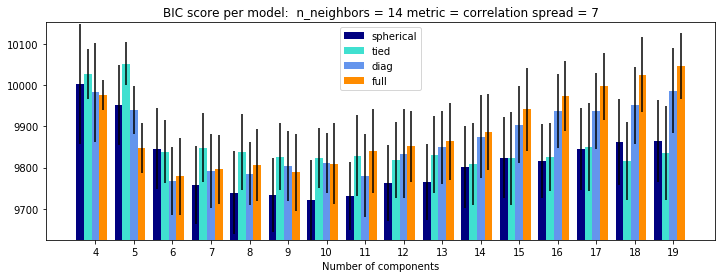

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


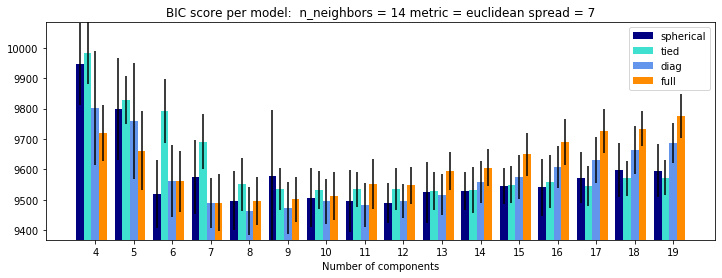

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


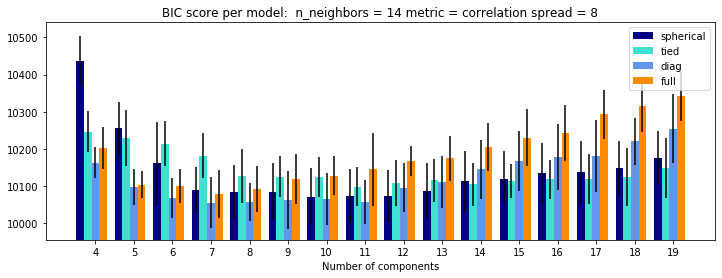

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


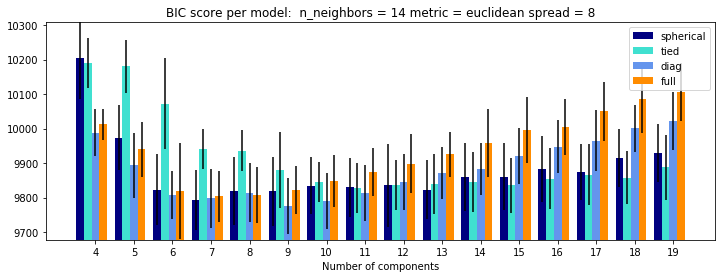

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


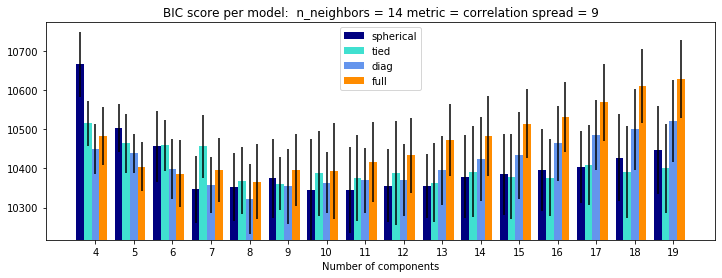

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


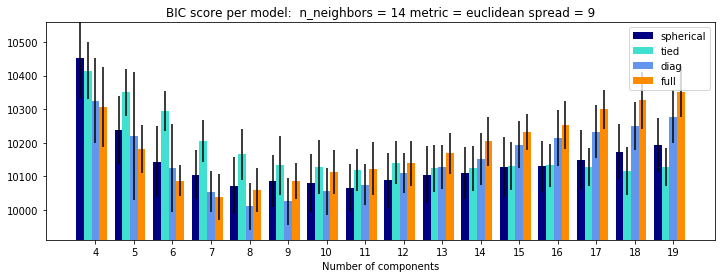

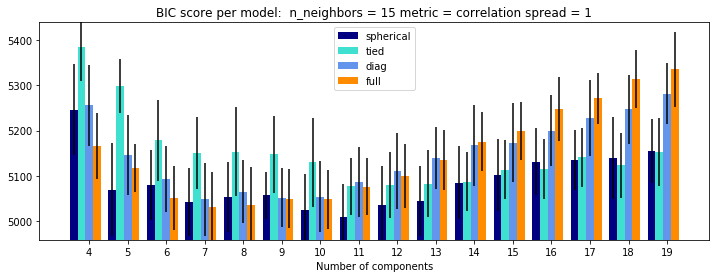

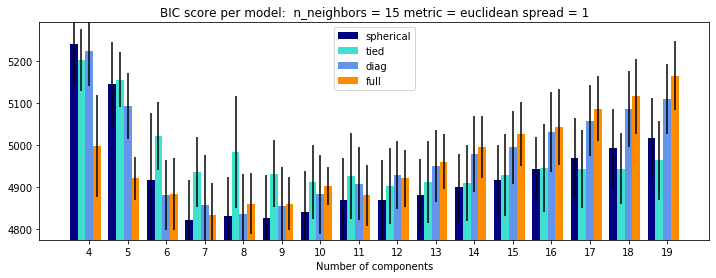

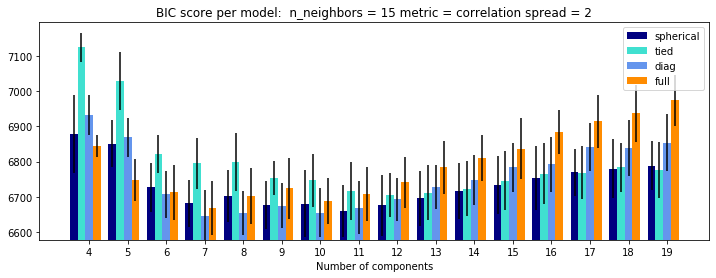

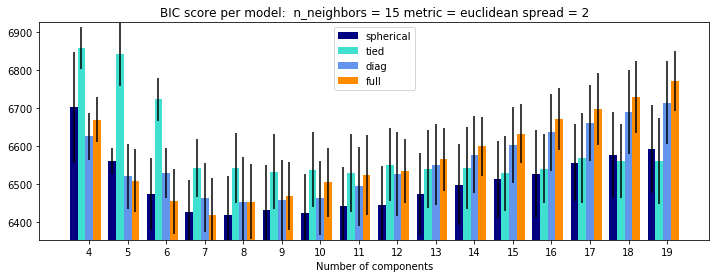

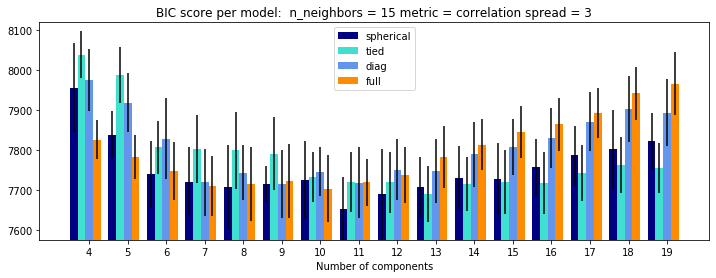

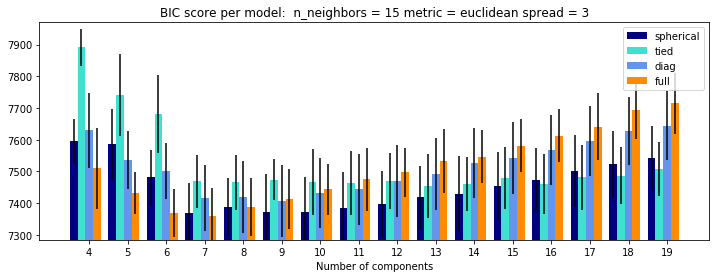

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


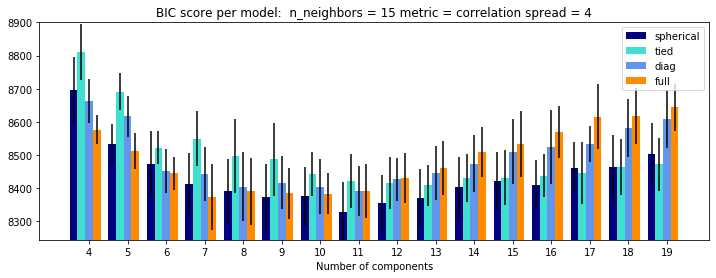

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


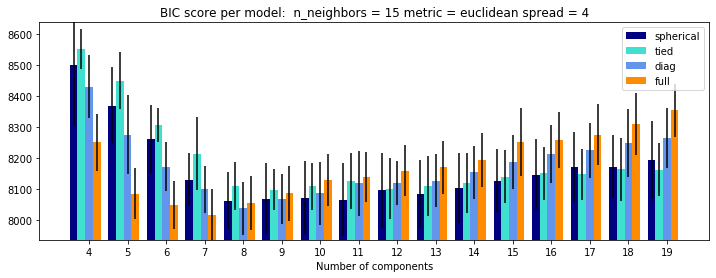

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


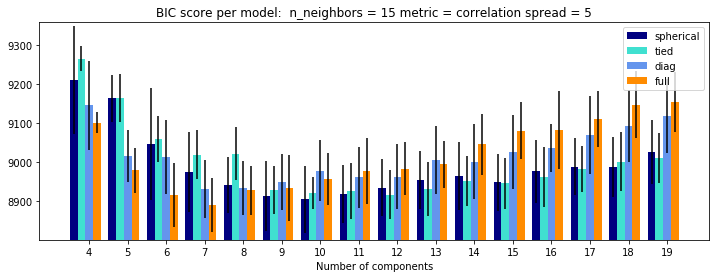

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


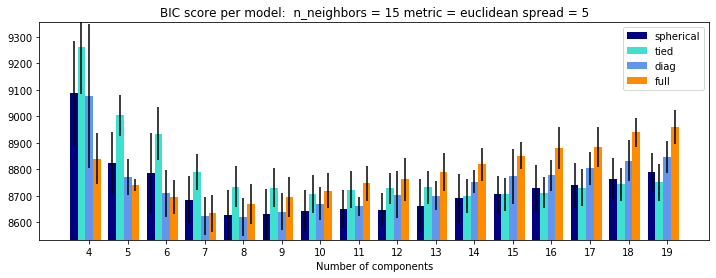

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


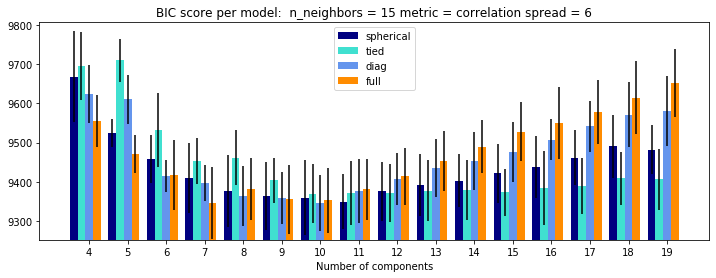

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


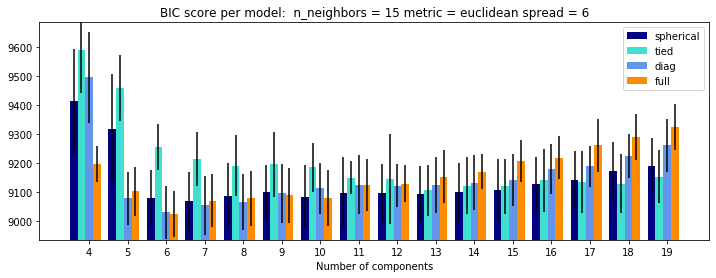

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


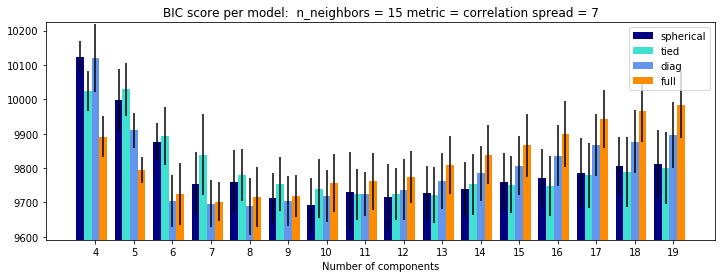

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


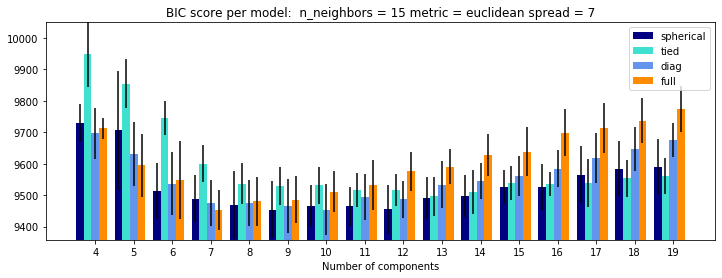

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


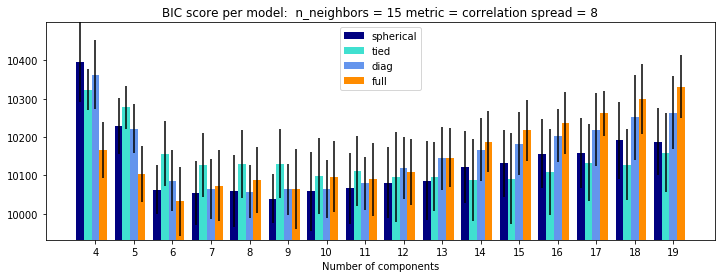

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


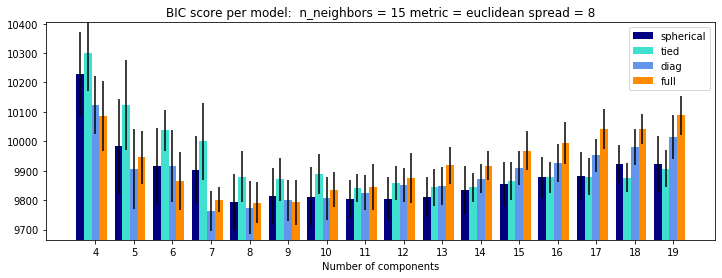

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


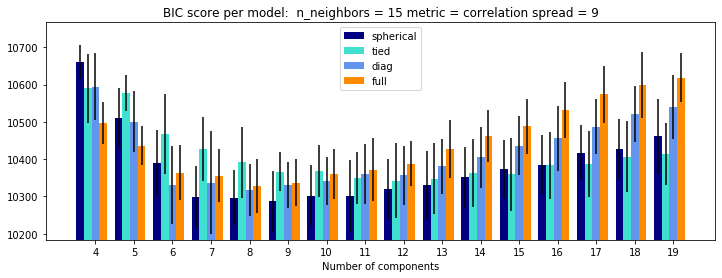

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


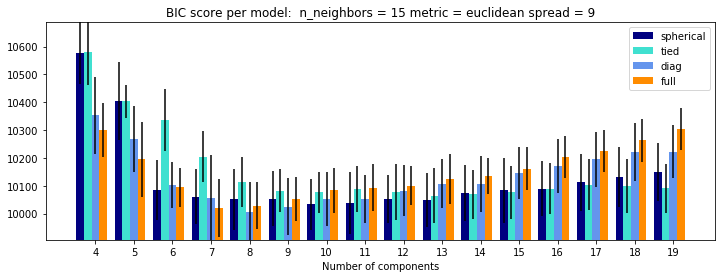

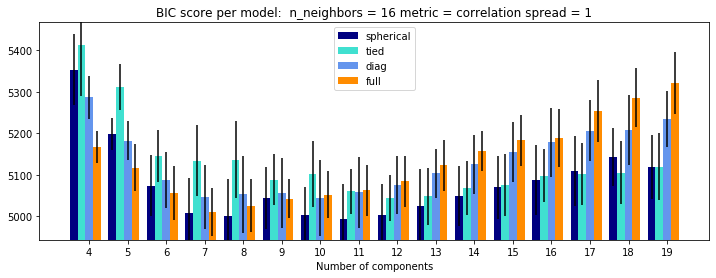

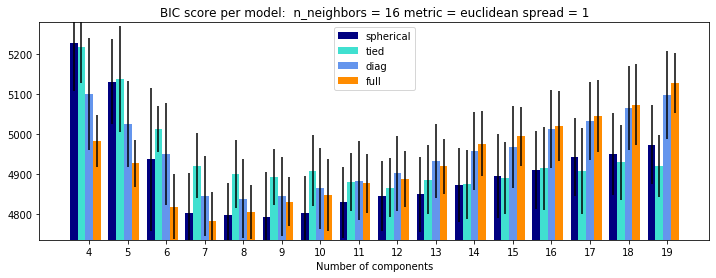

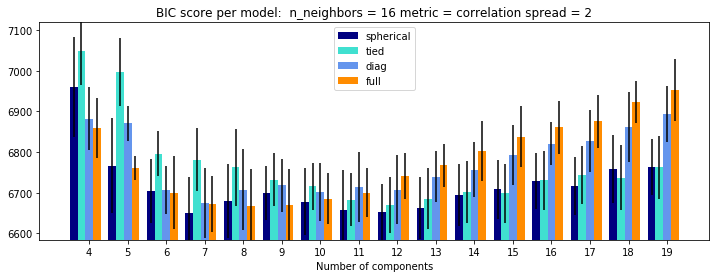

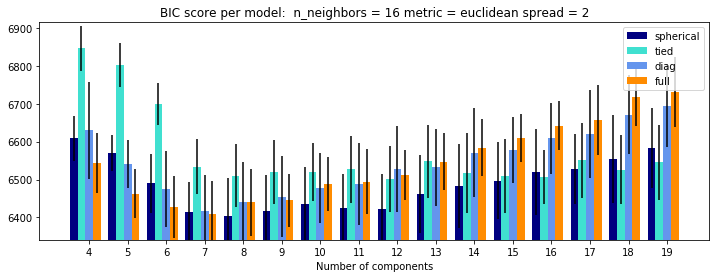

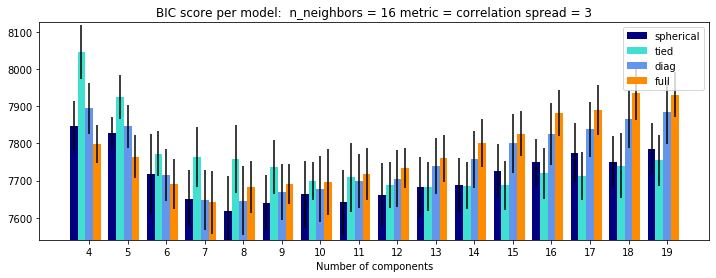

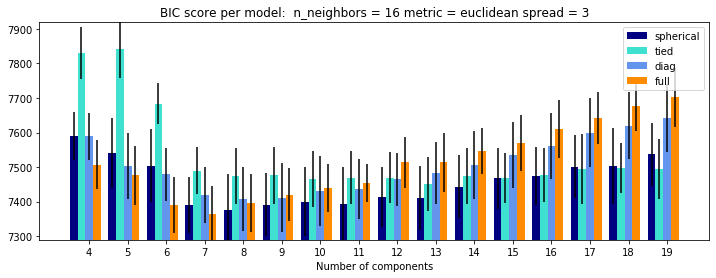

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


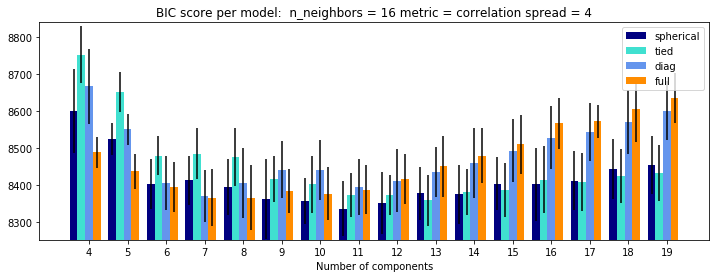

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


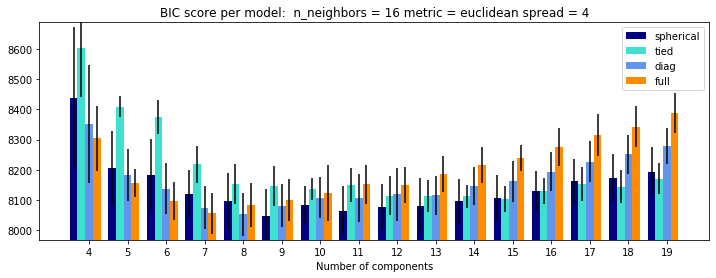

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


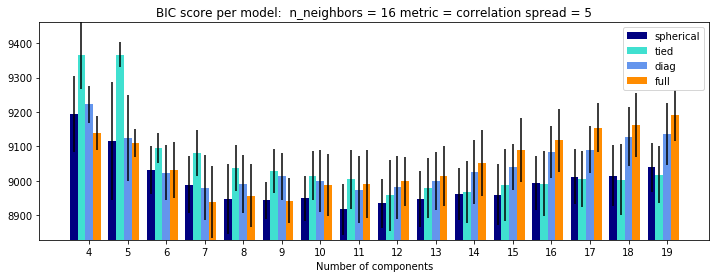

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


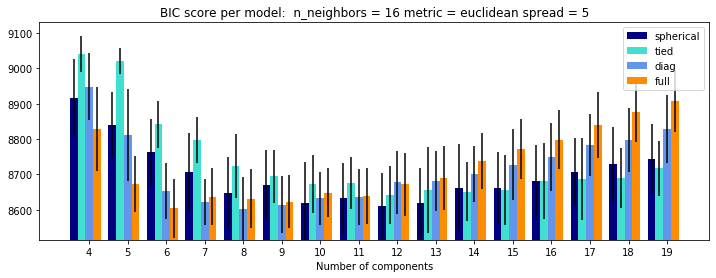

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


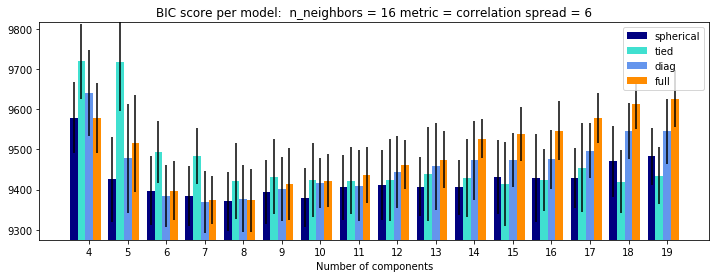

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


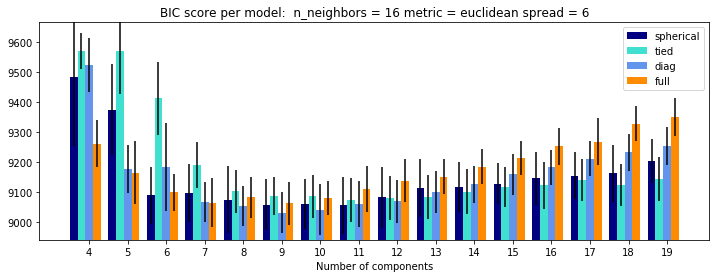

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


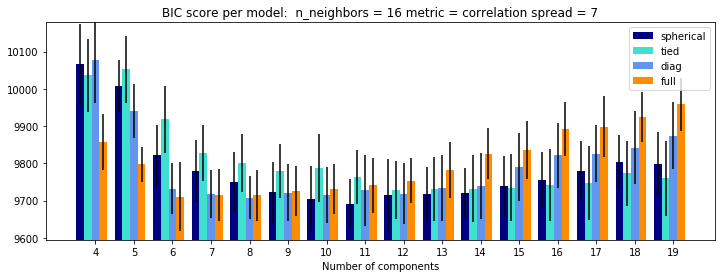

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


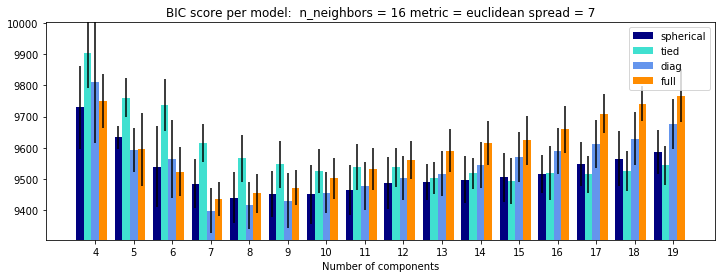

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


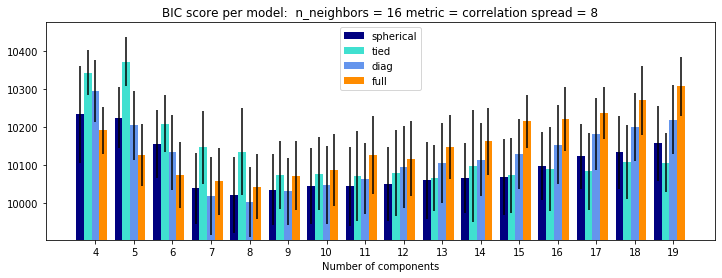

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


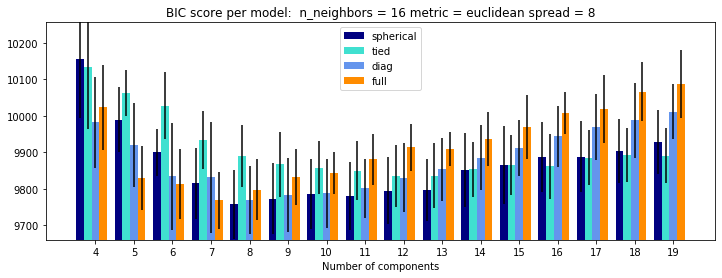

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


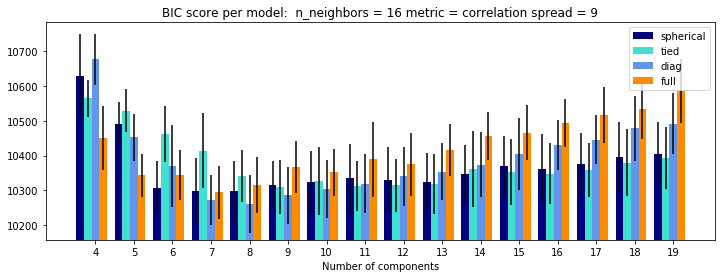

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


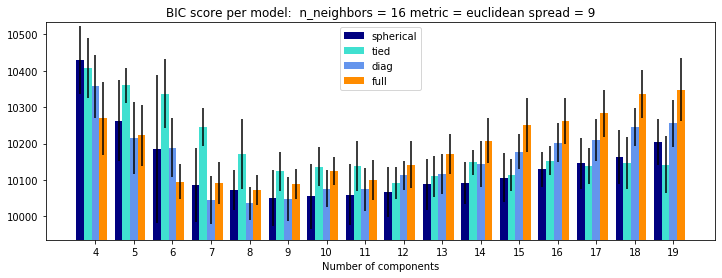

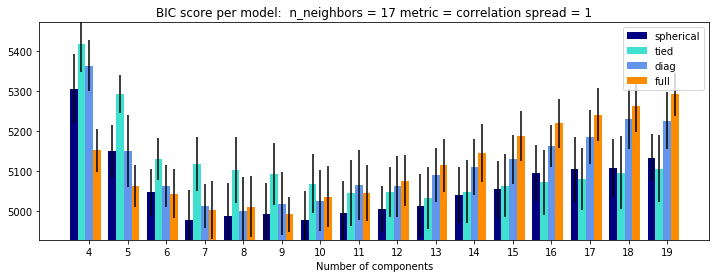

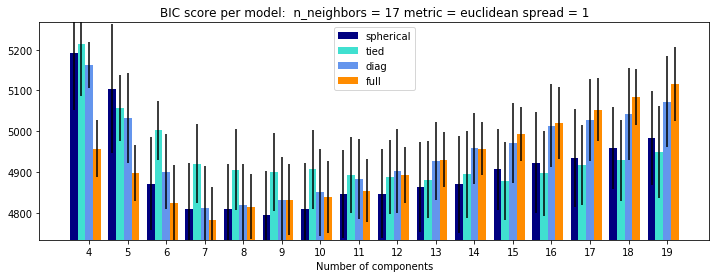

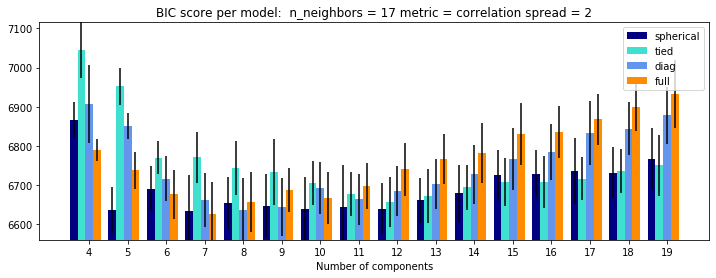

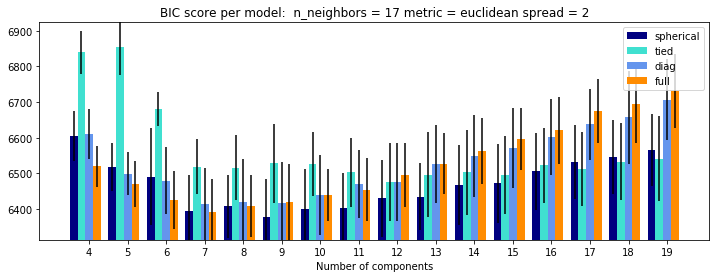

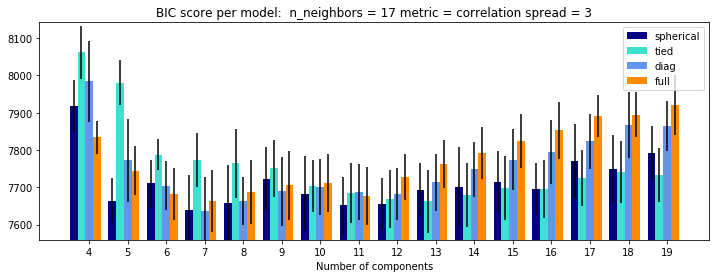

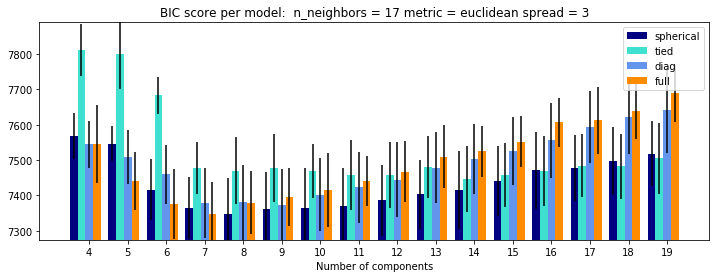

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


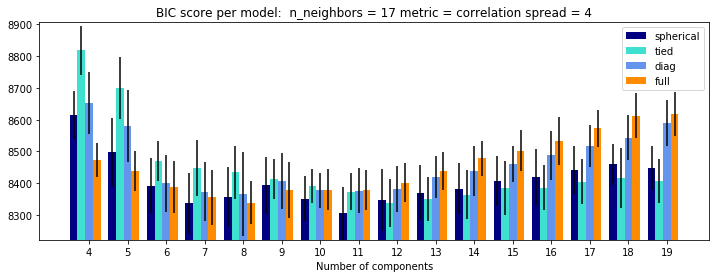

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


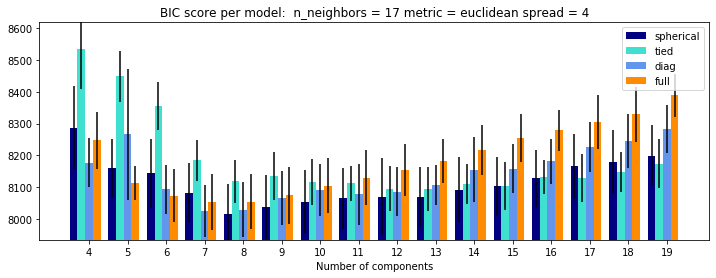

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


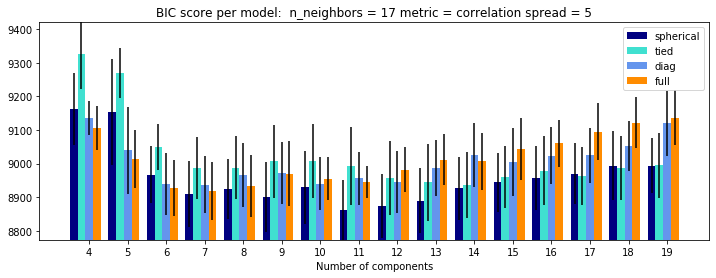

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


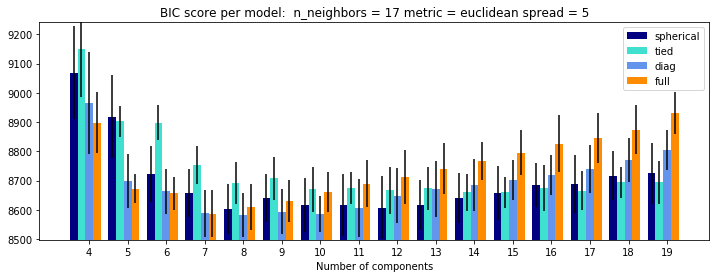

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


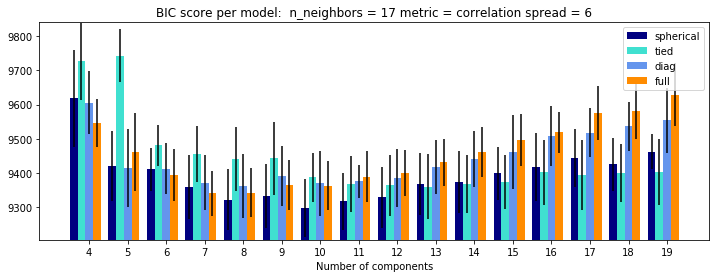

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


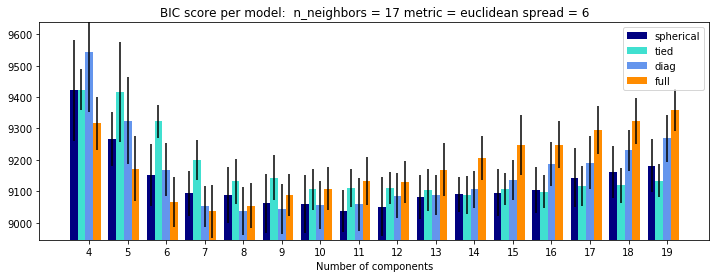

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


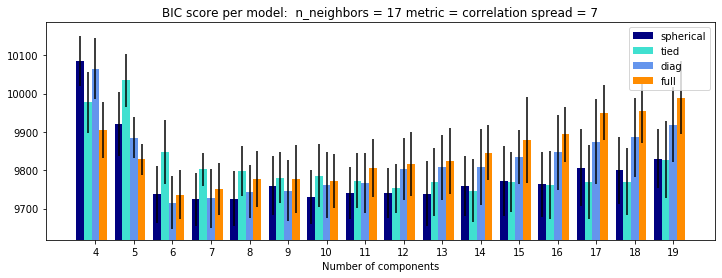

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


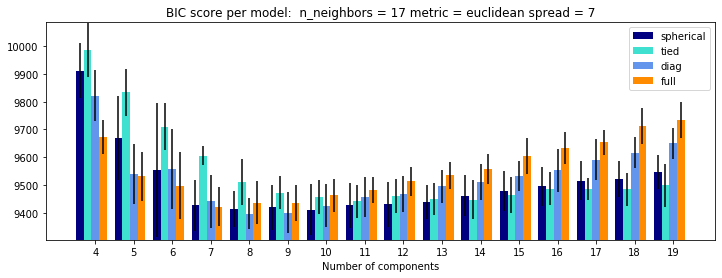

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


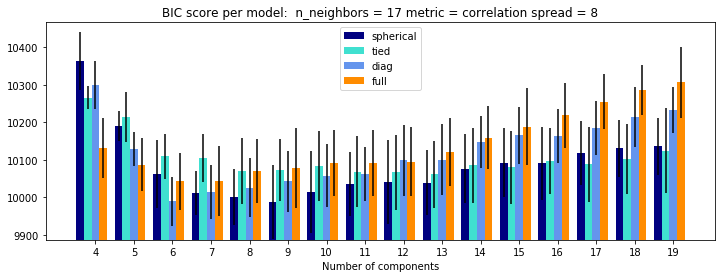

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


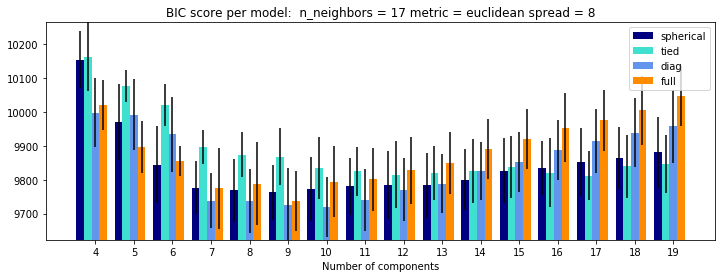

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


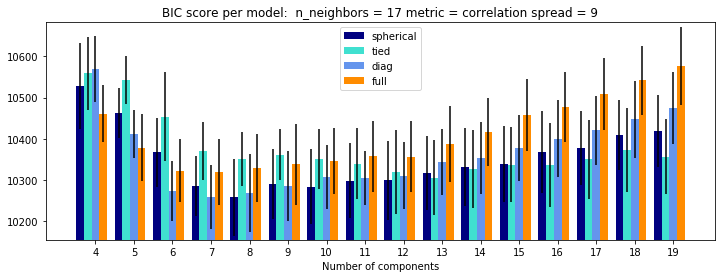

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


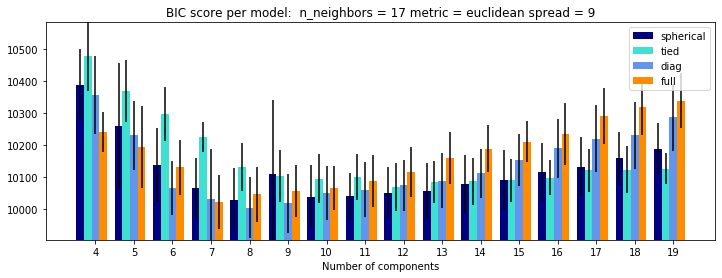

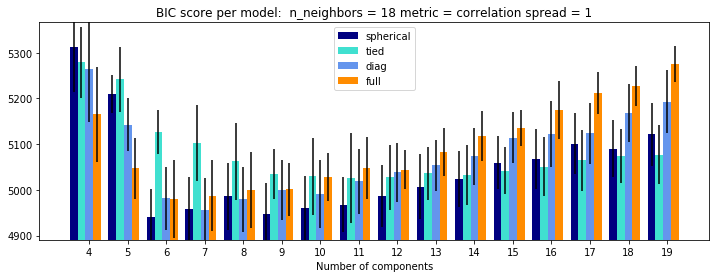

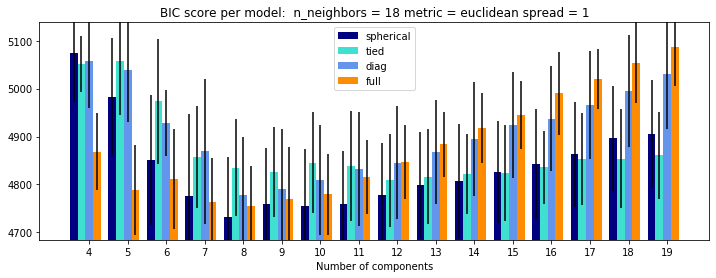

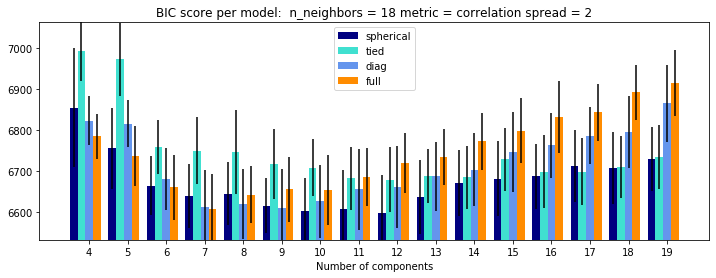

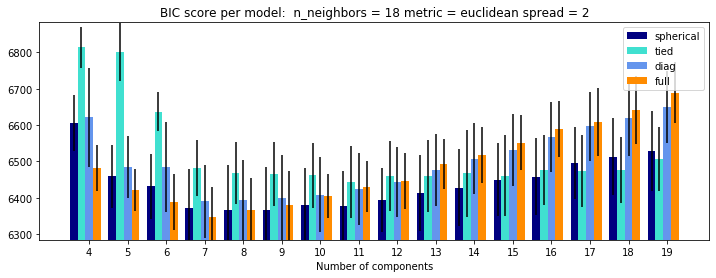

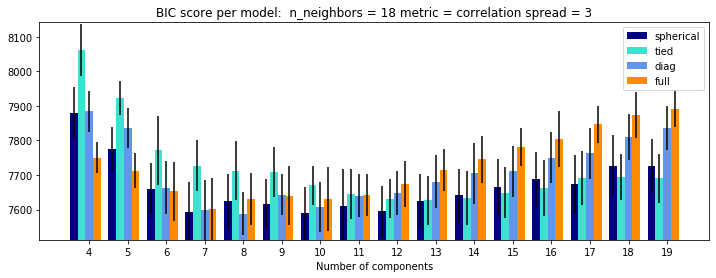

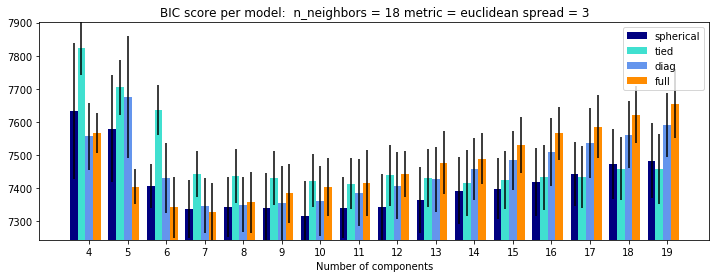

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


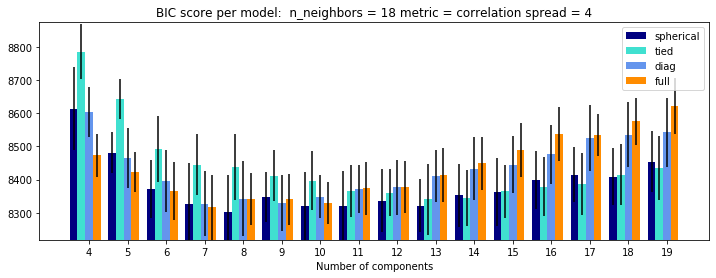

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


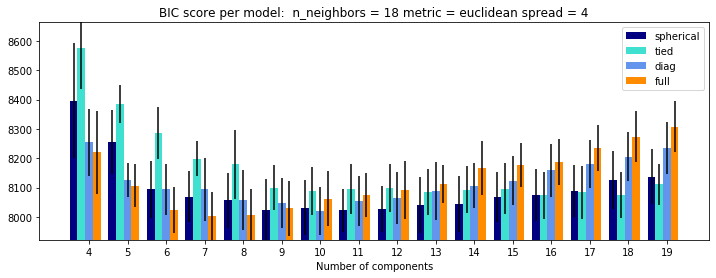

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


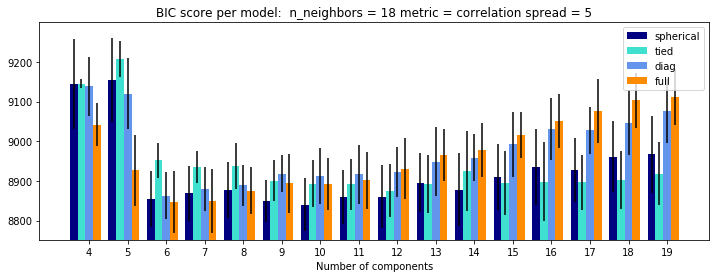

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


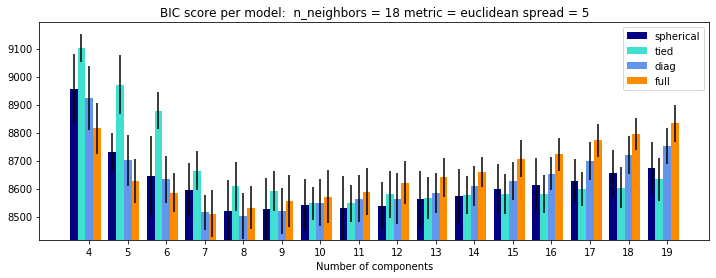

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


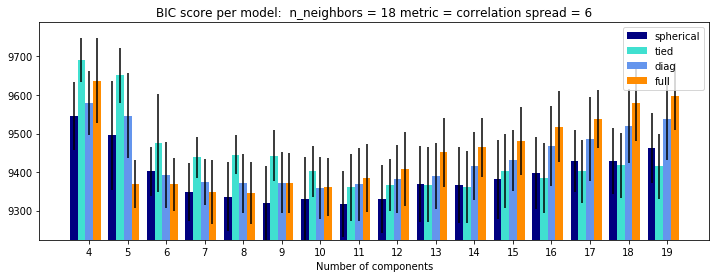

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


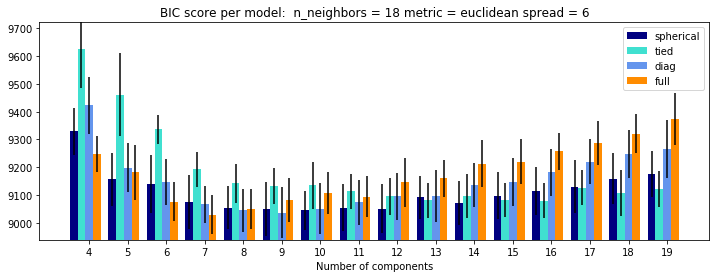

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


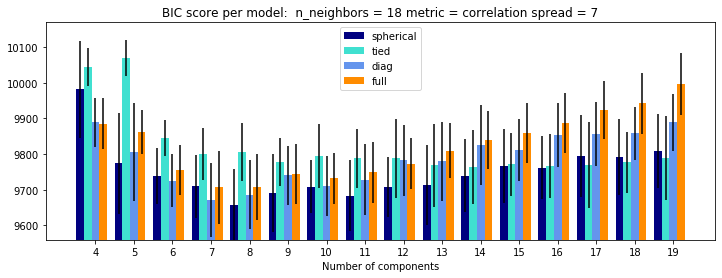

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


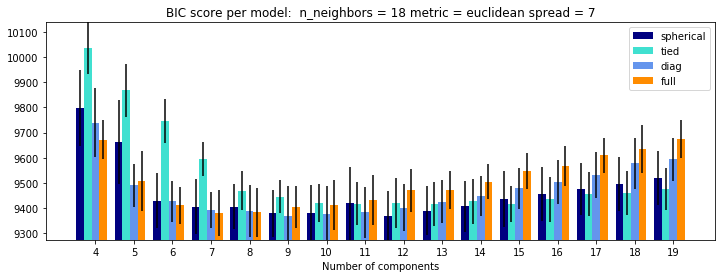

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


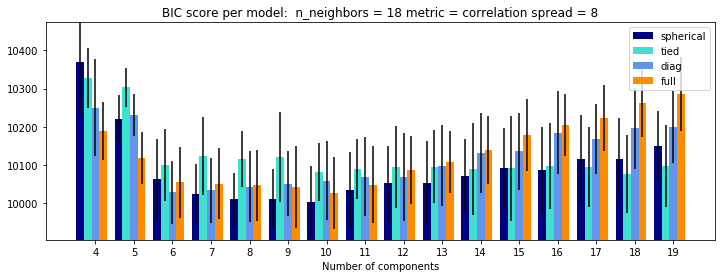

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


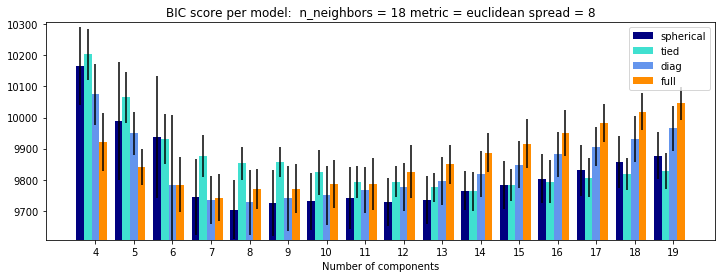

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


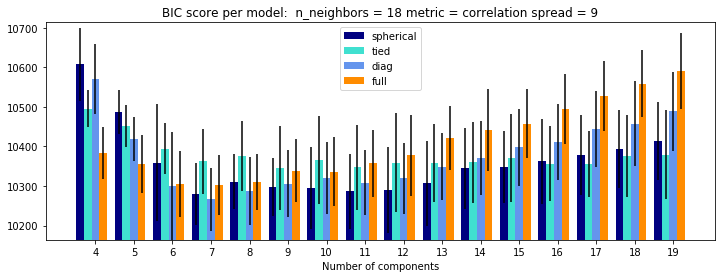

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


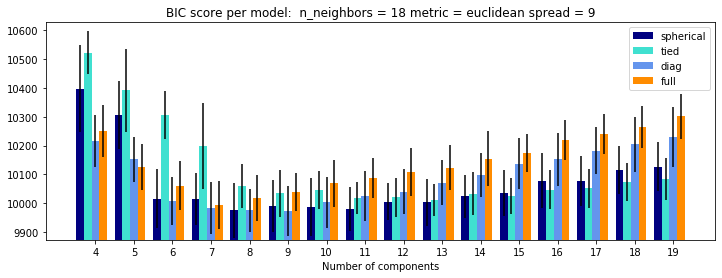

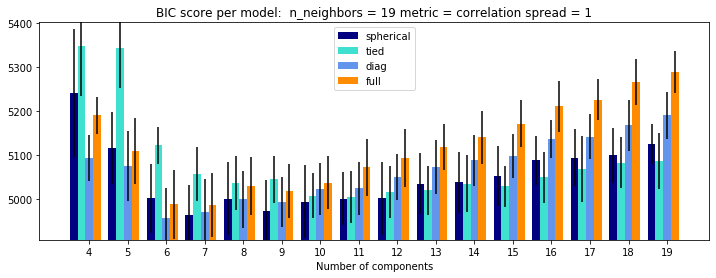

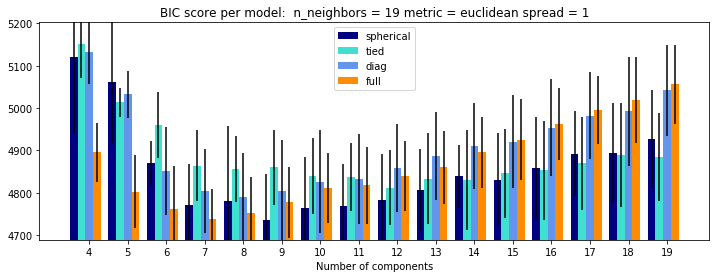

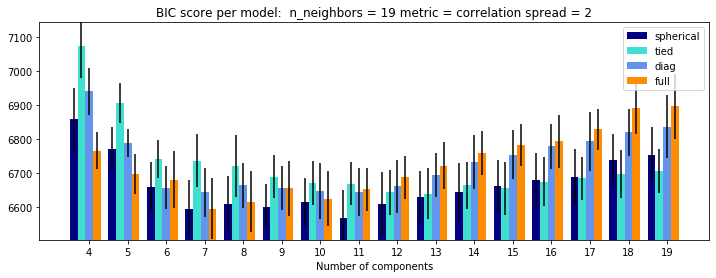

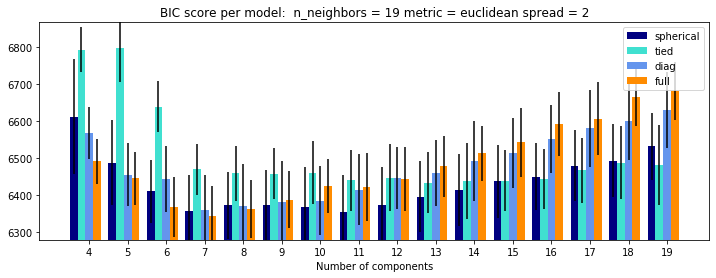

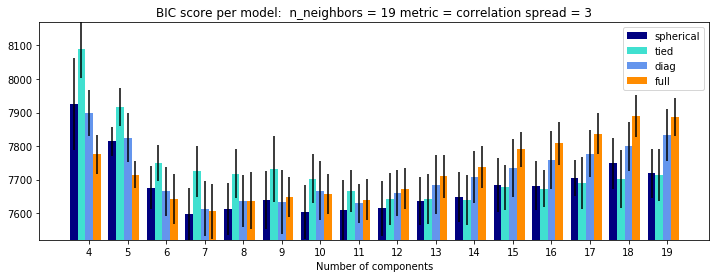

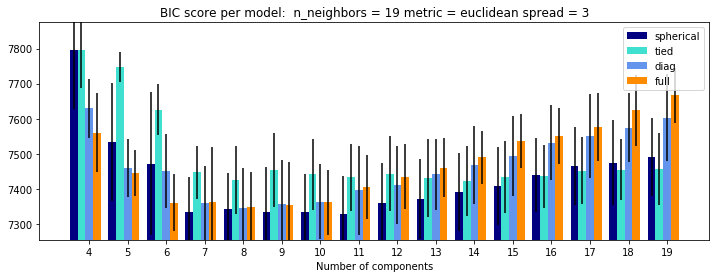

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


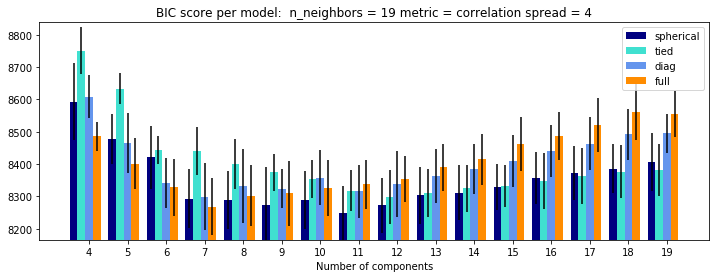

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


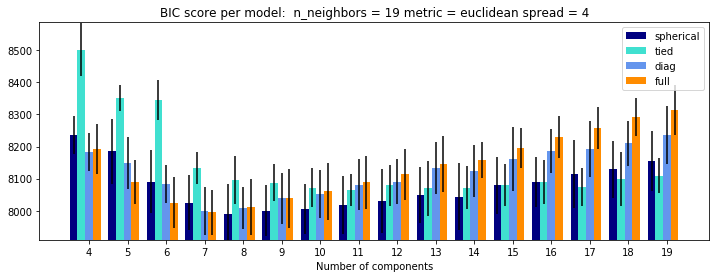

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


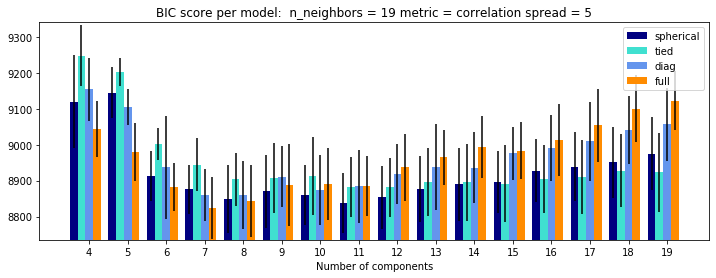

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


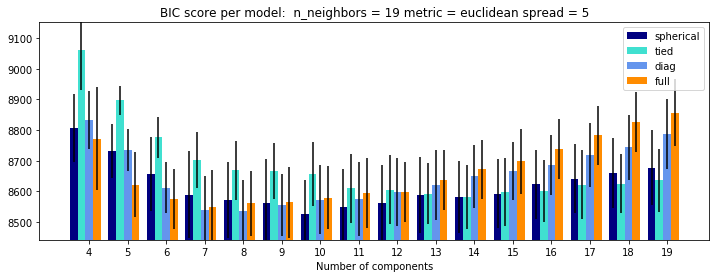

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


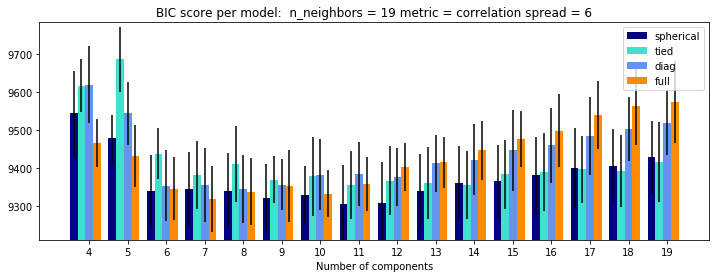

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


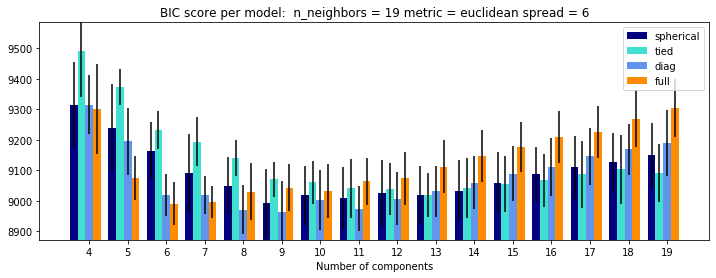

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


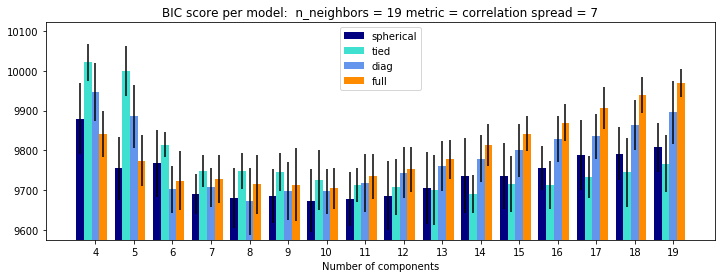

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


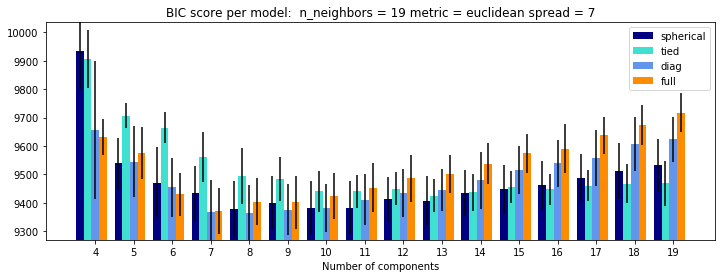

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


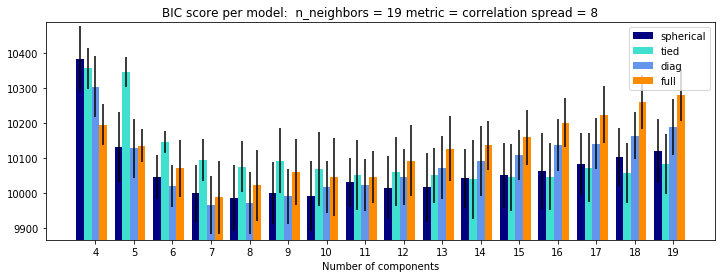

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


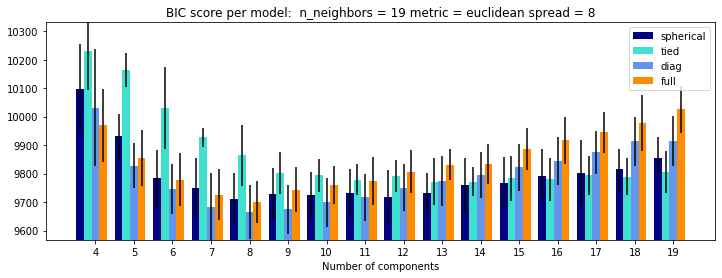

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


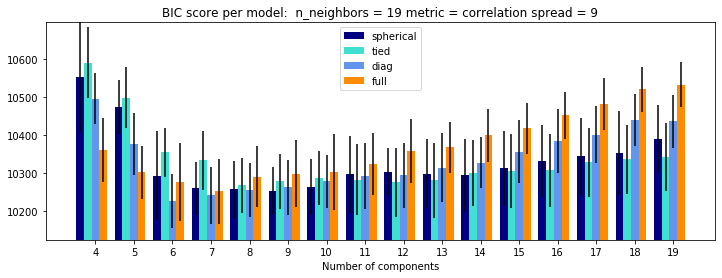

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


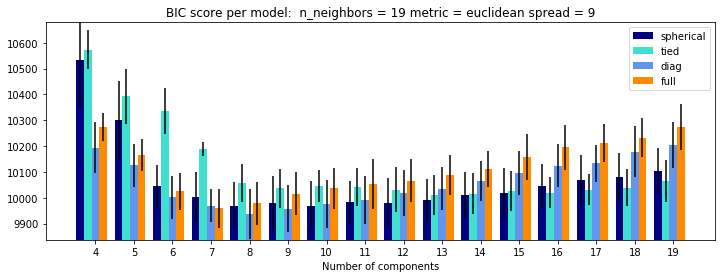

In [156]:
%matplotlib inline
df_umap = df.loc[:, list(range(225))].values
best_clust = []
best_type = []
umap_neigh = []
spreads = []
bic_list = []

for neigh in list(range(2,20)):
    for sp in range(1,5):

        embedding = umap.UMAP(spread= sp, n_neighbors = neigh, n_components = 2).fit_transform(df_umap)
        df['umap-1'] = embedding[:,0]
        df['umap-2'] = embedding[:,1]
        X = df[['umap-1', 'umap-2']]
        kf = KFold(5)
        bic_array = []
        lowest_bic = np.infty
        for train_index, test_index in kf.split(X):
            X_train = X.iloc[train_index]
            X_test = X.iloc[test_index]

            bic = []
            n_components_range = range(4, 20)
            cv_types = ['spherical', 'tied', 'diag', 'full']
            for cv_type in cv_types:
                for n_components in n_components_range:
                    # Fit a Gaussian mixture with EM
                    gmm = mixture.GaussianMixture(n_components=n_components,
                                                  covariance_type=cv_type)
                    gmm.fit(X_train)
                    bic.append(gmm.bic(X_test))
                    if bic[-1] < lowest_bic:
                        lowest_bic = bic[-1]
                        best_gmm = gmm
                        best_cv = cv_type


            bic_array.append(bic)
        bic = np.average(bic_array, axis =0)
        color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                      'darkorange'])
        clf = best_gmm
        bars = []

        # Plot the BIC scores
        plt.figure(figsize=(12, 4))
        std_bars = np.std(bic_array, axis = 0)
        start = 0
        spl = plt.subplot(1, 1, 1)
        for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
            end = ((i+1)*len(n_components_range))
            xpos = np.array(n_components_range) + .2 * (i - 2)
            bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                          (i + 1) * len(n_components_range)],
                                width=.2, color=color, yerr = std_bars[start:end]))
            start = end
        plt.xticks(n_components_range)
        plt.ylim([bic.min() * 0.99, bic.max() *1.01])
        plt.title('BIC score per model: '+' n_neighbors = '+str(neigh)+' spread = ' + str(sp))
        xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
            .2 * np.floor(bic.argmin() / len(n_components_range))
        #plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
        spl.set_xlabel('Number of components')
        spl.legend([b[0] for b in bars], cv_types)
        #plt.savefig('GMM_BIC_scores.svg', format='svg', dpi=330)
        best_clust.append(best_gmm.n_components)
        best_type.append(best_gmm.covariance_type)
        umap_neigh.append(neigh)
        spreads.append(sp)
        bic_list.append(np.min(bic))
        plt.show()

In [24]:
df = pd.read_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\performance_metrics\normalized_allfour_final.pkl")

# 3D BIC Scoring

In [5]:
%matplotlib inline
df_umap = df.loc[:, list(range(225))].values
best_clust = []
best_type = []
umap_neigh = []
spreads = []

bic_list = []

for neigh in list(range(2,20)):
    for sp in range(1,10):
        embedding = umap.UMAP(spread= sp, n_neighbors = neigh, n_components = 3).fit_transform(df_umap)
        df['umap-1'] = embedding[:,0]
        df['umap-2'] = embedding[:,1]
        df['umap-3'] = embedding[:,2]
        X = df[['umap-1', 'umap-2', 'umap-3']]
        kf = KFold(5)
        bic_array = []
        lowest_bic = np.infty
        bic = []
        n_components_range = range(2, 20)
        cv_types = ['spherical', 'tied', 'diag', 'full']
        for cv_type in cv_types:
            for n_components in n_components_range:
                # Fit a Gaussian mixture with EM
                bic_temp = []
                for train_index, test_index in kf.split(X):
                    X_train = X.iloc[train_index]
                    X_test = X.iloc[test_index]
                    # Fit a Gaussian mixture with EM
                    gmm = mixture.GaussianMixture(n_components=n_components,
                                                  covariance_type=cv_type)
                    gmm.fit(X_train)
                    bic_temp.append(gmm.bic(X_test))
                bic.append(np.average(bic_temp))
                bic_array.append(bic_temp)
                                    
                if bic[-1] < lowest_bic:
                    lowest_bic = bic[-1]
                    best_gmm = gmm
                    best_cv = cv_type

        #bic = np.average(bic_array, axis =1)
        color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                      'darkorange'])
        clf = best_gmm
        bars = []
        bic = np.array(bic)
        std_bars = np.std(bic_array, axis = 1)
        
        # Plot the BIC scores
#         plt.figure(figsize=(12, 4))
#         start = 0
#         spl = plt.subplot(1, 1, 1)
#         for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#             end = ((i+1)*len(n_components_range))
#             xpos = np.array(n_components_range) + .2 * (i - 2)
#             bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                           (i + 1) * len(n_components_range)],
#                                 width=.2, color=color, yerr = std_bars[start:end]))
#             start = end
#         plt.xticks(n_components_range)
#         plt.ylim([bic.min() * 0.99, bic.max() *1.01])
#         plt.title('BIC score per model: '+' n_neighbors = '+str(neigh)+' spread = ' + str(sp))
#         xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#             .2 * np.floor(bic.argmin() / len(n_components_range))
#         #plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
#         spl.set_xlabel('Number of components')
#         spl.legend([b[0] for b in bars], cv_types)
#         #plt.savefig('GMM_BIC_scores.svg', format='svg', dpi=330)
#         plt.show()
        best_clust.append(best_gmm.n_components)
        best_type.append(best_gmm.covariance_type)
        umap_neigh.append(neigh)
        spreads.append(sp)
        bic_list.append(np.min(bic))
        

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 173 separate connected components using meta-embedding (experimental)
  n_components
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 173 separate connected components using meta-embedding (experimental)
  n_components
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 173 separate connected components using meta-embedding (experimental)
  n_components
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\umap_.py:1052: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 173 separate c

In [ ]:
# Calculate best iterations

In [6]:
df_grid = pd.DataFrame([best_clust, best_type, umap_neigh, spreads]).T
df_grid.columns = ['n_best_cluster', 'best_gmm_type', 'umap_neighbor_config', 'umap_spread_config']

In [7]:
df_grid.to_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\cluster_iteration_data_all_data.pkl")

In [58]:
df_grid=pd.read_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\cluster_iteration_data_all_data.pkl")

In [8]:
df_grid

n_best_cluster best_gmm_type umap_neighbor_config umap_spread_config
0               18          full                    2                  1
1               18          full                    2                  2
2               18     spherical                    2                  3
3               14          diag                    2                  4
4                6          diag                    2                  5
..             ...           ...                  ...                ...
157              6          full                   19                  5
158              6          full                   19                  6
159              7          full                   19                  7
160              7          full                   19                  8
161              7          full                   19                  9

[162 rows x 4 columns]

In [37]:
#df_grid = pd.read_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\cluster_iteration_data_vb1b.pkl")

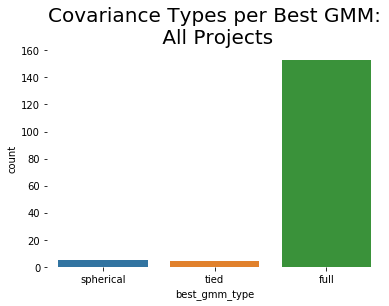

In [59]:
sns.countplot(df_grid['best_gmm_type'])
plt.title('Covariance Types per Best GMM:\n All Projects', fontsize = 20)
sns.despine(left=True, bottom=True, right=True)
plt.show()

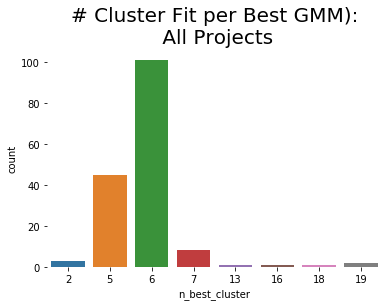

In [60]:
sns.countplot(df_grid['n_best_cluster'])
plt.title('# Cluster Fit per Best GMM):\n All Projects', fontsize = 20)
sns.despine(left=True, bottom=True, right=True)
plt.show()

In [22]:
df_grid2 = df_grid[df_grid['best_gmm_type']=='full']

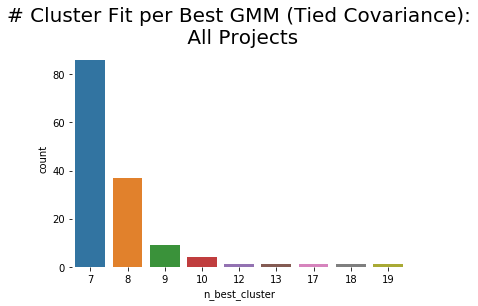

In [23]:
sns.countplot(data = df_grid2, x = 'n_best_cluster')
plt.title('# Cluster Fit per Best GMM (Tied Covariance):\n All Projects', fontsize = 20)
sns.despine(left=True, bottom=True, right=True)
plt.show()

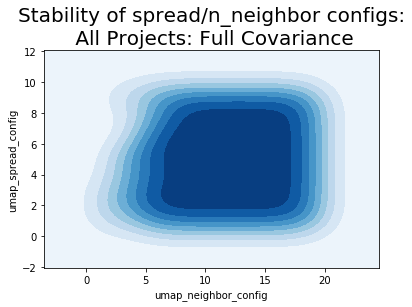

In [25]:
sns.kdeplot(df_grid2['umap_neighbor_config'], df_grid2['umap_spread_config'], cmap = "Blues", shade = True)
plt.title('Stability of spread/n_neighbor configs:\n All Projects: Full Covariance', fontsize = 20)
plt.show()

In [64]:
import seaborn as sns

In [71]:
df_grid.n_best_cluster.unique()

array([6, 2, 3, 4, 7], dtype=object)

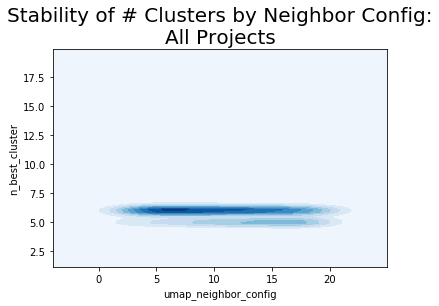

In [61]:
sns.kdeplot(df_grid['umap_neighbor_config'], df_grid['n_best_cluster'], cmap = "Blues", shade = True)
plt.title('Stability of # Clusters by Neighbor Config:\nAll Projects', fontsize = 20)
plt.show()

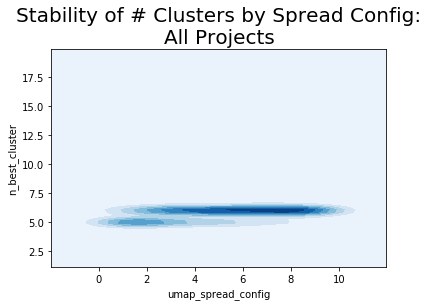

In [62]:
sns.kdeplot(df_grid['umap_spread_config'], df_grid['n_best_cluster'], cmap = "Blues", shade = True)
plt.title('Heatmap of Best GMMs using Correlation Covariance')
plt.title('Stability of # Clusters by Spread Config:\nAll Projects', fontsize = 20)
plt.show()

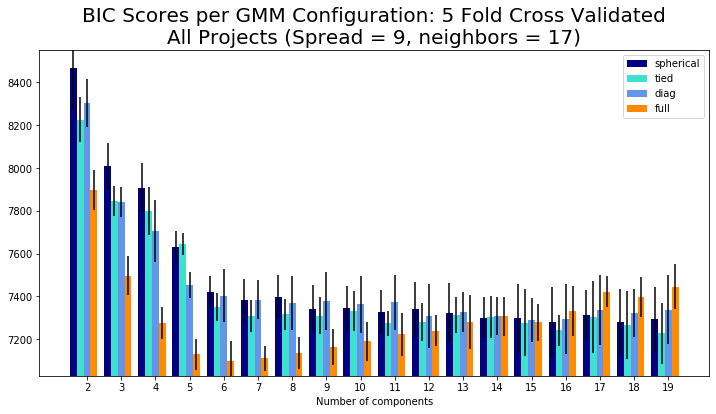

In [70]:
%matplotlib inline
df_umap = df.loc[:, list(range(225))].values
bic_list = []


embedding = umap.UMAP(spread= 2, n_neighbors = 7, n_components = 3, n_epochs = 500).fit_transform(df_umap)
df['umap-1'] = embedding[:,0]
df['umap-2'] = embedding[:,1]
df['umap-3'] = embedding[:,2]
X = df[['umap-1', 'umap-2', 'umap-3']]
kf = KFold(5)
bic_array = []
lowest_bic = np.infty


bic = []
n_components_range = range(2, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        bic_temp =[]
        for train_index, test_index in kf.split(X):
            X_train = X.iloc[train_index]
            X_test = X.iloc[test_index]
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X_train)
            bic_temp.append(gmm.bic(X_test))
        bic.append(np.average(bic_temp))

        bic_array.append(bic_temp)
bic = np.average(bic_array, axis =1)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])

bars = []
std_bars = np.std(bic_array, axis = 1)
start = 0
# Plot the BIC scores
plt.figure(figsize=(12, 6))
spl = plt.subplot(1, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    end = ((i+1)*len(n_components_range))
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color, yerr = std_bars[start:end]))
    start = end
plt.xticks(n_components_range)
plt.ylim([bic.min() * 0.99, bic.max()*1.01])
#plt.title('BIC score per model: '+' n_neighbors = '+str(neigh)+' metric = '+str(met)+' spread = ' + str(sp))
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
#plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)
#plt.savefig('GMM_BIC_scores.svg', format='svg', dpi=330)

plt.title('BIC Scores per GMM Configuration: 5 Fold Cross Validated\nAll Projects (Spread = 9, neighbors = 17)', fontsize = 20)
plt.show()

In [103]:
len(std_bars)

72

In [105]:
bic

array([2613.46589805, 2655.12947914, 2635.70078335, 2677.95480871,
       2638.80028627])

In [68]:
np.shape(bic_array)

(10, 72)

In [71]:
bic

array([1536.89689023, 1548.20831042, 1547.76792717, 1505.67802312,
       1515.67773871, 1499.31512785, 1489.29753369, 1496.48676921,
       1509.51069667, 1525.14070419, 1536.40606384, 1555.44168681,
       1572.10695588, 1592.5623789 , 1614.97254432, 1640.04702121,
       1657.42167605, 1678.77562321, 1576.45519268, 1574.49685488,
       1537.63578578, 1469.6789444 , 1500.06236481, 1481.50248697,
       1481.5170215 , 1484.72393576, 1486.52106214, 1507.94997834,
       1513.23274146, 1527.32505084, 1544.42088008, 1558.21912038,
       1571.1461472 , 1595.69929748, 1608.14944108, 1624.21673402,
       1550.79913025, 1544.30112074, 1541.9669309 , 1540.42705282,
       1521.00405359, 1521.99327319, 1535.61223358, 1557.55285425,
       1572.72622301, 1591.1583546 , 1625.34628447, 1644.79803851,
       1676.93222366, 1704.66937708, 1740.67083127, 1762.98282048,
       1799.72655413, 1827.37475096, 1518.06524205, 1523.99869306,
       1505.49676412, 1497.95621319, 1522.47169346, 1549.96045

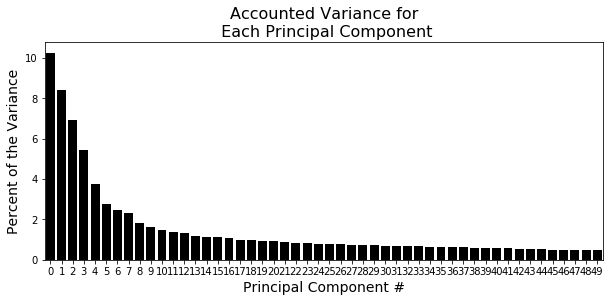

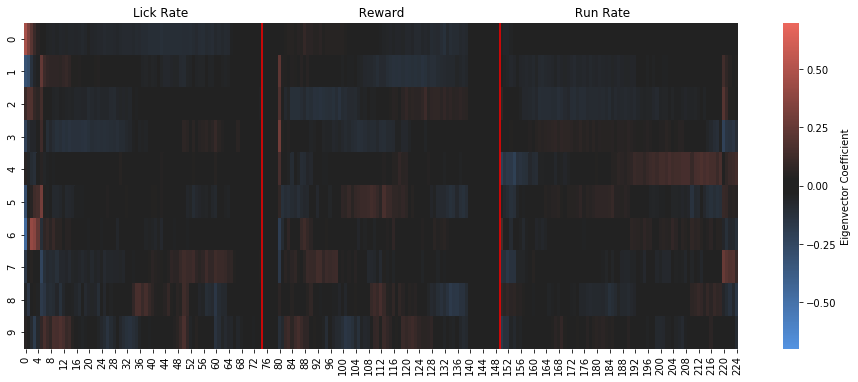

In [77]:
from sklearn.decomposition import PCA
%matplotlib inline
pca = PCA(n_components=225)
principalComponents=pca.fit_transform(df.loc[:,list(range(225))])
expv = pca.explained_variance_ratio_
val2= []
for val in expv:
    val = round(val, 4)
    val2.append(val*100)
plt.figure(figsize=(10,4))    
sns.barplot(np.arange(len(val2[:50])), val2[:50], color='black')
plt.xlabel('Principal Component #', fontsize = 14)
plt.ylabel('Percent of the Variance', fontsize = 14)
plt.title('Accounted Variance for\n Each Principal Component', fontsize = 16)
plt.savefig('percentvariance.png', format= 'png', dpi = 600)
plt.show()
plt.figure(figsize=(16,6))  
pal = sns.diverging_palette(250, 15, s=75, l=60, as_cmap = True, center="dark")
sns.heatmap(pca.components_[:10],
            cmap = pal, vmin = -0.7, vmax = 0.7,
            
           cbar_kws = {'label': 'Eigenvector Coefficient'})
plt.title('Lick Rate                                            Reward                                            Run Rate')
plt.axvline(x = 75, color = 'red')
plt.axvline(x = 150, color = 'red')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
#plt.tight_layout()
plt.show()

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap
from sklearn.model_selection import KFold
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [15]:
df = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200427_allprojects_clusters.pkl')

In [2]:
df = pd.read_pickle(r"C:\Users\sams\Documents\Independant Study\UMAP\working_data.pkl")

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


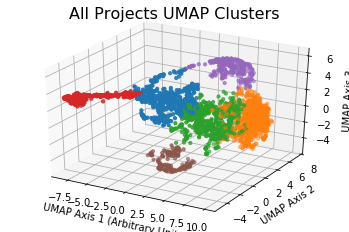

In [71]:
#%matplotlib notebook
%matplotlib inline
#df = df[df['project'] == 'VisualBehavior']
df_umap = df.loc[:, list(range(225))].values
embedding = umap.UMAP(spread= 2, n_neighbors =7 , n_components = 3).fit_transform(df_umap)
df['umap-1'] = embedding[:,0]
df['umap-2'] = embedding[:,1]
df['umap-3'] = embedding[:,2]
X = df[['umap-1', 'umap-2', 'umap-3']]
gmm = mixture.GaussianMixture(n_components=6,covariance_type='full')
gmm.fit(X)

labels = gmm.predict(X.values)

colors = list(plt.get_cmap('tab10').colors)
color_list = []
for n in labels:
    color_list.append(colors[n])
X['color'] = color_list
df['color'] = color_list
x =X['umap-1']
y =X['umap-2']
z =X['umap-3']

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(x, y, z, s=10, c=X['color'], marker='o')

#ax3D.w_xaxis.set_ticks(np.arange(-5, 15, 5))
#ax3D.w_xaxis.set_label('UMAP Axis 1 (Arbitrary Units)')
ax3D.set_xlabel('UMAP Axis 1 (Arbitrary Units)')
ax3D.set_ylabel('UMAP Axis 2')
ax3D.set_zlabel('UMAP Axis 3 ')


plt.title('All Projects UMAP Clusters', fontsize = 16)



plt.show()

In [50]:
df.to_pickle(r'C:\Users\sams\Documents\Independant Study\UMAP\working_data.pkl')

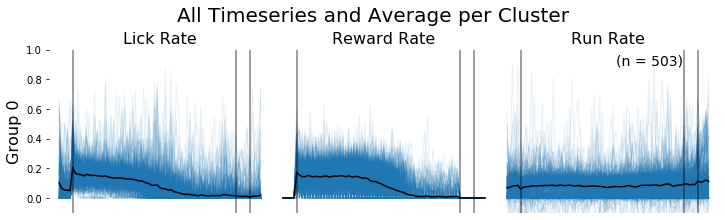

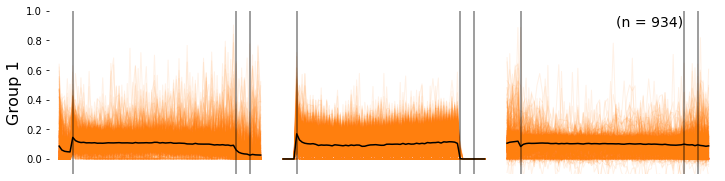

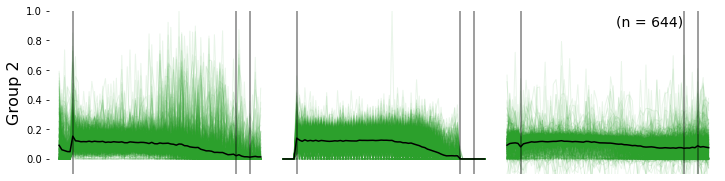

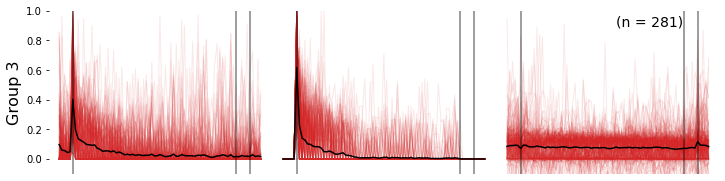

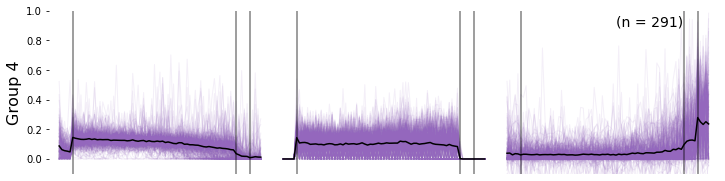

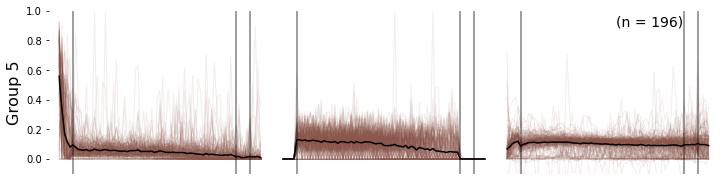

IndexError: index 0 is out of bounds for axis 0 with size 0

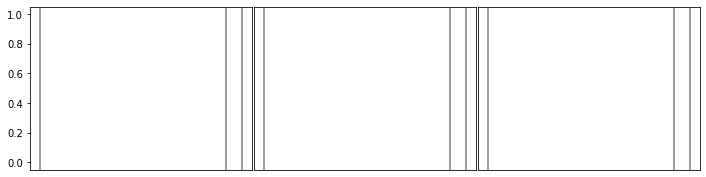

In [72]:
%matplotlib inline
df['cluster'] = labels
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]
df_4 = df[df['cluster']==3]
df_5 = df[df['cluster']==4]
df_6 = df[df['cluster']==5]
df_7 = df[df['cluster']==6]
df_8 = df[df['cluster']==7]
df_9 = df[df['cluster']==8]
df_10 = df[df['cluster']==9]
df_11 = df[df['cluster']==10]
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
for m, data in enumerate(df_list):
    
    lick = data.loc[:,list(range(75))].reset_index(drop = True)
    
    reward = data.loc[:,list(range(75,150))].reset_index(drop = True)
    reward.columns = range(75)
    
    run = data.loc[:,list(range(150,225))].reset_index(drop = True)
    run.columns = range(75)
    
    fig,ax=plt.subplots(1,3,figsize=(12,3), sharey = True)
    ax[0].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    ax[2].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[2].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    if m ==8:
        ax[0].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[2].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].set_xlabel('Time (Minutes)', fontsize =16)
    plt.subplots_adjust(wspace = 0.01)
    for n in range(len(lick)):
        ax[0].plot(lick.iloc[n], c = colors[m], lw = 1, alpha = 0.1)
        ax[1].plot(reward.iloc[n], c = colors[m], lw = 1, alpha = 0.1)
        ax[2].plot(run.iloc[n], c = colors[m], lw = 1, alpha = 0.1)
    ax[0].axvline(5, color = 'black', alpha = 0.5)
    ax[0].axvline(65, color = 'black', alpha = 0.5)
    ax[0].axvline(70, color = 'black', alpha = 0.5)
    ax[1].axvline(5, color = 'black', alpha = 0.5)
    ax[1].axvline(65, color = 'black', alpha = 0.5)
    ax[1].axvline(70, color = 'black', alpha = 0.5)
    ax[2].axvline(5, color = 'black', alpha = 0.5)
    ax[2].axvline(65, color = 'black', alpha = 0.5)
    ax[2].axvline(70, color = 'black', alpha = 0.5)
        
    ax[0].plot(lick.mean(), c = 'black', label = 'Average')
    #ax[0].plot(np.std(lick), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[0].set_title('Lick Rate')
    ax[0].set_ylabel('Group '+str(data.cluster.unique()[0]), fontsize = 16)
    #ax[0].legend()
    
    ax[1].plot(reward.mean(), c = 'black', label = 'Average')
    #ax[1].plot(np.std(reward), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[1].set_title('Run Rate')
    
    ax[2].plot(run.mean(), c = 'black', label = 'Average')
    #ax[2].set_title('Reward Rate')
    #ax[2].plot(np.std(run), c = 'blue', label = 'Stdv', lw = 0.75)
    #plt.suptitle('Group '+str(data.cluster.unique())+': n = '+str(len(lick)), y = 1.05, fontsize= 16)
    ax[0].set_ylim(-0.1, 1.0)
    ax[1].set_ylim(-0.1, 1.0)
    ax[2].set_ylim(-0.1,1.0)
    
    
    
    #fig.patch.set_visible(False)
    #ax[0].axis('off')
    sns.despine(left=True, bottom=True, right=True)
    ax[2].text(40, 0.9, '(n = '+str(len(lick))+")", fontsize=14)
    if m == 0:
        plt.suptitle('All Timeseries and Average per Cluster', y = 1.08, fontsize = 20)
        ax[0].set_title('Lick Rate', fontsize = 16)
        ax[1].set_title('Reward Rate', fontsize = 16)
        ax[2].set_title('Run Rate', fontsize = 16)
    #print(data['profile'].iloc[0])
    plt.show()

In [73]:
groups = ['Reward-Decrease-Early', 'Steady-Average-Rate', 'Reward-Decrease-Late', 'Early-Task-Performance', 'Post-Task-Running', 'Greyscreen-Licking']

In [74]:
clu = []
for n in df['cluster']:
    clu.append(groups[n])
df['profile'] = clu

In [85]:
df.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_allprojects_clusters.pkl')

In [33]:
df = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200427_allprojects_clusters.pkl')

In [75]:
c_ref = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\color_reference.pkl')

In [87]:
c_ref_2 = ['Reward-Decrease-Early', 'Reward-Decrease-Late', 'Early-Task-Performance', 'Steady-Average-Rate', 'Post-Task-Running', 'Early-Perform-Post-Running', 'Greyscreen-Licking', 'Increasing-Running', 'Non-Performing']

In [88]:
c_ref['profile2'] = c_ref_2

In [81]:
labels = df.profile.values
color_list = []
for n in labels:
    color_list.append(c_ref[c_ref['profile2']==n]['color'].iloc[0])
df['colors2'] = color_list

In [101]:
df_1bm = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\visbmulti2_clusters.pkl')
df_2b = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\visb4x2_clusters.pkl')
df_1b = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\visb1b_clusters.pkl')
df_1a = pd.read_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\visb2_clusters.pkl')

In [102]:
labels = df_1bm.profile.values
color_list = []
label_list = []
for n in labels:
    color_list.append(c_ref[c_ref['profile']==n]['color'].iloc[0])
    label_list.append(c_ref[c_ref['profile']==n]['profile2'].iloc[0])
df_1bm['color'] = color_list
df_1bm['profile'] = label_list

In [104]:
df_1bm.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_visbmulti2_clusters.pkl')

In [105]:
labels = df_2b.profile.values
color_list = []
label_list = []
for n in labels:
    color_list.append(c_ref[c_ref['profile']==n]['color'].iloc[0])
    label_list.append(c_ref[c_ref['profile']==n]['profile2'].iloc[0])
df_2b['color'] = color_list
df_2b['profile'] = label_list

In [112]:
df_2b = df_2b.drop(columns = ['colors2'])
df_2b.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_visb4x2_clusters.pkl')

In [113]:
labels = df_1b.profile.values
color_list = []
label_list = []
for n in labels:
    color_list.append(c_ref[c_ref['profile']==n]['color'].iloc[0])
    label_list.append(c_ref[c_ref['profile']==n]['profile2'].iloc[0])
df_1b['color'] = color_list
df_1b['profile'] = label_list

In [116]:
df_1b = df_1b.drop(columns = ['colors2'])
df_1b.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_visb1b_clusters.pkl')

In [117]:
labels = df_1a.profile.values
color_list = []
label_list = []
for n in labels:
    color_list.append(c_ref[c_ref['profile']==n]['color'].iloc[0])
    label_list.append(c_ref[c_ref['profile']==n]['profile2'].iloc[0])
df_1a['color'] = color_list
df_1a['profile'] = label_list

In [120]:
df_1a = df_1a.drop(columns = 'colors2')
df_1a.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_visb1a_clusters.pkl')

In [124]:
df = df.drop(columns = 'colors2')
df.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\umap_clusters\20200507_allprojects_clusters.pkl')

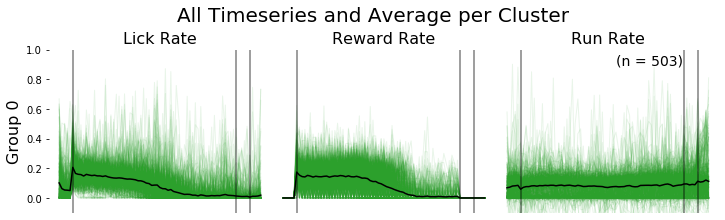

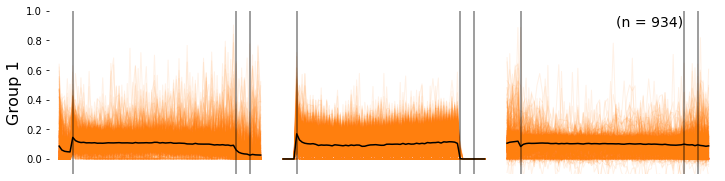

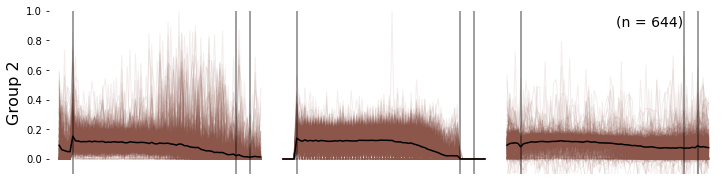

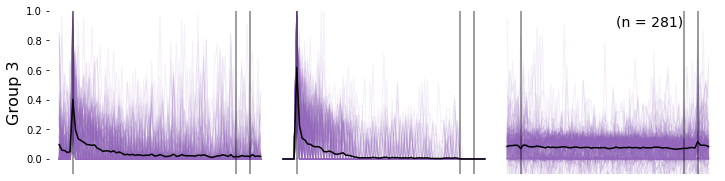

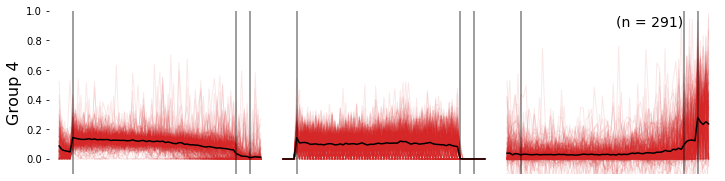

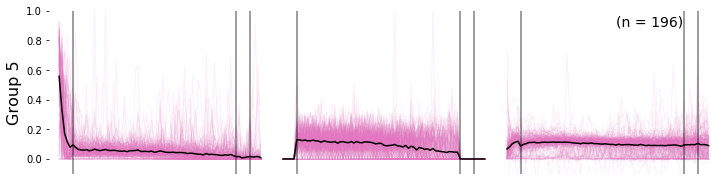

In [84]:
%matplotlib inline
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]
df_4 = df[df['cluster']==3]
df_5 = df[df['cluster']==4]
df_6 = df[df['cluster']==5]
df_7 = df[df['cluster']==6]
df_8 = df[df['cluster']==7]
df_9 = df[df['cluster']==8]
df_10 = df[df['cluster']==9]
df_11 = df[df['cluster']==10]
df_list = [df_1, df_2, df_3, df_4, df_5, df_6]
for m, data in enumerate(df_list):
    
    lick = data.loc[:,list(range(75))].reset_index(drop = True)
    
    reward = data.loc[:,list(range(75,150))].reset_index(drop = True)
    reward.columns = range(75)
    
    run = data.loc[:,list(range(150,225))].reset_index(drop = True)
    run.columns = range(75)
    
    fig,ax=plt.subplots(1,3,figsize=(12,3), sharey = True)
    ax[0].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    ax[2].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[2].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    if m ==8:
        ax[0].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[2].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].set_xlabel('Time (Minutes)', fontsize =16)
    plt.subplots_adjust(wspace = 0.01)
    for n in range(len(lick)):
        ax[0].plot(lick.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
        ax[1].plot(reward.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
        ax[2].plot(run.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
    ax[0].axvline(5, color = 'black', alpha = 0.5)
    ax[0].axvline(65, color = 'black', alpha = 0.5)
    ax[0].axvline(70, color = 'black', alpha = 0.5)
    ax[1].axvline(5, color = 'black', alpha = 0.5)
    ax[1].axvline(65, color = 'black', alpha = 0.5)
    ax[1].axvline(70, color = 'black', alpha = 0.5)
    ax[2].axvline(5, color = 'black', alpha = 0.5)
    ax[2].axvline(65, color = 'black', alpha = 0.5)
    ax[2].axvline(70, color = 'black', alpha = 0.5)
        
    ax[0].plot(lick.mean(), c = 'black', label = 'Average')
    #ax[0].plot(np.std(lick), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[0].set_title('Lick Rate')
    ax[0].set_ylabel('Group '+str(data.cluster.unique()[0]), fontsize = 16)
    #ax[0].legend()
    
    ax[1].plot(reward.mean(), c = 'black', label = 'Average')
    #ax[1].plot(np.std(reward), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[1].set_title('Run Rate')
    
    ax[2].plot(run.mean(), c = 'black', label = 'Average')
    #ax[2].set_title('Reward Rate')
    #ax[2].plot(np.std(run), c = 'blue', label = 'Stdv', lw = 0.75)
    #plt.suptitle('Group '+str(data.cluster.unique())+': n = '+str(len(lick)), y = 1.05, fontsize= 16)
    ax[0].set_ylim(-0.1, 1.0)
    ax[1].set_ylim(-0.1, 1.0)
    ax[2].set_ylim(-0.1,1.0)
    
    
    
    #fig.patch.set_visible(False)
    #ax[0].axis('off')
    sns.despine(left=True, bottom=True, right=True)
    ax[2].text(40, 0.9, '(n = '+str(len(lick))+")", fontsize=14)
    if m == 0:
        plt.suptitle('All Timeseries and Average per Cluster', y = 1.08, fontsize = 20)
        ax[0].set_title('Lick Rate', fontsize = 16)
        ax[1].set_title('Reward Rate', fontsize = 16)
        ax[2].set_title('Run Rate', fontsize = 16)
    #print(data['profile'].iloc[0])
    plt.show()

<IPython.core.display.Javascript object>


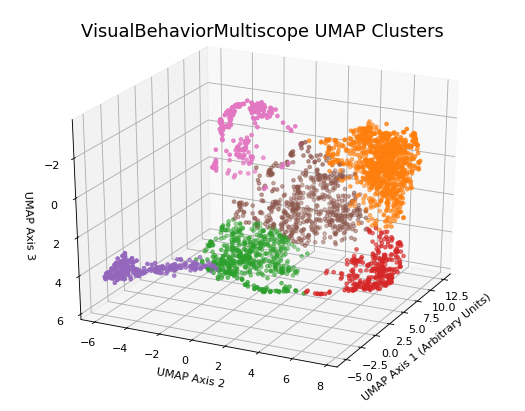

In [3]:
%matplotlib notebook
#%matplotlib inline
#df = df[df['project'] == 'VisualBehavior']
#df = df_1bm
x =df['umap-1']
y =df['umap-2']
z =df['umap-3']

fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.scatter(x, y, z, s=10, c=df['colors2'], marker='o')

#ax3D.w_xaxis.set_ticks(np.arange(-5, 15, 5))
#ax3D.w_xaxis.set_label('UMAP Axis 1 (Arbitrary Units)')
ax3D.set_xlabel('UMAP Axis 1 (Arbitrary Units)')
ax3D.set_ylabel('UMAP Axis 2')
ax3D.set_zlabel('UMAP Axis 3 ')


plt.title('VisualBehaviorMultiscope UMAP Clusters', fontsize = 16)

plt.tight_layout()

plt.show()

In [11]:
order = ['TRAINING_5',
        'OPHYS_0',
        'OPHYS_1',
        'OPHYS_3',
        'OPHYS_4',
        'OPHYS_6']

In [9]:
df_rate = []
for cluster in df['cluster'].unique():
    dfx = df[df['cluster']==cluster]
    for stage in order:
        dfy = dfx[dfx.stage.str.find(stage)==0]
        rate = len(dfy)/len(df[df.cluster==cluster])
        size = len(dfy)
        df_rate.append([cluster, stage, rate])
df_rate = pd.DataFrame(df_rate, columns = ['cluster', 'stage', 'rate'])
sample_size = []
for stage in order:
    dfy = df[df.stage.str.find(stage)==0]
    sample_size.append(len(dfy))

NameError: name 'order' is not defined

In [13]:
samp_stage = []
for n, stage in enumerate (order):
    samp_stage.append(stage+ " n="+str(sample_size[n]))

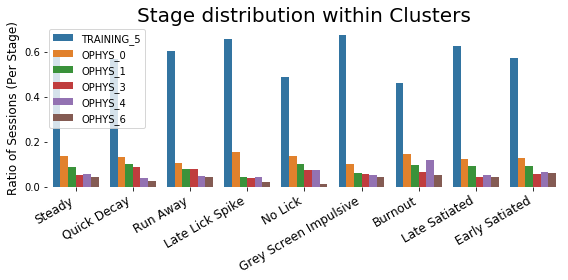

In [17]:

plt.figure(figsize = (8, 4))
sns.barplot(data = df_rate, y = 'rate', x = 'cluster', hue = 'stage', hue_order = order)
plt.legend(loc='upper left', borderaxespad=0.2)
plt.ylabel('Ratio of Sessions (Per Stage)', fontsize = 12)
plt.title('Stage distribution within Clusters', fontsize = 20)
plt.xlabel('', fontsize = 16)
plt.xticks(ticks = list(range(9)), labels= groups, rotation = 30, ha = 'right', fontsize = 12)
sns.despine(left=True, bottom=True, right=True)
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

#plt.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,verticalalignment='top', bbox=props)
plt.tight_layout()
plt.show()

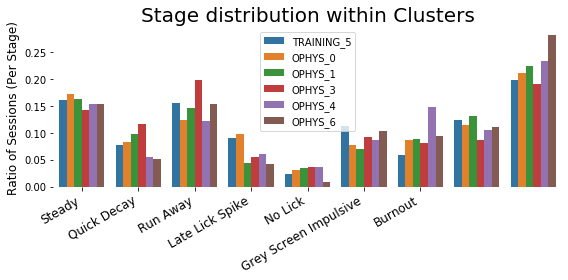

In [18]:
order = ['TRAINING_5',
        'OPHYS_0',
        'OPHYS_1',
        'OPHYS_3',
        'OPHYS_4',
        'OPHYS_6']
df_rate = []
for cluster in df['cluster'].unique():
    dfx = df[df['cluster']==cluster]
    for stage in order:
        dfy = dfx[dfx.stage.str.find(stage)==0]
        rate = len(dfy)/len(df[df.stage.str.find(stage)==0])
        size = len(dfy)
        df_rate.append([cluster, stage, rate])
df_rate = pd.DataFrame(df_rate, columns = ['cluster', 'stage', 'rate'])
sample_size = []
for stage in order:
    dfy = df[df.stage.str.find(stage)==0]
    sample_size.append(len(dfy))
samp_stage = []
for n, stage in enumerate (order):
    samp_stage.append(stage+ " n="+str(sample_size[n]))
plt.figure(figsize = (8, 4))
sns.barplot(data = df_rate, y = 'rate', x = 'cluster', hue = 'stage', hue_order = order)
plt.legend(loc='best')
plt.ylabel('Ratio of Sessions (Per Stage)', fontsize = 12)
plt.title('Stage distribution within Clusters', fontsize = 20)
plt.xlabel('', fontsize = 16)
plt.xticks(ticks = list(range(7)), labels= groups, rotation = 30, ha = 'right', fontsize = 12)
sns.despine(left=True, bottom=True, right=True)
plt.tight_layout()
plt.savefig('stage_distribution.png', format='png', dpi=330)

plt.show()

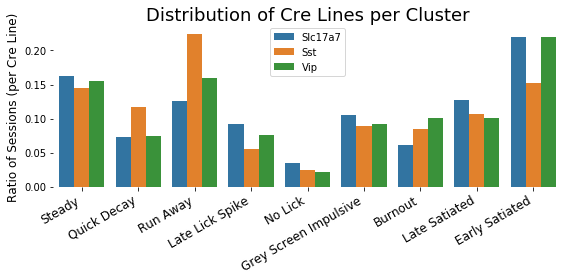

In [19]:
cre_order = ['Slc17a7', 'Sst', 'Vip']
df_rate2 = []
for cluster in df['cluster'].unique():
    dfx = df[df['cluster']==cluster]
    for stage in cre_order:
        dfy = dfx[dfx.cre_line.str.find(stage)==0]
        rate = len(dfy)/len(df[df.cre_line.str.find(stage)==0])
        df_rate2.append([cluster, stage, rate])
        
df_rate2 = pd.DataFrame(df_rate2, columns = ['cluster', 'cre_line', 'rate'])
#%matplotlib inline
plt.figure(figsize = (8, 4))
import seaborn as sns
sns.barplot(data = df_rate2, y = 'rate', x = 'cluster', hue = 'cre_line')
plt.legend(loc='best', borderaxespad=0.2)
plt.ylabel('Ratio of Sessions (per Cre Line)', fontsize = 12)
plt.title('Distribution of Cre Lines per Cluster', fontsize = 18)
plt.xlabel('')
plt.xticks(ticks = list(range(9)), labels= groups, rotation = 30, ha = 'right', fontsize = 12)
sns.despine(left=True, bottom=True, right=True)
plt.tight_layout()
plt.savefig('cre_distribution.png', format='png', dpi=330)
plt.show()

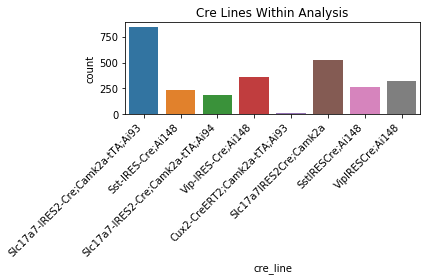

In [20]:
sns.countplot(df['cre_line'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Cre Lines Within Analysis')
plt.tight_layout()
plt.savefig('cre_count.png', format='png', dpi=330)
plt.show()

In [24]:
df_cluster = df[['cluster', 'behavior_id']]
clu = []
for n in df_cluster['cluster']:
    clu.append(groups[n])
df_cluster['profile'] = clu

c:\users\sams\appdata\local\continuum\miniconda3\envs\sfn_36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
df_cluster.to_pickle(r'\\allen\programs\braintv\workgroups\ophysdev\OPhysCore\operator_files\sam_seid\DataAnalysis\Output\20200413_sam_clusterlabels.pkl')

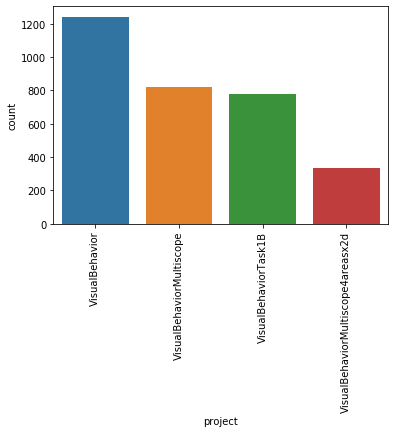

In [29]:
%matplotlib inline
sns.countplot(df['project'])
plt.xticks(rotation =90)
plt.show()

In [30]:
df['project'].value_counts()

VisualBehavior                       1242
VisualBehaviorMultiscope              822
VisualBehaviorTask1B                  776
VisualBehaviorMultiscope4areasx2d     331
Name: project, dtype: int64

In [31]:
len(df)

3171

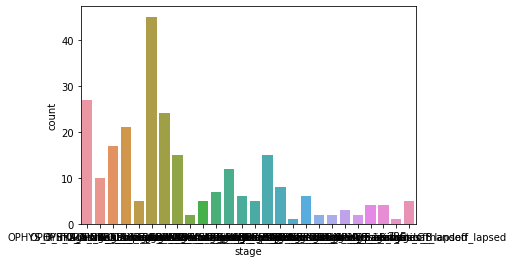

In [35]:
sns.countplot(df[df['profile'] == 'Non-Performing']['stage'])

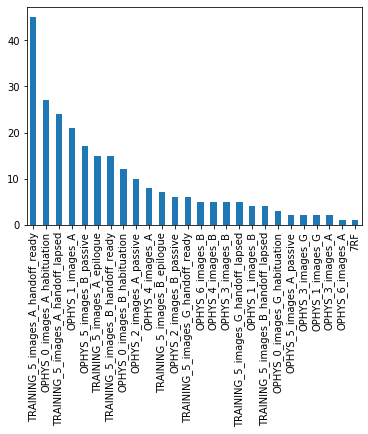

In [36]:
df[df['profile'] == 'Non-Performing']['stage'].value_counts().plot(kind="bar")

plt.show()

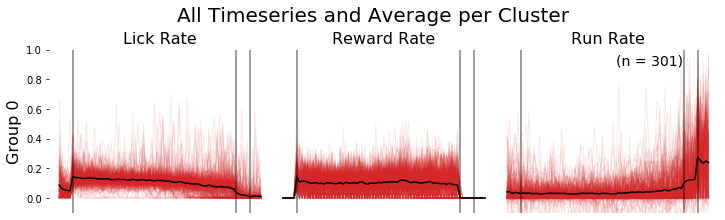

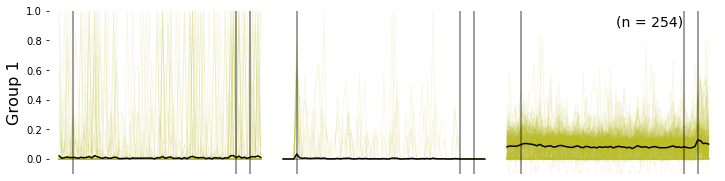

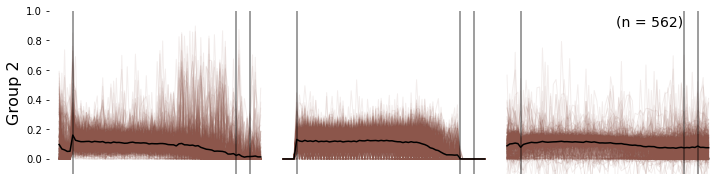

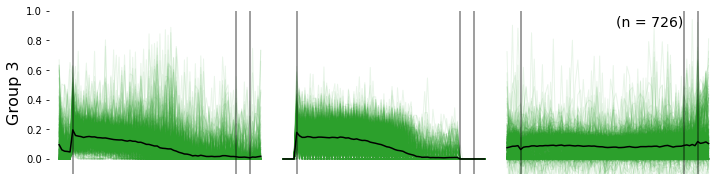

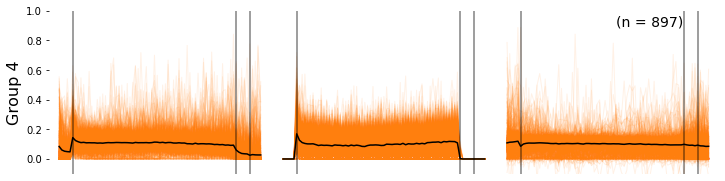

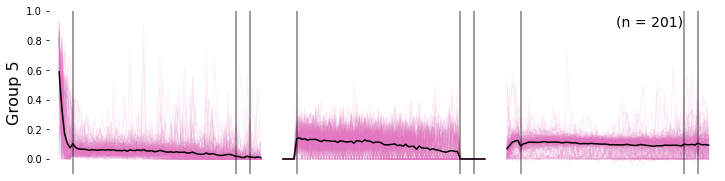

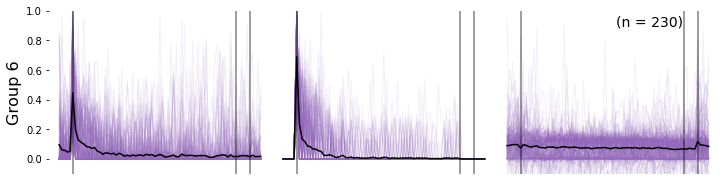

In [31]:
%matplotlib inline
df_1 = df[df['cluster']==0]
df_2 = df[df['cluster']==1]
df_3 = df[df['cluster']==2]
df_4 = df[df['cluster']==3]
df_5 = df[df['cluster']==4]
df_6 = df[df['cluster']==5]
df_7 = df[df['cluster']==6]
df_8 = df[df['cluster']==7]
df_9 = df[df['cluster']==8]
df_10 = df[df['cluster']==9]
df_11 = df[df['cluster']==10]
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7]
for m, data in enumerate(df_list):
    
    lick = data.loc[:,list(range(75))].reset_index(drop = True)
    
    reward = data.loc[:,list(range(75,150))].reset_index(drop = True)
    reward.columns = range(75)
    
    run = data.loc[:,list(range(150,225))].reset_index(drop = True)
    run.columns = range(75)
    
    fig,ax=plt.subplots(1,3,figsize=(12,3), sharey = True)
    ax[0].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[1].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    ax[2].tick_params(axis='x',which='both', bottom=False,top=False, labelbottom=False)
    ax[2].tick_params(axis='y',which='both', left=False,right=False, labelbottom=False)
    if m ==8:
        ax[0].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[2].tick_params(axis = 'x', which = 'both', bottom = True, labelbottom=True)
        ax[1].set_xlabel('Time (Minutes)', fontsize =16)
    plt.subplots_adjust(wspace = 0.01)
    for n in range(len(lick)):
        ax[0].plot(lick.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
        ax[1].plot(reward.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
        ax[2].plot(run.iloc[n], c = data['colors2'].iloc[0], lw = 1, alpha = 0.1)
    ax[0].axvline(5, color = 'black', alpha = 0.5)
    ax[0].axvline(65, color = 'black', alpha = 0.5)
    ax[0].axvline(70, color = 'black', alpha = 0.5)
    ax[1].axvline(5, color = 'black', alpha = 0.5)
    ax[1].axvline(65, color = 'black', alpha = 0.5)
    ax[1].axvline(70, color = 'black', alpha = 0.5)
    ax[2].axvline(5, color = 'black', alpha = 0.5)
    ax[2].axvline(65, color = 'black', alpha = 0.5)
    ax[2].axvline(70, color = 'black', alpha = 0.5)
        
    ax[0].plot(lick.mean(), c = 'black', label = 'Average')
    #ax[0].plot(np.std(lick), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[0].set_title('Lick Rate')
    ax[0].set_ylabel('Group '+str(data.cluster.unique()[0]), fontsize = 16)
    #ax[0].legend()
    
    ax[1].plot(reward.mean(), c = 'black', label = 'Average')
    #ax[1].plot(np.std(reward), c = 'blue', label = 'Stdv', lw = 0.75)
    #ax[1].set_title('Run Rate')
    
    ax[2].plot(run.mean(), c = 'black', label = 'Average')
    #ax[2].set_title('Reward Rate')
    #ax[2].plot(np.std(run), c = 'blue', label = 'Stdv', lw = 0.75)
    #plt.suptitle('Group '+str(data.cluster.unique())+': n = '+str(len(lick)), y = 1.05, fontsize= 16)
    ax[0].set_ylim(-0.1, 1.0)
    ax[1].set_ylim(-0.1, 1.0)
    ax[2].set_ylim(-0.1,1.0)
    
    
    
    #fig.patch.set_visible(False)
    #ax[0].axis('off')
    sns.despine(left=True, bottom=True, right=True)
    ax[2].text(40, 0.9, '(n = '+str(len(lick))+")", fontsize=14)
    if m == 0:
        plt.suptitle('All Timeseries and Average per Cluster', y = 1.08, fontsize = 20)
        ax[0].set_title('Lick Rate', fontsize = 16)
        ax[1].set_title('Reward Rate', fontsize = 16)
        ax[2].set_title('Run Rate', fontsize = 16)
    #print(data['profile'].iloc[0])
    plt.show()

In [ ]:
groups = ['Post-Flashing Runner', 

In [ ]:
clu = []
for n in df['cluster']:
    clu.append(groups[n])
df['profile'] = clu

In [25]:
list(df.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [30]:
metrics = ['d_prime_peak', 'day_of_week','discrim_p', 'earned_water','fraction_time_aborted', 'fraction_time_auto_rewarded',
       'fraction_time_correct_reject', 'fraction_time_false_alarm',
       'fraction_time_hit', 'fraction_time_miss', 'hit_rate', 'hit_rate_peak',
       'lick_latency_median','num_contingent_trials',
       'number_of_correct_reject_trials', 'number_of_false_alarm_trials',
       'number_of_hit_trials', 'number_of_licks', 'number_of_miss_trials']

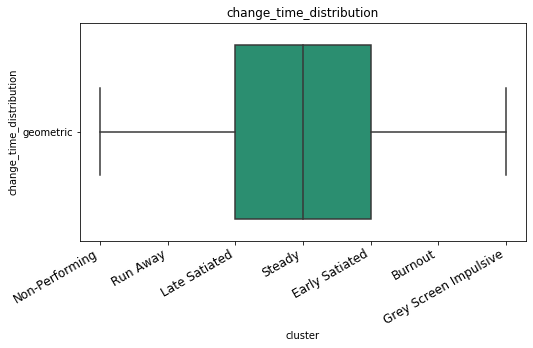

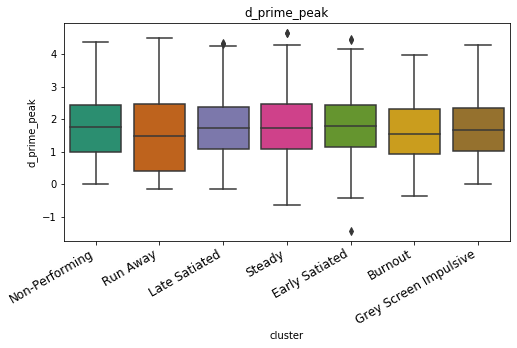

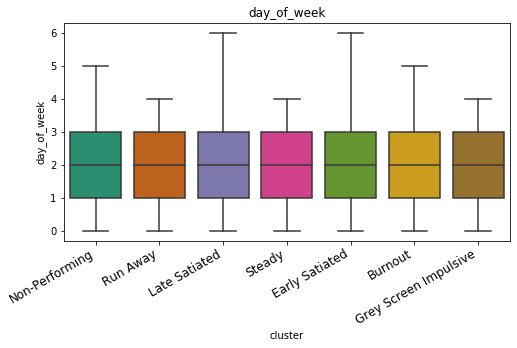

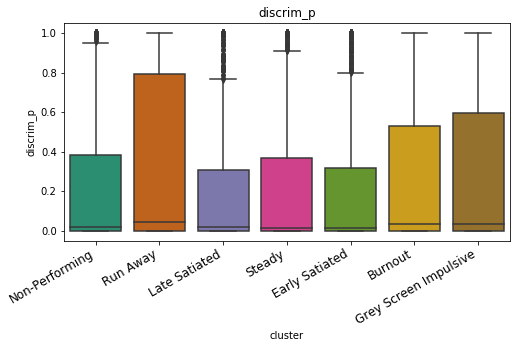

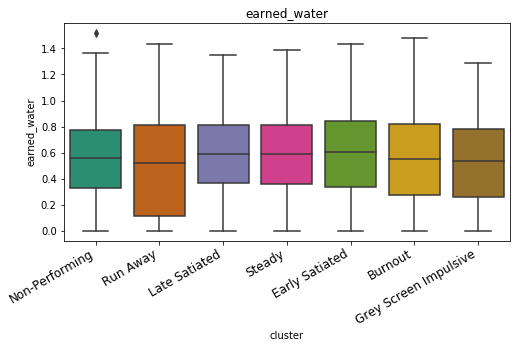

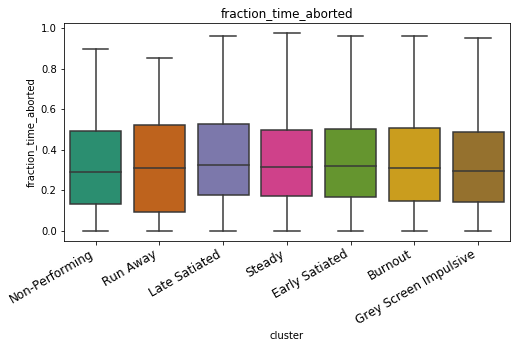

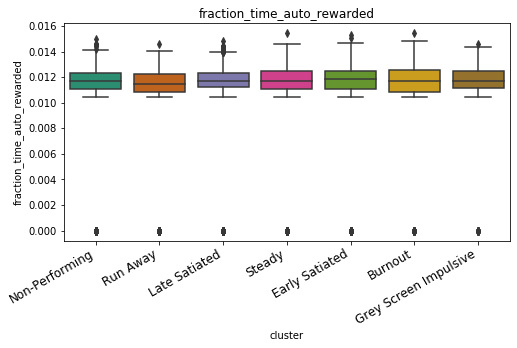

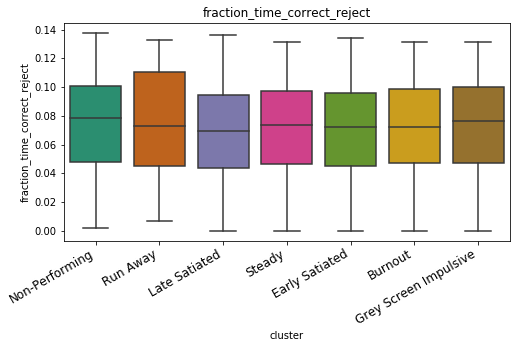

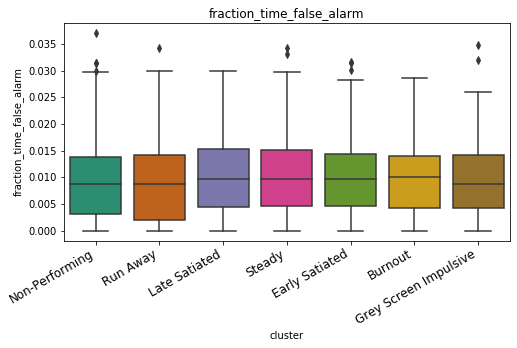

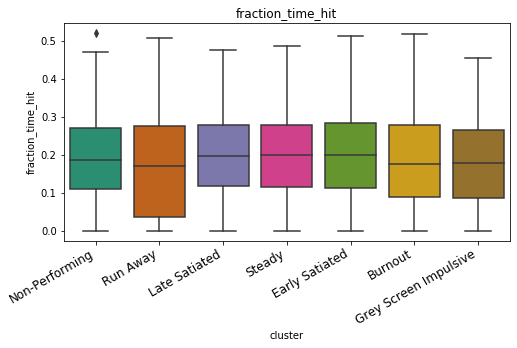

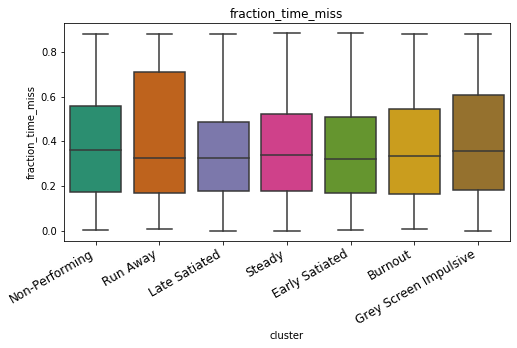

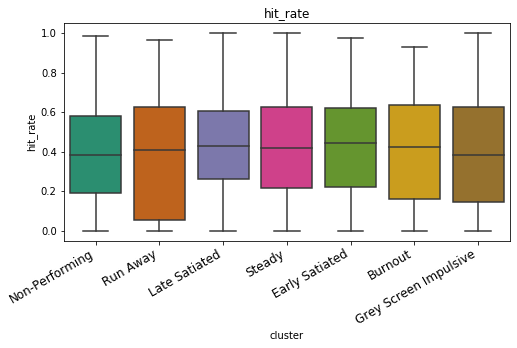

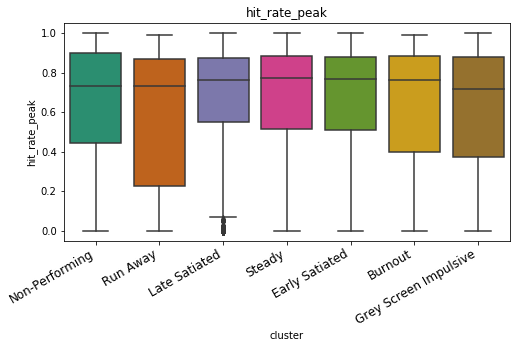

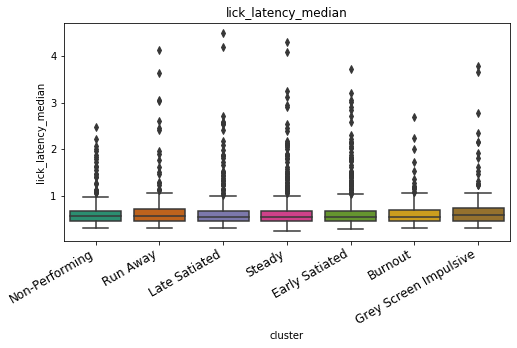

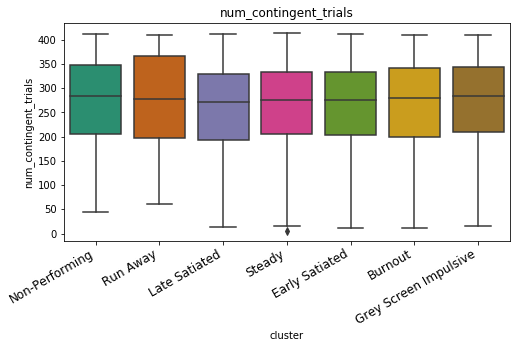

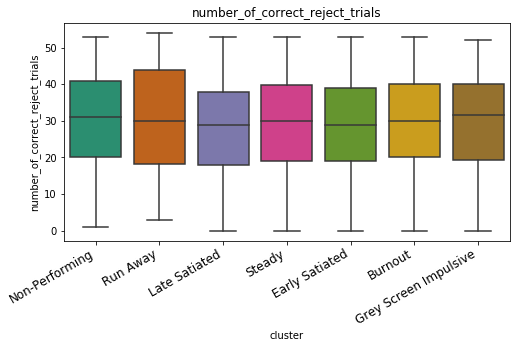

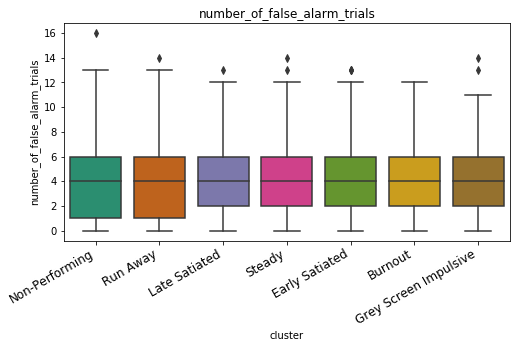

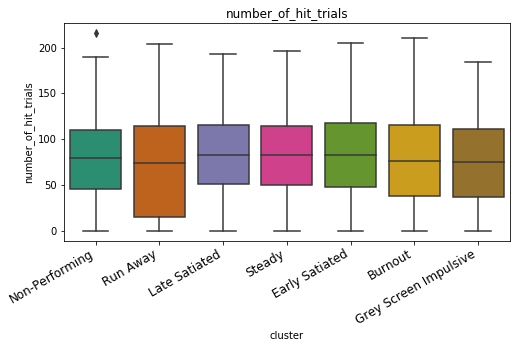

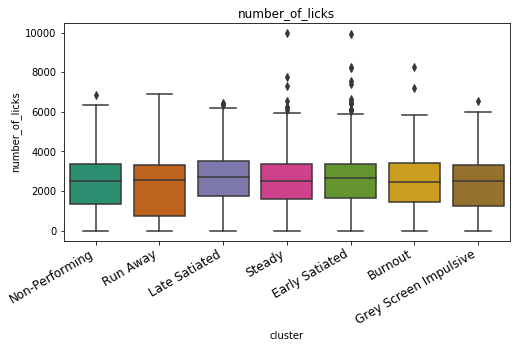

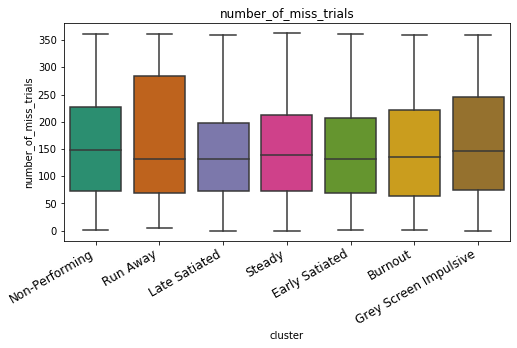

In [29]:
colors = list(plt.get_cmap('Dark2').colors)
for metric in metrics:
    try:
        plt.figure(figsize = (8,4))
        sns.boxplot(df['cluster'], df[metric], palette=colors[:7])
        plt.title(str(metric))
        plt.xticks(ticks = list(range(7)), labels= df.profile.unique(), rotation = 30, ha = 'right', fontsize = 12)
        #plt.title("Average Session Peak d' per Cluster", fontsize = 16)
        #plt.ylabel("Peak d'", fontsize = 12)
        #plt.xlabel('')
        plt.show()
    except:
        pass